In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#전처리 후 R코드 이용
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/clus_pororo_final.csv", encoding = "utf-8-sig")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

user                  date  total_score  ...        n2    n3    n4
0                 카호3  2021.12.26 ∙ 오늘의집 구매          5.0  ...  3.400000  3.40  3.40
1              GuYung  2021.12.23 ∙ 오늘의집 구매          5.0  ...  3.400000  3.40  3.40
2             코코짱2222  2021.12.22 ∙ 오늘의집 구매          5.0  ...  3.285000  3.40  4.45
3            Sionyeah  2021.12.13 ∙ 오늘의집 구매          5.0  ...  3.120000  3.40  3.40
4                 건동2  2021.12.09 ∙ 오늘의집 구매          5.0  ...  2.720000  3.40  3.89
...               ...                   ...          ...  ...       ...   ...   ...
1237887  해피바이러스~승은♥지은  2021.01.18 ∙ 오늘의집 구매          3.8  ...  3.400000  3.40  3.40
1237888        jjwfox  2020.10.26 ∙ 오늘의집 구매          3.0  ...  3.400000  3.40  3.40
1237889          하늘선.  2020.10.09 ∙ 오늘의집 구매          5.0  ...  3.400000  3.40  3.40
1237890   송정희(힐링참치)80  2020.07.15 ∙ 오늘의집 구매          4.8  ...  3.813333  3.25  3.40
1237891           쏘오진  2019.09.18 ∙ 오늘의집 구매          4.0  ...  3.400000  3.98  3.40

[1237892 rows x 23 columns]

In [ ]:
print(df["item_category1"].nunique())
print(df["item_brand"].nunique())

6
552


In [ ]:
#np.mean은 결측값 있을 경우 해당 값들 제외하고 평균 냄! np.mean([1, NaN, 5]) = (1+5)/2 = 3
#, "t4" : np.mean, "t5" : np.mean, "t6" : np.mean
from scipy.stats import mode
cl = df.groupby(["item_name", "item_brand","item_count"]).agg({"total_score" : np.mean, "dur_score" : np.mean, "price_score" : np.mean, "design_score" : np.mean, "delivery_score" : np.mean, "item_sale_price" : np.max, "n1" : np.mean, "n2" : np.mean, "n3" : np.mean, "n4" : np.mean}).reset_index()

In [ ]:
nn = cl.query("total_score == 5")["item_name"]
for n in nn:
    print(n)
    tt = df.query("item_name == @n")["total_score"]
    print(tt)
    print(np.mean(tt))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
424849    5.0
424850    5.0
424851    5.0
424852    5.0
Name: total_score, dtype: float64
5.0
컴퓨터 좌식책상 일반형
417908    5.0
417909    5.0
417910    5.0
417911    5.0
417912    5.0
         ... 
417966    5.0
417967    5.0
417968    5.0
417969    5.0
417970    5.0
Name: total_score, Length: 63, dtype: float64
5.0
컴퓨터 커브드 게이밍책상 슈팅프레임 1400size 2colors
435035    5.0
435036    5.0
435037    5.0
435038    5.0
435039    5.0
435040    5.0
435041    5.0
435042    5.0
435043    5.0
435044    5.0
435045    5.0
435046    5.0
435047    5.0
435048    5.0
435049    5.0
435050    5.0
435051    5.0
435052    5.0
Name: total_score, dtype: float64
5.0
컴퓨터책상 1000
419962    5.0
419963    5.0
419964    5.0
419965    5.0
419966    5.0
         ... 
423954    5.0
423955    5.0
423956    5.0
423957    5.0
423958    5.0
Name: total_score, Length: 102, dtype: float64
5.0
컴퓨터책상 1000
419962    5.0
419963    5.0
419964    5.0
419965    5.0
419966    5.0
         ... 
423954    5.0
4

In [ ]:
idx = cl[cl["item_count"] < 10].index
cl = cl.drop(idx).reset_index(drop = True)

In [ ]:
cl.to_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/for_cluster_final_1.csv", encoding = "utf-8-sig", index = False)

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/for_cluster_final.csv", encoding = "utf-8-sig")
df

item_name  ... cutree(hc, k = 6)
0                              BERGEN 데이베드 침대  ...                 1
1                          CHAMBER 벙커침대 3size  ...                 1
2                            ISABELLA 데이베드 침대  ...                 1
3                             MAKONIS 침대 SS/Q  ...                 1
4         MARINO 분리형 이층침대 트윈싱글 3colors 100200  ...                 1
...                                       ...  ...               ...
4355                                히알린 좌식테이블  ...                 4
4356                           히토 대리석 사이드 테이블  ...                 4
4357                                 히포 원목 체어  ...                 3
4358  힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)  ...                 1
4359                     힙스터 수납형 드럼스툴 8colors  ...                 3

[4360 rows x 15 columns]

In [ ]:
df.to_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/for_cluster_final.csv", encoding = "utf-8-sig", index = False)

In [ ]:
#np.mean 결측값 있을 경우 예시
print(np.mean(df.query("item_name == '데이앤나잇 1인 좌식쇼파 2colors'")["dur_score"]))
print(np.mean(df.query("item_name == '데이앤나잇 1인 좌식쇼파 2colors'")["dur_score"].dropna()))
print(np.mean(df.query("item_name == '데이앤나잇 1인 좌식쇼파 2colors'")["dur_score"].fillna(0)))

4.467046810767803
4.467046810767803
4.439377965208224


# R에서 클러스터링 후

In [ ]:
import pandas as pd
import numpy as np
cl = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/cluster_/final_cluster.csv", encoding = "utf-8-sig")
df = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/preprocess_total.csv", encoding = "utf-8-sig")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


user  ...                                            review2
0            mavie  ...  예.. 싼데는 이유있어요 그렇게 싼건지도 잘은 모르겠지만ㅎㅎ 가성비 별로입니다 내구...
1             이중석3  ...  내구성이랑 디자인 구웃ㅜ인데 접이식인거 까먹고 의자 밟고 올라갔다가 발목 절단 당할...
2             해양93  ...           의자 뒤로 바싹 앉으면 궁댕이 쏙 빠져요 앉을 때 조심해야 할 것 같아요
3        @you_uhee  ...  집이 우드타입 가구가 많아서 아예 클리어한 것보다는 색있는게 확실히 좋아요 냥님이 ...
4            정의찬23  ...                        무게감도 있고 튼튼합니다. 그리고 일단 예뻐오..
...            ...  ...                                                ...
1237899   Sora_kim  ...            나무 실물 색감 예쁘고 튼튼해보여요 냄새도 안나고 바로 사용 가능해요~
1237900   파트너 공식리뷰  ...        튼튼해서 안정적이에요. 부부침대로 2개를 나란히 뒀더니 호텔에 온 것 같아요.
1237901   파트너 공식리뷰  ...               튼튼하고 색상도 마음에 듭니다 안방과 어울려요 아주 마음에 들어요
1237902   파트너 공식리뷰  ...  헤드가 새로운 디자인으로 깔끔해요. 초등학상 딸아이가 쓸거라 원목으로 샀는데 냄새 ...
1237903   파트너 공식리뷰  ...  딱 원하던 색상이고 엄청이쁘네요 견고하고 흠잡을곳없는 제품입니다. 식탁이 너무 마음...

[1237904 rows x 20 columns]

In [ ]:
cl

item_name item_category1  ... c9  c10
0                              BERGEN 데이베드 침대             침대  ...  1    1
1                          CHAMBER 벙커침대 3size             침대  ...  2    2
2                            ISABELLA 데이베드 침대             침대  ...  1    1
3                             MAKONIS 침대 SS/Q             침대  ...  2    2
4         MARINO 분리형 이층침대 트윈싱글 3colors 100200             침대  ...  2    2
...                                       ...            ...  ... ..  ...
4355                                히알린 좌식테이블         테이블/책상  ...  7    7
4356                           히토 대리석 사이드 테이블         테이블/책상  ...  6    6
4357                                 히포 원목 체어             의자  ...  4    4
4358  힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)             침대  ...  1    1
4359                     힙스터 수납형 드럼스툴 8colors             의자  ...  4    4

[4360 rows x 21 columns]

In [ ]:
new = pd.merge(cl, df.loc[:, ["item_name", "item_category1", "item_brand", "item_count", "item_link"]], how = "inner").drop_duplicates().reset_index(drop = True)
new.isnull().sum()


item_name          0
item_category1     0
item_brand         0
item_count         0
total_score        0
dur_score          2
price_score        2
design_score       2
delivery_score     2
item_sale_price    0
n1                 0
n2                 0
n3                 0
n4                 0
c4                 0
c5                 0
c6                 0
c7                 0
c8                 0
c9                 0
c10                0
item_link          0
dtype: int64

In [ ]:
for i in new["c6"].unique():
    nn = new.query("c6 == @i").reset_index(drop = True)
    print(i)
    for k in nn["item_category1"].unique():
        print(k)
        n = nn.query("item_category1 == @k")["item_link"]
        for j in n:
            print(j)
#1 #맥시멀리스트 #본가의향기 #엄마의향기 #6시내고향템
#2 #동거템(?) #셰어하우스템 #가평펜션템
#3 #홈카페 #인스타갬성템 #빈티지
#4 #기본에충실한 #깔끔 #심플 #모던
#5 #가성비템 #학생템 #공부방템
#6 #가격대비만족 #오래쓰자 #한번사서제대로

1
침대
https://ohou.se/productions/46822/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/88554/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/930881/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/46352/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/137015/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/137619/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/153681/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/236750/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/320701/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/341633/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/322369/selling?affect_type=ProductCategoryIndex&affect_id=
https://ohou.se/productions/322370/sellin

In [ ]:
import pandas as pd
import numpy as np
cl = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/for_cluster_final.csv", encoding = "utf-8-sig")
c4 = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/cluster_/c4.csv", index_col = 0).reset_index(drop = True)
c5 = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/cluster_/c5.csv", index_col = 0).reset_index(drop = True)
c6 = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/cluster_/c6.csv", index_col = 0).reset_index(drop = True)
c7 = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/cluster_/c7.csv", index_col = 0).reset_index(drop = True)
c8 = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/cluster_/c8.csv", index_col = 0).reset_index(drop = True)
c9 = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/cluster_/c9.csv", index_col = 0).reset_index(drop = True)
c10 = pd.read_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/cluster_/c10.csv", index_col = 0).reset_index(drop = True)
c4.columns = ["c4"]
c5.columns = ["c5"]
c6.columns = ["c6"]
c7.columns = ["c7"]
c8.columns = ["c8"]
c9.columns = ["c9"]
c10.columns = ["c10"]
cl = pd.concat([cl, c4, c5, c6, c7, c8, c9, c10], axis = 1)
#cl.drop(["cutree(hc, k = 6)"], axis = 1, inplace = True)
cl

item_name item_category1  ... c9  c10
0                              BERGEN 데이베드 침대             침대  ...  1    1
1                          CHAMBER 벙커침대 3size             침대  ...  2    2
2                            ISABELLA 데이베드 침대             침대  ...  1    1
3                             MAKONIS 침대 SS/Q             침대  ...  2    2
4         MARINO 분리형 이층침대 트윈싱글 3colors 100200             침대  ...  2    2
...                                       ...            ...  ... ..  ...
4355                                히알린 좌식테이블         테이블/책상  ...  7    7
4356                           히토 대리석 사이드 테이블         테이블/책상  ...  6    6
4357                                 히포 원목 체어             의자  ...  4    4
4358  힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)             침대  ...  1    1
4359                     힙스터 수납형 드럼스툴 8colors             의자  ...  4    4

[4360 rows x 21 columns]

In [ ]:
cl.to_csv("/content/drive/Shareddrives/컨퍼런스/성예슬/final_cluster.csv", encoding = "utf-8-sig", index = False)

## 4 Clusters

In [ ]:
for c in cl["c4"].unique():
    print(c, "th cluster")
    df = cl.query("c4 == @c").reset_index(drop = True)
    display(df)
    print(df["item_category1"].value_counts())
    print(df["item_brand"].value_counts())
    print("")

1 th cluster


item_name item_category1  ... c9  c10
0                             BERGEN 데이베드 침대             침대  ...  1    1
1                         CHAMBER 벙커침대 3size             침대  ...  2    2
2                           ISABELLA 데이베드 침대             침대  ...  1    1
3                            MAKONIS 침대 SS/Q             침대  ...  2    2
4        MARINO 분리형 이층침대 트윈싱글 3colors 100200             침대  ...  2    2
..                                       ...            ...  ... ..  ...
661                       헤이미쉬 리빙다이닝 1인 원목벤치             의자  ...  1    1
662                  헤이츠 모던 1200 렌지대 2colors         서랍/수납장  ...  1    1
663                           헤일리 라탄가구 케인수납장         서랍/수납장  ...  1    1
664                            헬리아 LED조명 화장대         화장대/콘솔  ...  1    1
665  힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)             침대  ...  1    1

[666 rows x 21 columns]

침대        256
서랍/수납장    202
의자         89
화장대/콘솔     74
소파         45
Name: item_category1, dtype: int64
잉글랜더     33
마켓비      32
레이디가구    26
삼익가구     24
리샘       24
         ..
파란들가구     1
듀오백       1
뉴엔에스      1
디자인룸즈     1
번드        1
Name: item_brand, Length: 183, dtype: int64

2 th cluster


item_name item_category1  ... c9  c10
0                   MILKAM 콘솔수납장 17585 CHM85175         서랍/수납장  ...  3    3
1                   6인 콘센트형 다이닝테이블 의자세트 2colors         테이블/책상  ...  3    3
2              ADEL 철제침대 매트리스 프레임 2colors(SS/Q)             침대  ...  9   10
3                Acne 침대 매트리스 프레임 3colors(SS/Q)             침대  ...  9   10
4                           Asusa 원목 콘솔화장대 거울포함         화장대/콘솔  ...  9   10
..                                          ...            ...  ... ..  ...
346                     헤이즐 무헤드 평상형 퀸 침대 프레임(Q)             침대  ...  9   10
347        헤이즐 침대(Q,K,KK 공용)(매트리스 미포함)(조명형,평상형)             침대  ...  3    3
348  헨트데이베드 고무나무 3인 패브릭 소파베드/원목소파 2type 6colors             소파  ...  3    3
349           확장형 세라믹 인출식 식탁 1600~2300 (2color)         테이블/책상  ...  3    3
350         히노 편백 원목 LED헤드 멀티수납형 침대 SS/Q (매트제외)             침대  ...  9   10

[351 rows x 21 columns]

침대        234
테이블/책상     59
서랍/수납장     24
화장대/콘솔     21
소파          8
의자          5
Name: item_category1, dtype: int64
한샘        22
리바트       21
삼익가구      21
에몬스       10
일룸        10
          ..
엘라비아       1
버즈가구       1
가구앤하우스     1
리센트        1
세진침대       1
Name: item_brand, Length: 124, dtype: int64

3 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0                        RELLY 침대 시리즈             침대        마켓비  ...   4   4    4
1                (1+1) 내츄럴모노 윈저 의자 세트             의자         포홈  ...   4   4    4
2       (국내생산) 학생/사무용 책상 의자 S10 (기본형)             의자         싯존  ...   5   5    5
3       (국내생산) 학생/사무용 책상 의자 S10 (헤드형)             의자         싯존  ...   4   4    4
4     (국내생산) 학생/사무용 책상 의자 STC10 (기본형)             의자         싯존  ...   5   5    5
...                               ...            ...        ...  ...  ..  ..  ...
1888                     휘게체어 5colors             의자        룸앤홈  ...   5   5    5
1889   휴 LED 3서랍수납형 침대(매트 미포함) SS/Q/K             침대       가구데코  ...   8   8    8
1890         휴 조이 좌식 리클라이너 의자 2colors             의자         한샘  ...   4   4    4
1891                         히포 원목 체어             의자     레트로하우스  ...   4   4    4
1892             힙스터 수납형 드럼스툴 8colors             의자      씨에스리빙  ...   4   4    4

[1893 rows x 21 columns]

의자        701
침대        468
서랍/수납장    442
화장대/콘솔    156
소파        119
테이블/책상      7
Name: item_category1, dtype: int64
마켓비      89
블루밍홈     56
한샘       36
삼익가구     35
이케아      32
         ..
퍼치스       1
코끼리리빙     1
더젠        1
까르엠가구     1
이데컴퍼니     1
Name: item_brand, Length: 380, dtype: int64

4 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0                (당일발송) 가로 높이조절 사이드테이블         테이블/책상         키모  ...   6   6    6
1                    (당일발송) 다용도 좌식 테이블         테이블/책상         키모  ...   6   6    6
2     (당일발송) 다용도 카페 식탁 테이블 800 2colors         테이블/책상         키모  ...   6   6    6
3                 (당일발송) 스틸 좌식 데스크 확장형         테이블/책상         키모  ...   7   7    7
4               (당일발송) 스틸 책상 겸 테이블 800         테이블/책상         키모  ...   6   6    6
...                                ...            ...        ...  ...  ..  ..  ...
1445      화이트식탁 1000 원목 원형 테이블 GLS166C         테이블/책상        나무뜰  ...   7   7    7
1446       화이트식탁 800 원목 원형 테이블 GLS165C         테이블/책상        나무뜰  ...   6   6    6
1447                  확장형 티테이블 2colors         테이블/책상       소프시스  ...   7   7    7
1448                         히알린 좌식테이블         테이블/책상         앳홈  ...   7   7    7
1449                    히토 대리석 사이드 테이블         테이블/책상      플레르가구  ...   6   6    6

[1450 rows x 21 columns]

테이블/책상    1362
의자          35
침대          31
서랍/수납장       9
화장대/콘솔       9
소파           4
Name: item_category1, dtype: int64
오홀리브     53
블루밍홈     39
소프시스     33
베스트리빙    29
마켓비      29
         ..
쉐우드가구     1
플랜제이      1
포메리트      1
윌리        1
우드라인      1
Name: item_brand, Length: 325, dtype: int64



item_count


<Figure size 864x864 with 0 Axes>

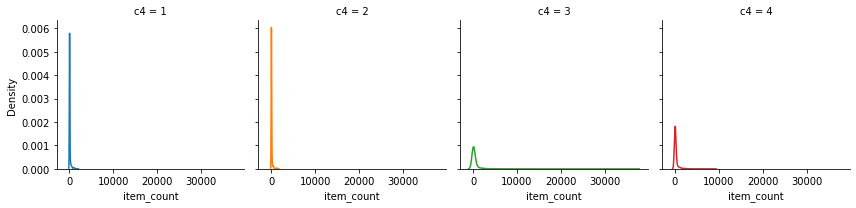

total_score


<Figure size 864x864 with 0 Axes>

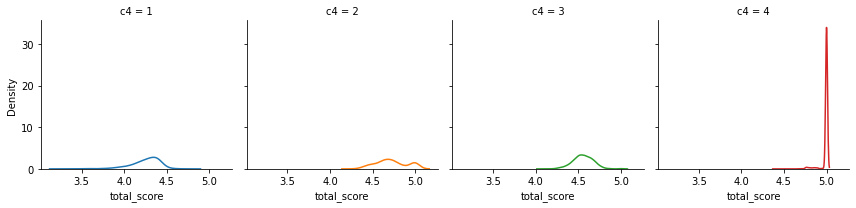

dur_score


<Figure size 864x864 with 0 Axes>

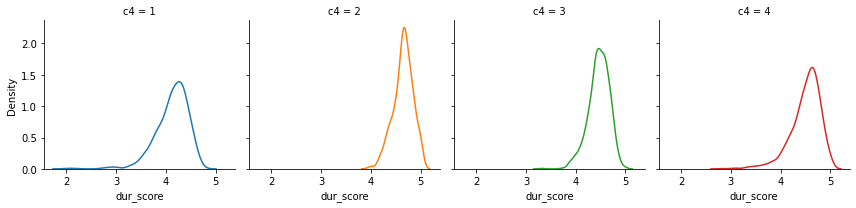

price_score


<Figure size 864x864 with 0 Axes>

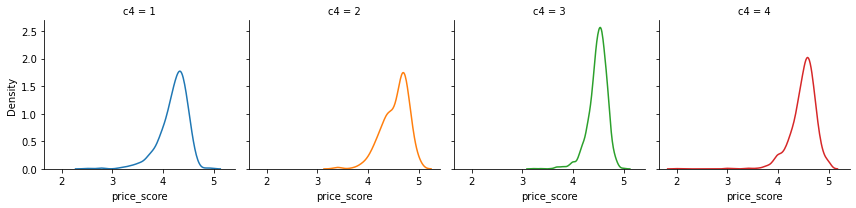

design_score


<Figure size 864x864 with 0 Axes>

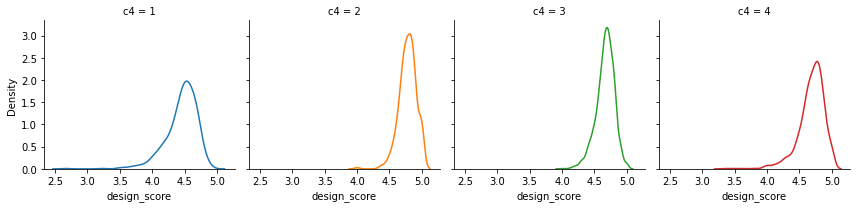

delivery_score


<Figure size 864x864 with 0 Axes>

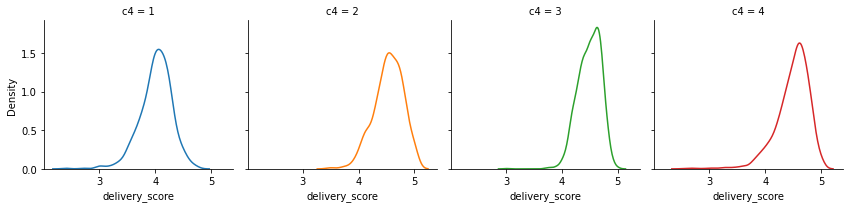

item_sale_price


<Figure size 864x864 with 0 Axes>

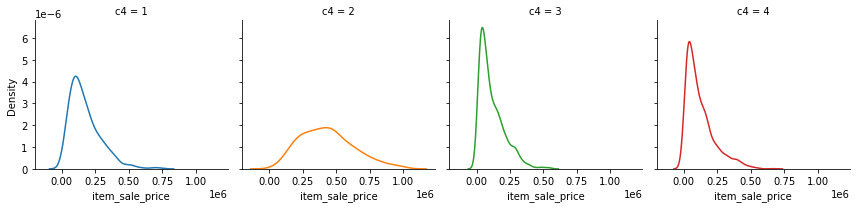

n1


<Figure size 864x864 with 0 Axes>

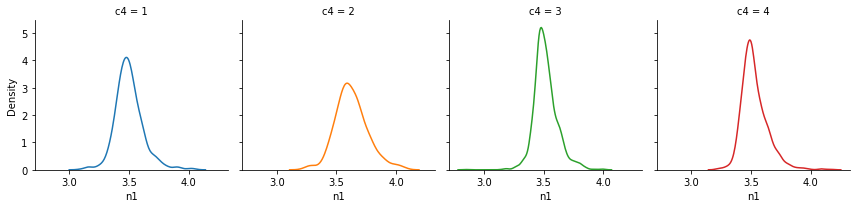

n2


<Figure size 864x864 with 0 Axes>

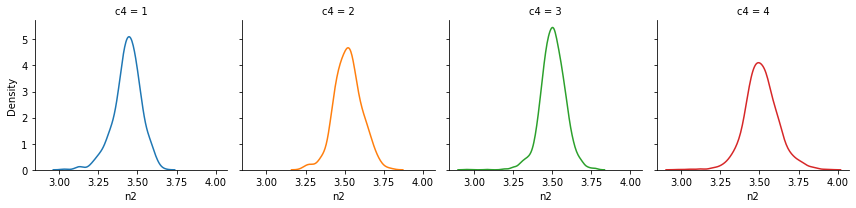

n3


<Figure size 864x864 with 0 Axes>

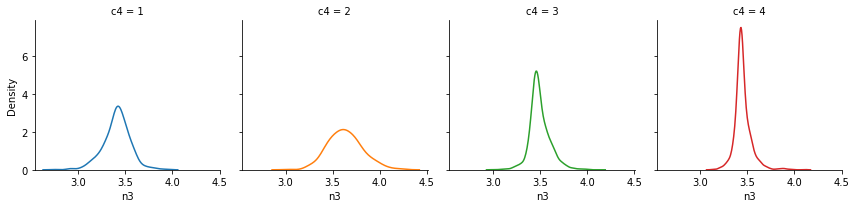

n4


<Figure size 864x864 with 0 Axes>

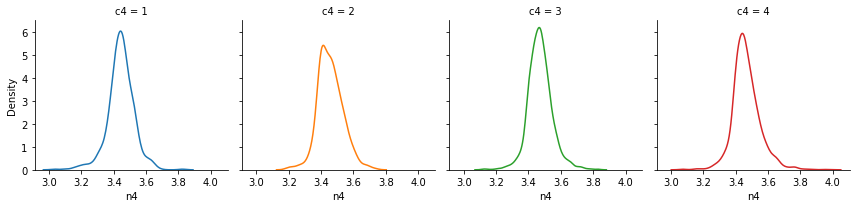

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for col in cl.columns[3:14]:
    plt.figure(figsize = (12, 12))
    print(col)
    grid = sns.FacetGrid(data = cl, col = "c4", hue = "c4")
    grid.map(sns.distplot, col, hist = False)
    plt.show()

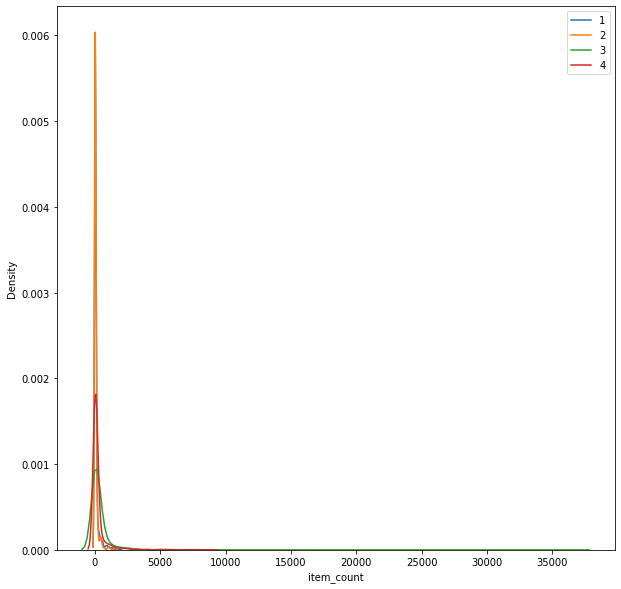

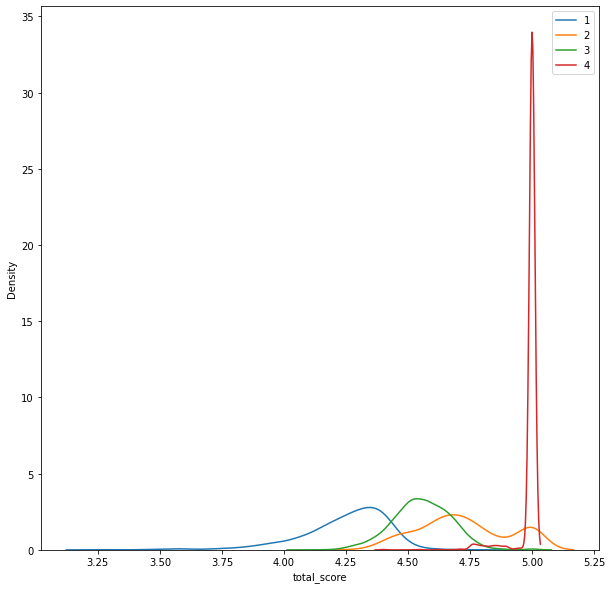

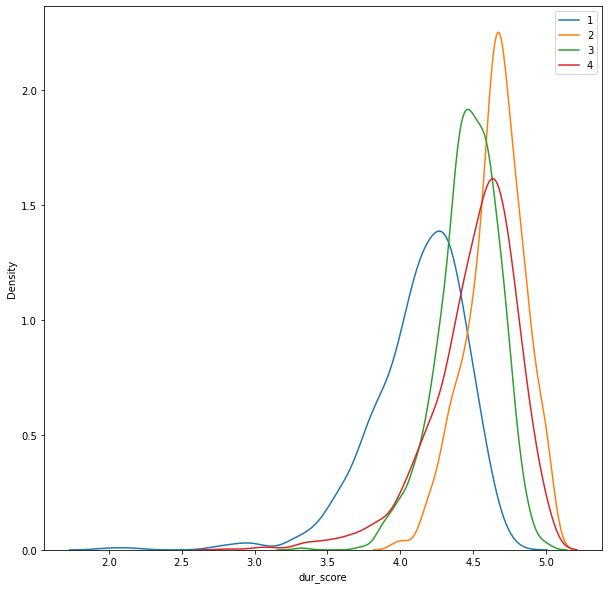

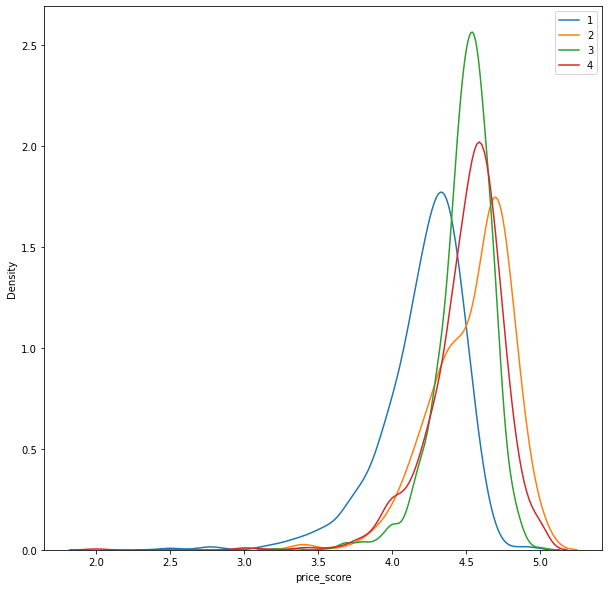

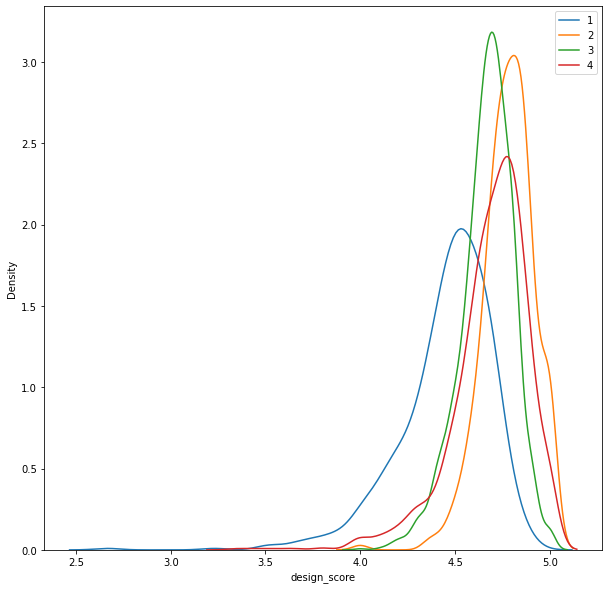

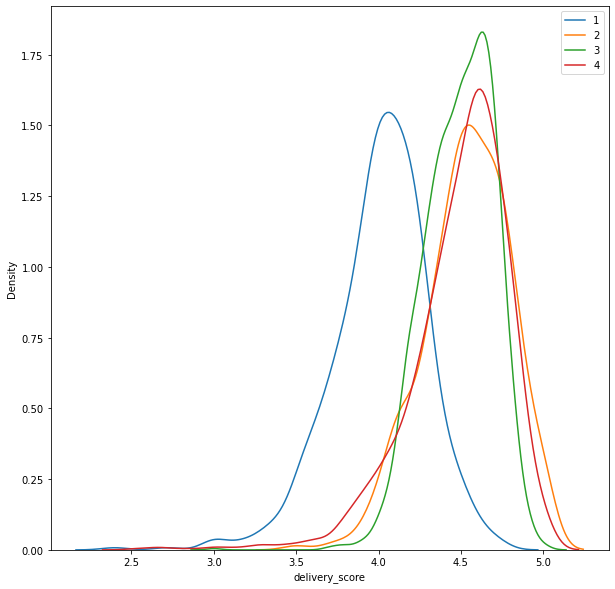

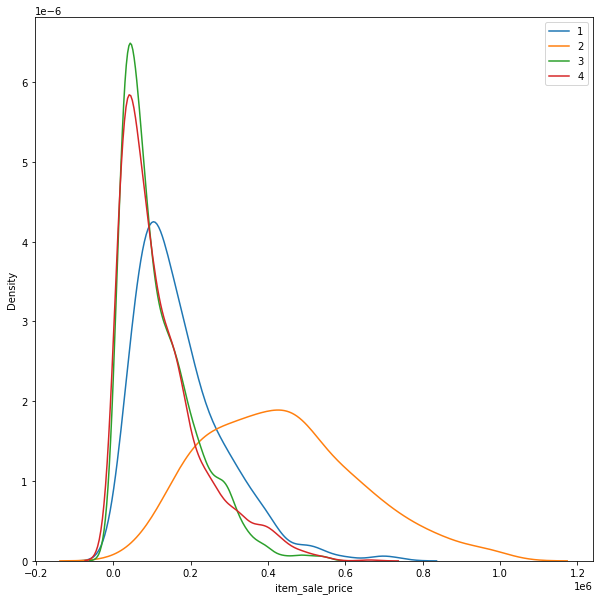

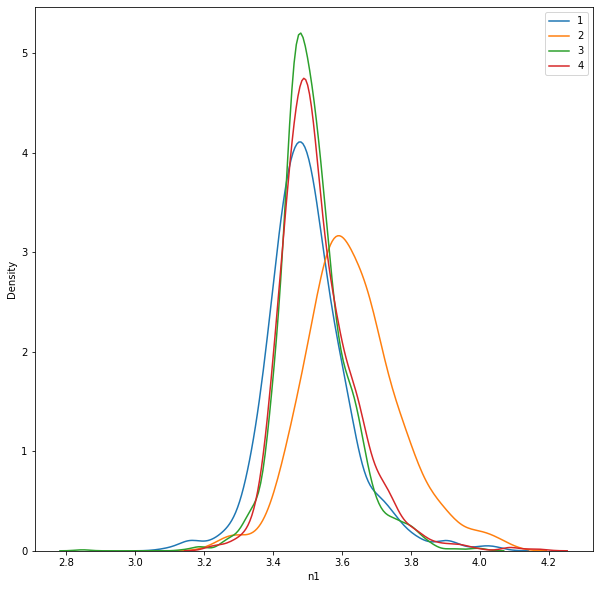

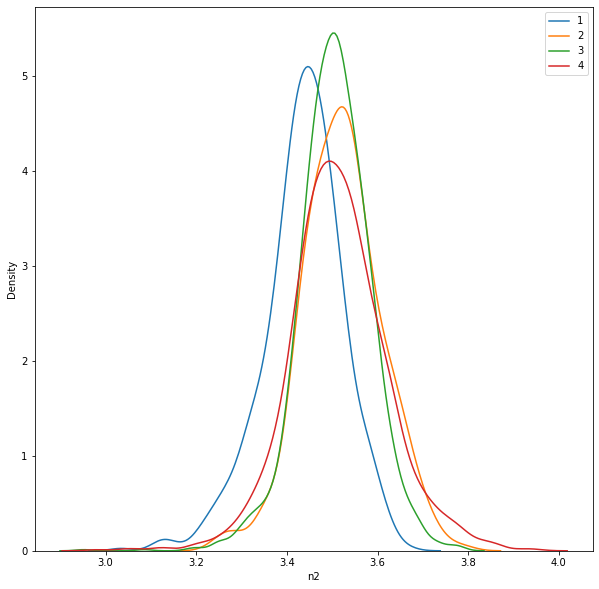

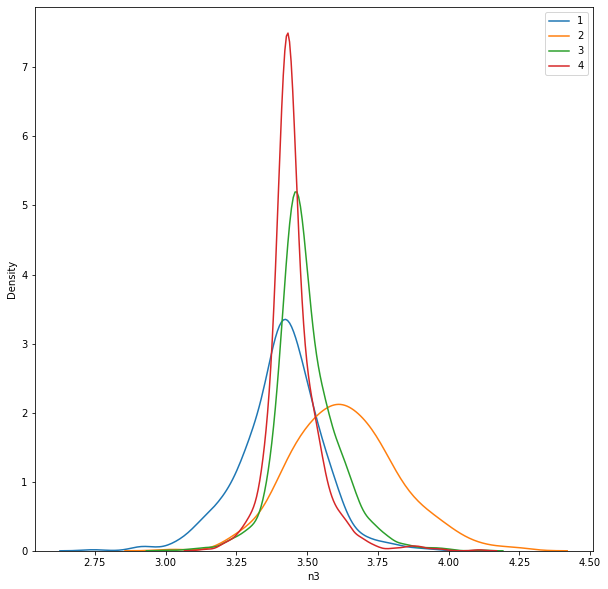

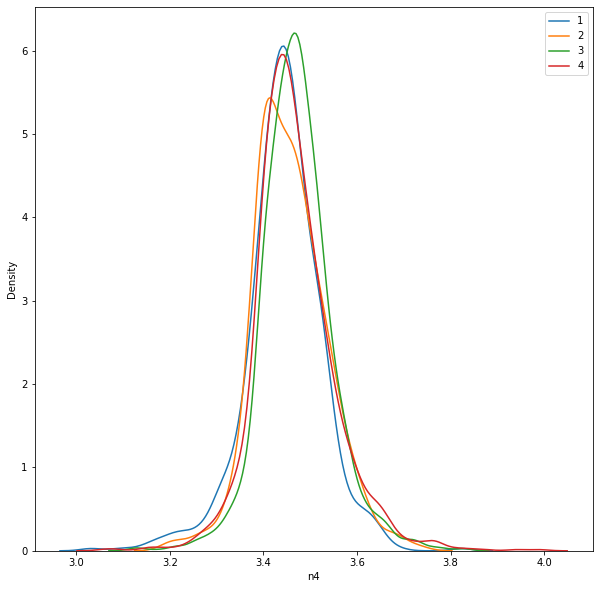

In [ ]:
for col in cl.columns[3:14]:
    plt.figure(figsize = (10, 10))
    for clus in cl["c4"].unique():
        sns.distplot(cl.query("c4 == @clus")[col], hist = False, label = clus)
    plt.legend()
    plt.show()

## 5 Clusters

In [ ]:
for c in cl["c5"].unique():
    print(c, "th cluster")
    df = cl.query("c5 == @c").reset_index(drop = True)
    display(df)
    print(df["item_category1"].value_counts())
    print(df["item_brand"].value_counts())
    print("")

1 th cluster


item_name item_category1  ... c9  c10
0                             BERGEN 데이베드 침대             침대  ...  1    1
1                         CHAMBER 벙커침대 3size             침대  ...  2    2
2                           ISABELLA 데이베드 침대             침대  ...  1    1
3                            MAKONIS 침대 SS/Q             침대  ...  2    2
4        MARINO 분리형 이층침대 트윈싱글 3colors 100200             침대  ...  2    2
..                                       ...            ...  ... ..  ...
661                       헤이미쉬 리빙다이닝 1인 원목벤치             의자  ...  1    1
662                  헤이츠 모던 1200 렌지대 2colors         서랍/수납장  ...  1    1
663                           헤일리 라탄가구 케인수납장         서랍/수납장  ...  1    1
664                            헬리아 LED조명 화장대         화장대/콘솔  ...  1    1
665  힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)             침대  ...  1    1

[666 rows x 21 columns]

침대        256
서랍/수납장    202
의자         89
화장대/콘솔     74
소파         45
Name: item_category1, dtype: int64
잉글랜더     33
마켓비      32
레이디가구    26
삼익가구     24
리샘       24
         ..
파란들가구     1
듀오백       1
뉴엔에스      1
디자인룸즈     1
번드        1
Name: item_brand, Length: 183, dtype: int64

2 th cluster


item_name item_category1  ... c9  c10
0                   MILKAM 콘솔수납장 17585 CHM85175         서랍/수납장  ...  3    3
1                   6인 콘센트형 다이닝테이블 의자세트 2colors         테이블/책상  ...  3    3
2              ADEL 철제침대 매트리스 프레임 2colors(SS/Q)             침대  ...  9   10
3                Acne 침대 매트리스 프레임 3colors(SS/Q)             침대  ...  9   10
4                           Asusa 원목 콘솔화장대 거울포함         화장대/콘솔  ...  9   10
..                                          ...            ...  ... ..  ...
346                     헤이즐 무헤드 평상형 퀸 침대 프레임(Q)             침대  ...  9   10
347        헤이즐 침대(Q,K,KK 공용)(매트리스 미포함)(조명형,평상형)             침대  ...  3    3
348  헨트데이베드 고무나무 3인 패브릭 소파베드/원목소파 2type 6colors             소파  ...  3    3
349           확장형 세라믹 인출식 식탁 1600~2300 (2color)         테이블/책상  ...  3    3
350         히노 편백 원목 LED헤드 멀티수납형 침대 SS/Q (매트제외)             침대  ...  9   10

[351 rows x 21 columns]

침대        234
테이블/책상     59
서랍/수납장     24
화장대/콘솔     21
소파          8
의자          5
Name: item_category1, dtype: int64
한샘        22
리바트       21
삼익가구      21
에몬스       10
일룸        10
          ..
엘라비아       1
버즈가구       1
가구앤하우스     1
리센트        1
세진침대       1
Name: item_brand, Length: 124, dtype: int64

3 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0                        RELLY 침대 시리즈             침대        마켓비  ...   4   4    4
1                (1+1) 내츄럴모노 윈저 의자 세트             의자         포홈  ...   4   4    4
2       (국내생산) 학생/사무용 책상 의자 S10 (기본형)             의자         싯존  ...   5   5    5
3       (국내생산) 학생/사무용 책상 의자 S10 (헤드형)             의자         싯존  ...   4   4    4
4     (국내생산) 학생/사무용 책상 의자 STC10 (기본형)             의자         싯존  ...   5   5    5
...                               ...            ...        ...  ...  ..  ..  ...
1888                     휘게체어 5colors             의자        룸앤홈  ...   5   5    5
1889   휴 LED 3서랍수납형 침대(매트 미포함) SS/Q/K             침대       가구데코  ...   8   8    8
1890         휴 조이 좌식 리클라이너 의자 2colors             의자         한샘  ...   4   4    4
1891                         히포 원목 체어             의자     레트로하우스  ...   4   4    4
1892             힙스터 수납형 드럼스툴 8colors             의자      씨에스리빙  ...   4   4    4

[1893 rows x 21 columns]

의자        701
침대        468
서랍/수납장    442
화장대/콘솔    156
소파        119
테이블/책상      7
Name: item_category1, dtype: int64
마켓비      89
블루밍홈     56
한샘       36
삼익가구     35
이케아      32
         ..
퍼치스       1
코끼리리빙     1
더젠        1
까르엠가구     1
이데컴퍼니     1
Name: item_brand, Length: 380, dtype: int64

4 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0               (당일발송) 가로 높이조절 사이드테이블         테이블/책상         키모  ...   6   6    6
1                   (당일발송) 다용도 좌식 테이블         테이블/책상         키모  ...   6   6    6
2    (당일발송) 다용도 카페 식탁 테이블 800 2colors         테이블/책상         키모  ...   6   6    6
3              (당일발송) 스틸 책상 겸 테이블 800         테이블/책상         키모  ...   6   6    6
4                 (당일발송) 스틸 테이블 2size         테이블/책상         키모  ...   6   6    6
..                                ...            ...        ...  ...  ..  ..  ...
536                   화이트 마틴 H형 좌식 책상         테이블/책상       일루일루  ...   6   6    6
537              화이트 마틴 기본형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
538             화이트 마틴 스퀘어형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
539       화이트식탁 800 원목 원형 테이블 GLS165C         테이블/책상        나무뜰  ...   6   6    6
540                    히토 대리석 사이드 테이블         테이블/책상      플레르가구  ...   6   6    6

[541 rows x 21 columns]

테이블/책상    538
침대          3
Name: item_category1, dtype: int64
블루밍홈       35
앳홈         21
베스트리빙      19
마켓비        17
프리메이드      16
           ..
아이데뉴        1
심포니디자인      1
라이크하우스      1
장인가구        1
아이리스코리아     1
Name: item_brand, Length: 170, dtype: int64

5 th cluster


item_name item_category1  ... c9  c10
0                         (당일발송) 스틸 좌식 데스크 확장형         테이블/책상  ...  7    7
1                       (본사직영) 앤디 거실테이블 6types         테이블/책상  ...  7    9
2                1+1 CH9930 루체 카페 식탁의자 6colors             의자  ...  7    7
3              1+1 더쉼 포켓스프링 리클라이너 좌식의자 2colors             소파  ...  7    7
4           1+1 폴리 쿠션 바체어 홈바의자 3colors (절삭서비스)             의자  ...  7    7
..                                         ...            ...  ... ..  ...
904  화이트 타원 좌식 소파 접이식 화이트 다리 거실 테이블 1200 x 600         테이블/책상  ...  7    7
905         화이트 호마이카 HPL HPM 라미네이트 라운드 2인 원목식탁         테이블/책상  ...  7    7
906               화이트식탁 1000 원목 원형 테이블 GLS166C         테이블/책상  ...  7    7
907                           확장형 티테이블 2colors         테이블/책상  ...  7    7
908                                  히알린 좌식테이블         테이블/책상  ...  7    7

[909 rows x 21 columns]

테이블/책상    824
의자         35
침대         28
화장대/콘솔      9
서랍/수납장      9
소파          4
Name: item_category1, dtype: int64
오홀리브      53
소프시스      21
로포텐       21
보니애가구     19
한샘        18
          ..
상일리베가구     1
잉글랜더       1
일루일루       1
마티노가구      1
참갤러리       1
Name: item_brand, Length: 261, dtype: int64



item_count


<Figure size 864x864 with 0 Axes>

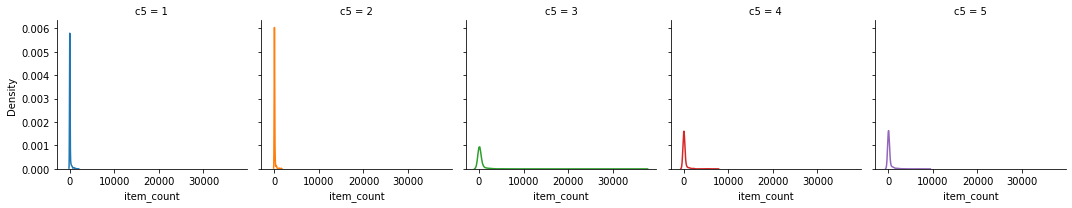

total_score


<Figure size 864x864 with 0 Axes>

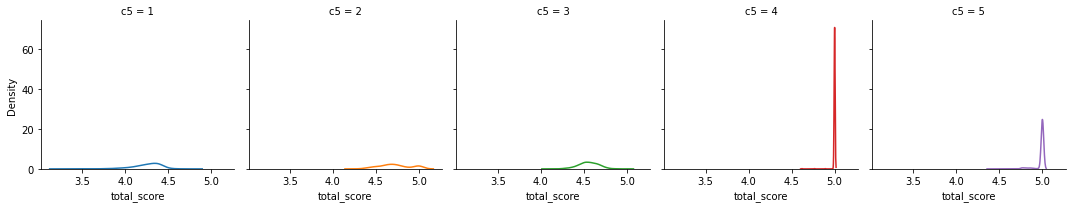

dur_score


<Figure size 864x864 with 0 Axes>

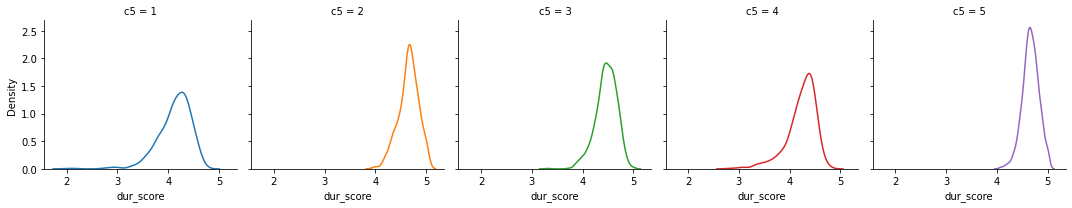

price_score


<Figure size 864x864 with 0 Axes>

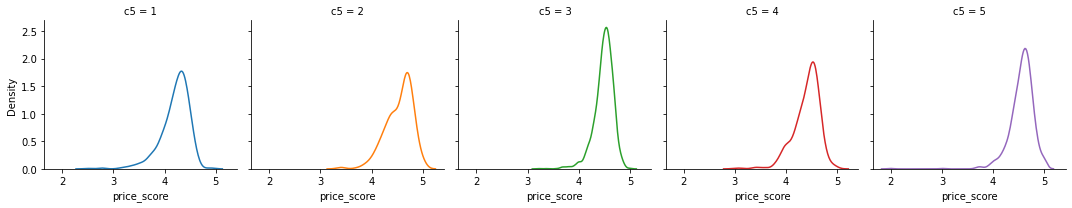

design_score


<Figure size 864x864 with 0 Axes>

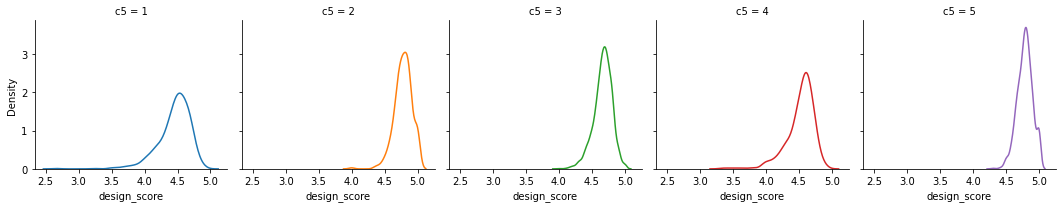

delivery_score


<Figure size 864x864 with 0 Axes>

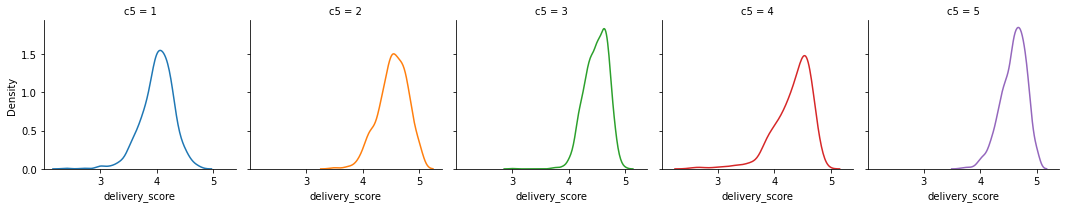

item_sale_price


<Figure size 864x864 with 0 Axes>

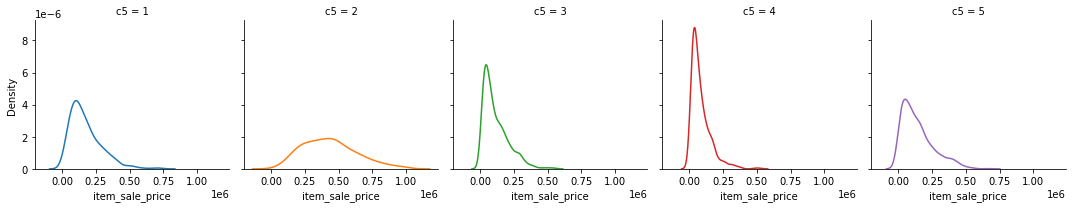

n1


<Figure size 864x864 with 0 Axes>

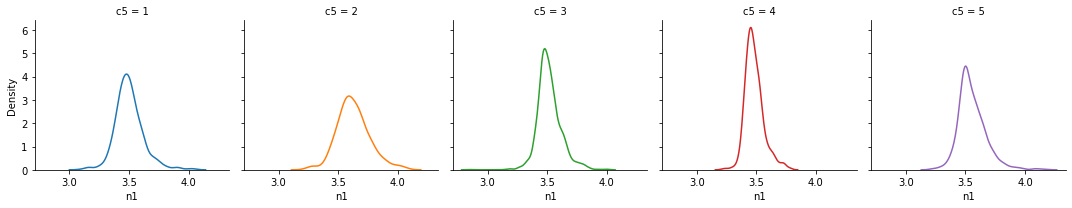

n2


<Figure size 864x864 with 0 Axes>

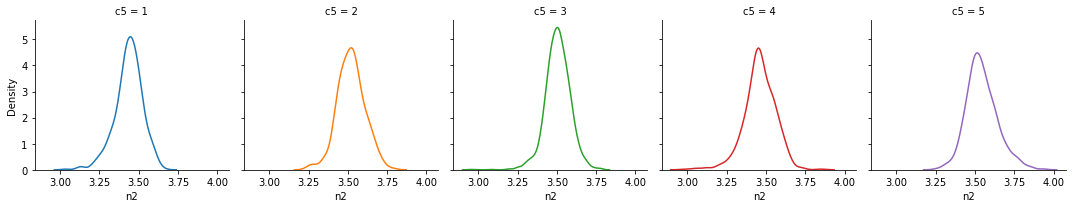

n3


<Figure size 864x864 with 0 Axes>

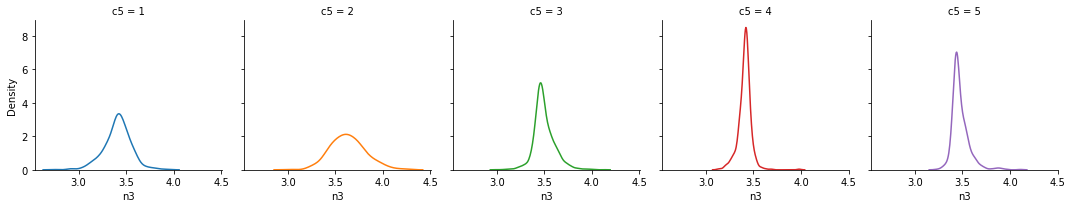

n4


<Figure size 864x864 with 0 Axes>

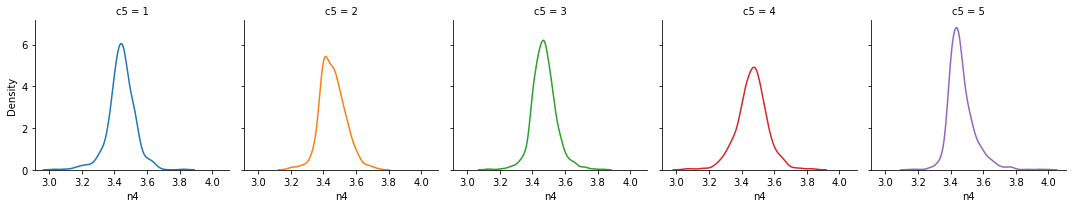

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for col in cl.columns[3:14]:
    plt.figure(figsize = (12, 12))
    print(col)
    grid = sns.FacetGrid(data = cl, col = "c5", hue = "c5")
    grid.map(sns.distplot, col, hist = False)
    plt.show()

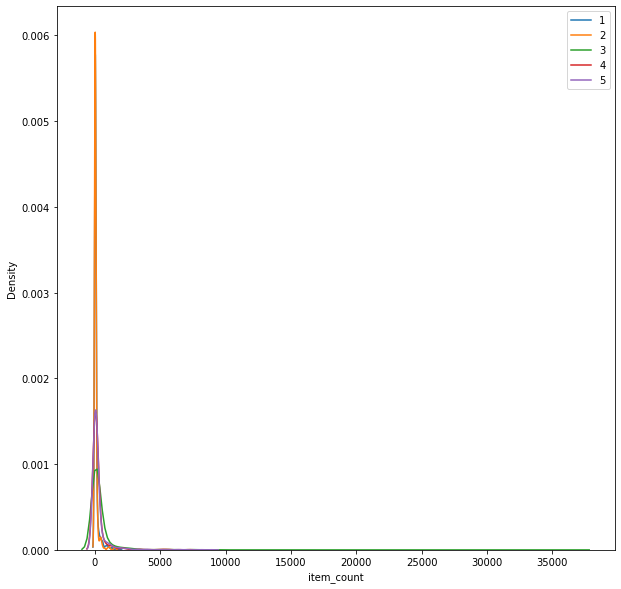

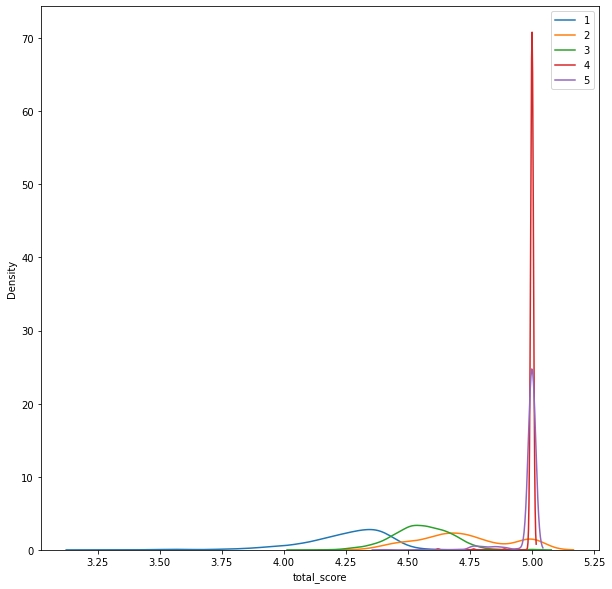

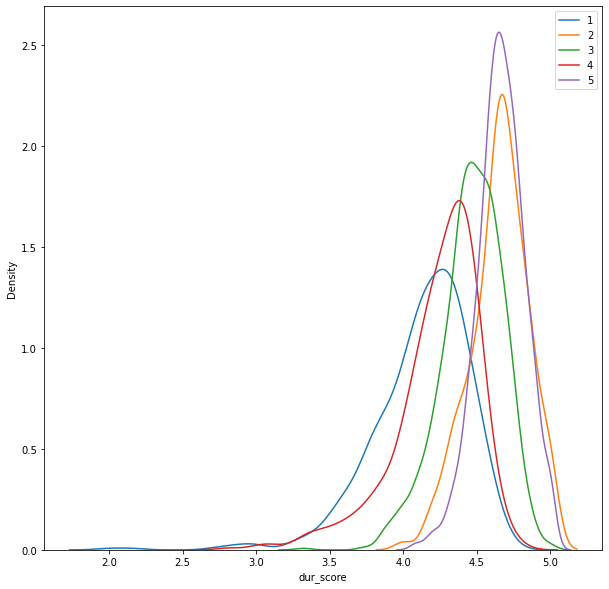

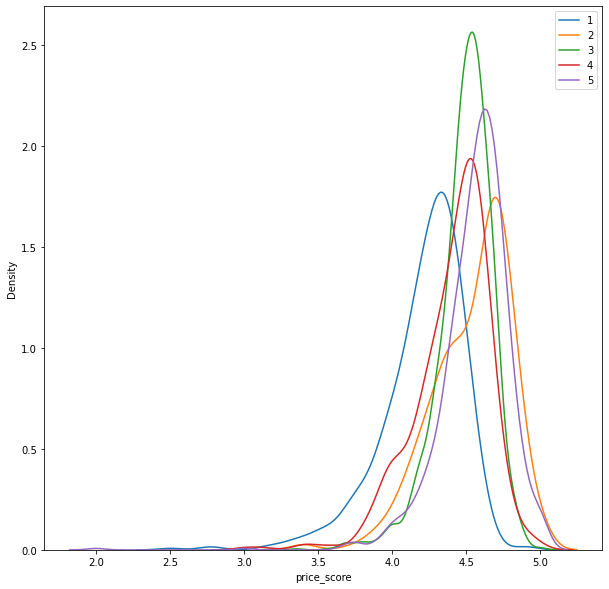

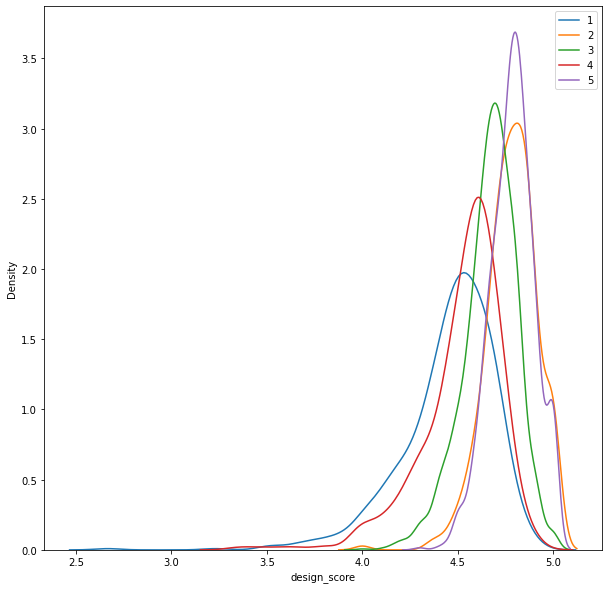

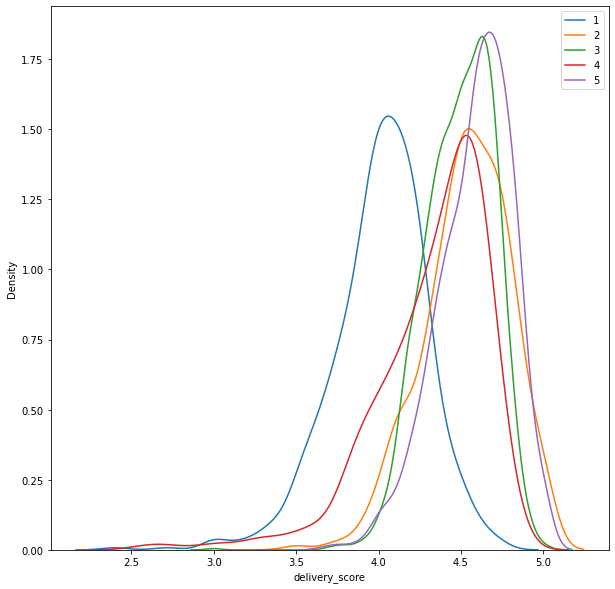

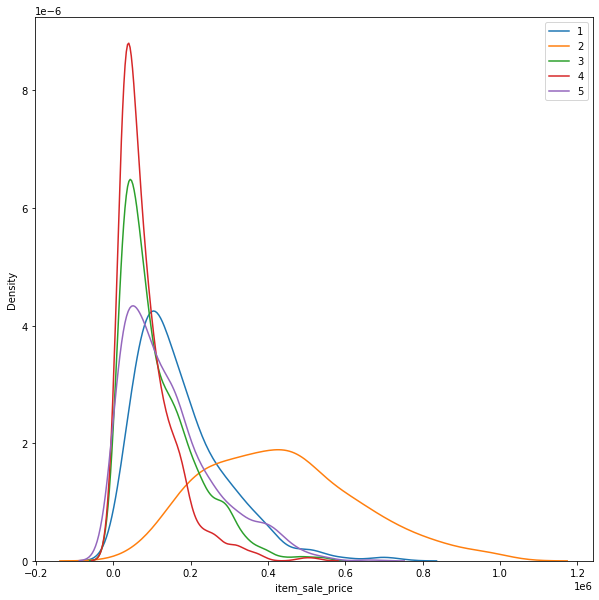

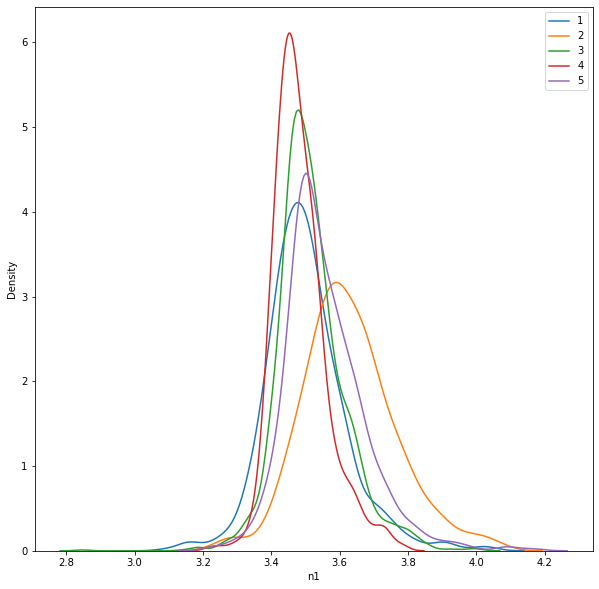

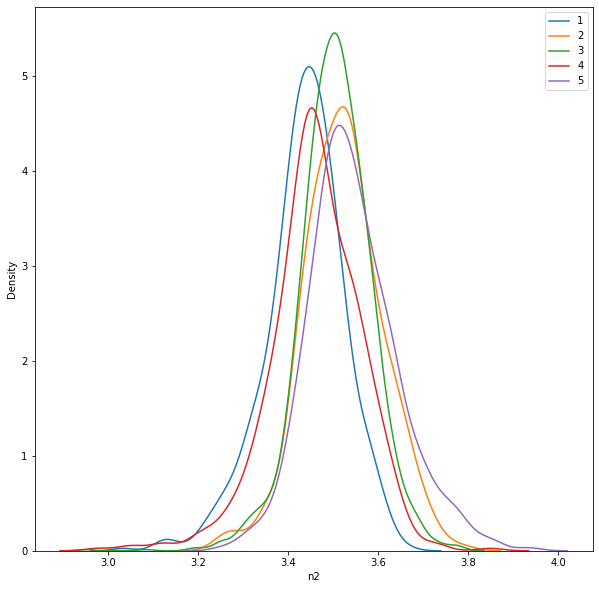

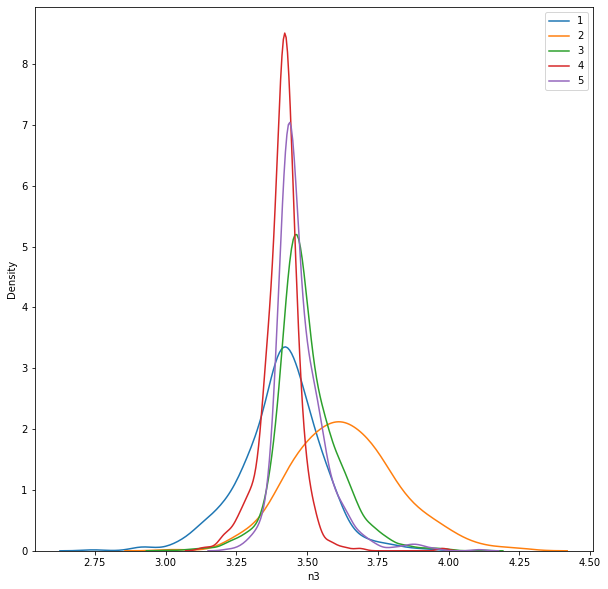

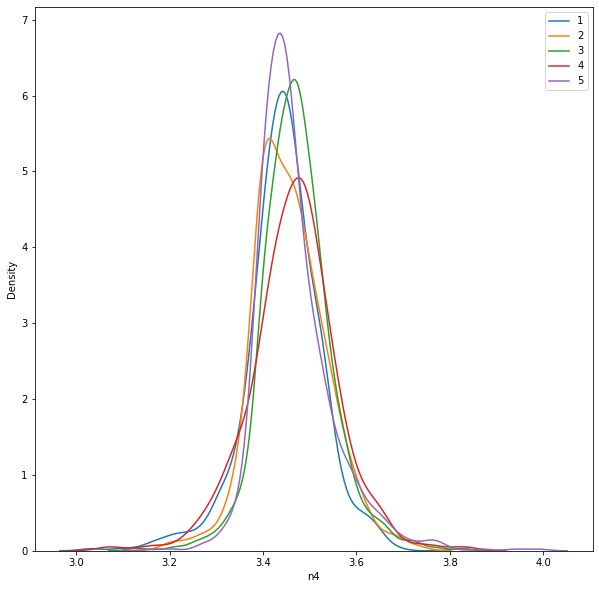

In [ ]:
for col in cl.columns[3:14]:
    plt.figure(figsize = (10, 10))
    for clus in cl["c5"].unique():
        sns.distplot(cl.query("c5 == @clus")[col], hist = False, label = clus)
    plt.legend()
    plt.show()

## 6 Clusters

In [ ]:
for c in cl["c6"].unique():
    print(c, "th cluster")
    df = cl.query("c6 == @c").reset_index(drop = True)
    display(df)
    print(df["item_category1"].value_counts())
    print(df["item_brand"].value_counts())
    print("")

1 th cluster


item_name item_category1  ... c9  c10
0                              BERGEN 데이베드 침대             침대  ...  1    1
1                            ISABELLA 데이베드 침대             침대  ...  1    1
2               (리뷰이벤트) 바오 틈새수납장 스탠딩 화장대(콘센트)         화장대/콘솔  ...  1    1
3    (리뷰이벤트) 하이 LED조명 통서랍 수납침대 프레임 SS/Q (콘센트)             침대  ...  1    1
4             1+1 폴리 바체어 홈바의자 3colors (절삭서비스)             의자  ...  1    1
..                                        ...            ...  ... ..  ...
469                        헤이미쉬 리빙다이닝 1인 원목벤치             의자  ...  1    1
470                   헤이츠 모던 1200 렌지대 2colors         서랍/수납장  ...  1    1
471                            헤일리 라탄가구 케인수납장         서랍/수납장  ...  1    1
472                             헬리아 LED조명 화장대         화장대/콘솔  ...  1    1
473   힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)             침대  ...  1    1

[474 rows x 21 columns]

침대        184
서랍/수납장    156
화장대/콘솔     57
의자         44
소파         33
Name: item_category1, dtype: int64
잉글랜더        26
삼익가구        18
레이디가구       17
동서가구(dF)    16
동서가구        13
            ..
우디크          1
듀오백          1
아피나 모블러      1
아인스홈         1
번드           1
Name: item_brand, Length: 158, dtype: int64

2 th cluster


item_name item_category1  ... c9  c10
0                      CHAMBER 벙커침대 3size             침대  ...  2    2
1                         MAKONIS 침대 SS/Q             침대  ...  2    2
2     MARINO 분리형 이층침대 트윈싱글 3colors 100200             침대  ...  2    2
3          VELLO 이층침대 싱글/더블 100200/140200             침대  ...  2    2
4           1+1 이튼 고무나무 원목 디자인 의자 2colors             의자  ...  2    2
..                                    ...            ...  ... ..  ...
187           플로어 LED 저상형침대 2colors(매트포함)             침대  ...  2    2
188            피크체어 원목 인조가죽 화장대의자 3colors             의자  ...  2    2
189          핀 원목침대 매트포함 (슈퍼싱글/퀸) 4colors             침대  ...  2    2
190               해리 고무나무 원목 광폭 수납 5단 서랍장         서랍/수납장  ...  2    2
191        핸디 베이직 3단 서랍형 수납침대 프레임 2colors             침대  ...  2    2

[192 rows x 21 columns]

침대        72
서랍/수납장    46
의자        45
화장대/콘솔    17
소파        12
Name: item_category1, dtype: int64
마켓비         19
리샘          12
레이디가구        9
블루밍홈         8
동서가구(dF)     7
            ..
마티노가구        1
베드리움         1
지니앤퍼니        1
서광퍼니처        1
일루일루         1
Name: item_brand, Length: 83, dtype: int64

3 th cluster


item_name item_category1  ... c9  c10
0                   MILKAM 콘솔수납장 17585 CHM85175         서랍/수납장  ...  3    3
1                   6인 콘센트형 다이닝테이블 의자세트 2colors         테이블/책상  ...  3    3
2              ADEL 철제침대 매트리스 프레임 2colors(SS/Q)             침대  ...  9   10
3                Acne 침대 매트리스 프레임 3colors(SS/Q)             침대  ...  9   10
4                           Asusa 원목 콘솔화장대 거울포함         화장대/콘솔  ...  9   10
..                                          ...            ...  ... ..  ...
346                     헤이즐 무헤드 평상형 퀸 침대 프레임(Q)             침대  ...  9   10
347        헤이즐 침대(Q,K,KK 공용)(매트리스 미포함)(조명형,평상형)             침대  ...  3    3
348  헨트데이베드 고무나무 3인 패브릭 소파베드/원목소파 2type 6colors             소파  ...  3    3
349           확장형 세라믹 인출식 식탁 1600~2300 (2color)         테이블/책상  ...  3    3
350         히노 편백 원목 LED헤드 멀티수납형 침대 SS/Q (매트제외)             침대  ...  9   10

[351 rows x 21 columns]

침대        234
테이블/책상     59
서랍/수납장     24
화장대/콘솔     21
소파          8
의자          5
Name: item_category1, dtype: int64
한샘        22
리바트       21
삼익가구      21
에몬스       10
일룸        10
          ..
엘라비아       1
버즈가구       1
가구앤하우스     1
리센트        1
세진침대       1
Name: item_brand, Length: 124, dtype: int64

4 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0                        RELLY 침대 시리즈             침대        마켓비  ...   4   4    4
1                (1+1) 내츄럴모노 윈저 의자 세트             의자         포홈  ...   4   4    4
2       (국내생산) 학생/사무용 책상 의자 S10 (기본형)             의자         싯존  ...   5   5    5
3       (국내생산) 학생/사무용 책상 의자 S10 (헤드형)             의자         싯존  ...   4   4    4
4     (국내생산) 학생/사무용 책상 의자 STC10 (기본형)             의자         싯존  ...   5   5    5
...                               ...            ...        ...  ...  ..  ..  ...
1888                     휘게체어 5colors             의자        룸앤홈  ...   5   5    5
1889   휴 LED 3서랍수납형 침대(매트 미포함) SS/Q/K             침대       가구데코  ...   8   8    8
1890         휴 조이 좌식 리클라이너 의자 2colors             의자         한샘  ...   4   4    4
1891                         히포 원목 체어             의자     레트로하우스  ...   4   4    4
1892             힙스터 수납형 드럼스툴 8colors             의자      씨에스리빙  ...   4   4    4

[1893 rows x 21 columns]

의자        701
침대        468
서랍/수납장    442
화장대/콘솔    156
소파        119
테이블/책상      7
Name: item_category1, dtype: int64
마켓비      89
블루밍홈     56
한샘       36
삼익가구     35
이케아      32
         ..
퍼치스       1
코끼리리빙     1
더젠        1
까르엠가구     1
이데컴퍼니     1
Name: item_brand, Length: 380, dtype: int64

5 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0               (당일발송) 가로 높이조절 사이드테이블         테이블/책상         키모  ...   6   6    6
1                   (당일발송) 다용도 좌식 테이블         테이블/책상         키모  ...   6   6    6
2    (당일발송) 다용도 카페 식탁 테이블 800 2colors         테이블/책상         키모  ...   6   6    6
3              (당일발송) 스틸 책상 겸 테이블 800         테이블/책상         키모  ...   6   6    6
4                 (당일발송) 스틸 테이블 2size         테이블/책상         키모  ...   6   6    6
..                                ...            ...        ...  ...  ..  ..  ...
536                   화이트 마틴 H형 좌식 책상         테이블/책상       일루일루  ...   6   6    6
537              화이트 마틴 기본형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
538             화이트 마틴 스퀘어형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
539       화이트식탁 800 원목 원형 테이블 GLS165C         테이블/책상        나무뜰  ...   6   6    6
540                    히토 대리석 사이드 테이블         테이블/책상      플레르가구  ...   6   6    6

[541 rows x 21 columns]

테이블/책상    538
침대          3
Name: item_category1, dtype: int64
블루밍홈       35
앳홈         21
베스트리빙      19
마켓비        17
프리메이드      16
           ..
아이데뉴        1
심포니디자인      1
라이크하우스      1
장인가구        1
아이리스코리아     1
Name: item_brand, Length: 170, dtype: int64

6 th cluster


item_name item_category1  ... c9  c10
0                         (당일발송) 스틸 좌식 데스크 확장형         테이블/책상  ...  7    7
1                       (본사직영) 앤디 거실테이블 6types         테이블/책상  ...  7    9
2                1+1 CH9930 루체 카페 식탁의자 6colors             의자  ...  7    7
3              1+1 더쉼 포켓스프링 리클라이너 좌식의자 2colors             소파  ...  7    7
4           1+1 폴리 쿠션 바체어 홈바의자 3colors (절삭서비스)             의자  ...  7    7
..                                         ...            ...  ... ..  ...
904  화이트 타원 좌식 소파 접이식 화이트 다리 거실 테이블 1200 x 600         테이블/책상  ...  7    7
905         화이트 호마이카 HPL HPM 라미네이트 라운드 2인 원목식탁         테이블/책상  ...  7    7
906               화이트식탁 1000 원목 원형 테이블 GLS166C         테이블/책상  ...  7    7
907                           확장형 티테이블 2colors         테이블/책상  ...  7    7
908                                  히알린 좌식테이블         테이블/책상  ...  7    7

[909 rows x 21 columns]

테이블/책상    824
의자         35
침대         28
화장대/콘솔      9
서랍/수납장      9
소파          4
Name: item_category1, dtype: int64
오홀리브      53
소프시스      21
로포텐       21
보니애가구     19
한샘        18
          ..
상일리베가구     1
잉글랜더       1
일루일루       1
마티노가구      1
참갤러리       1
Name: item_brand, Length: 261, dtype: int64



item_count


<Figure size 864x864 with 0 Axes>

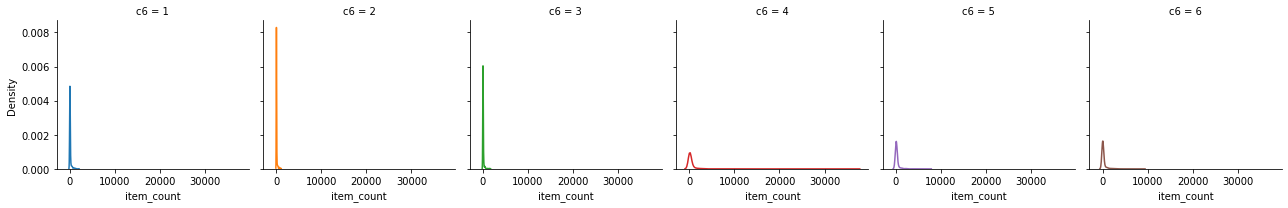

total_score


<Figure size 864x864 with 0 Axes>

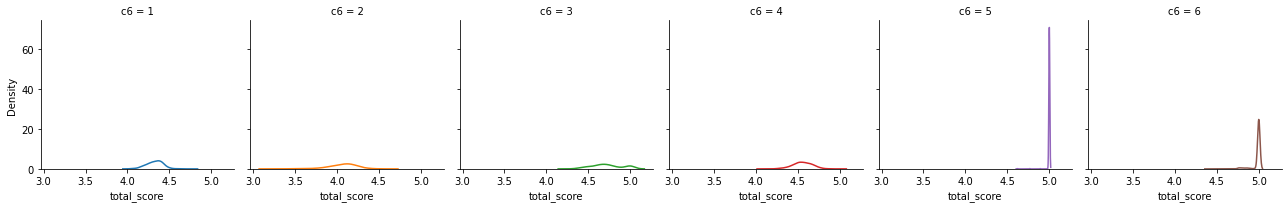

dur_score


<Figure size 864x864 with 0 Axes>

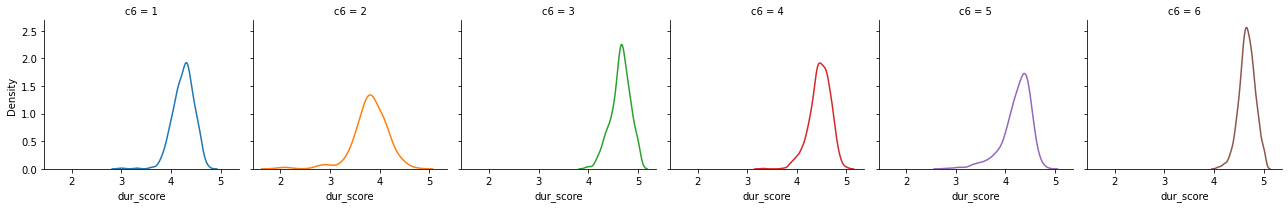

price_score


<Figure size 864x864 with 0 Axes>

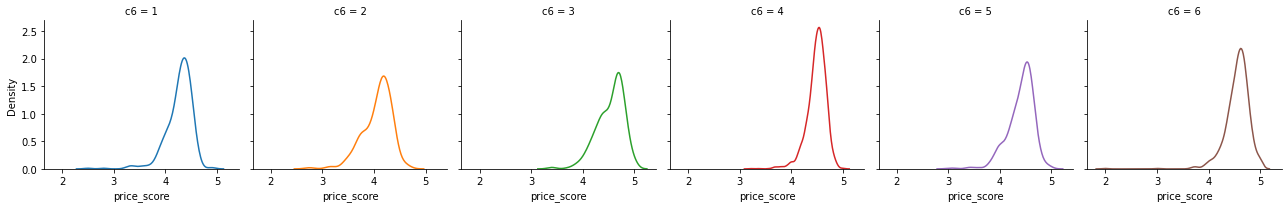

design_score


<Figure size 864x864 with 0 Axes>

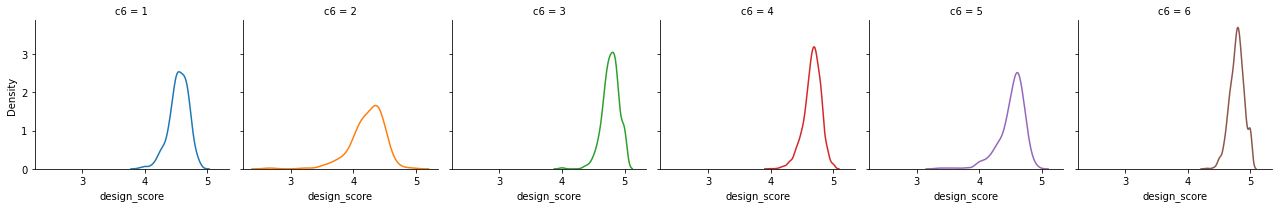

delivery_score


<Figure size 864x864 with 0 Axes>

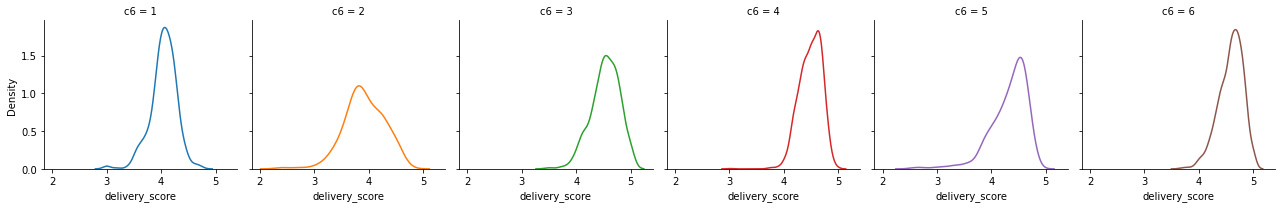

item_sale_price


<Figure size 864x864 with 0 Axes>

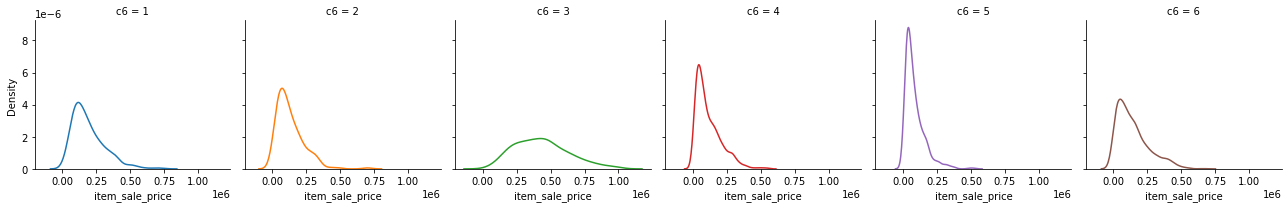

n1


<Figure size 864x864 with 0 Axes>

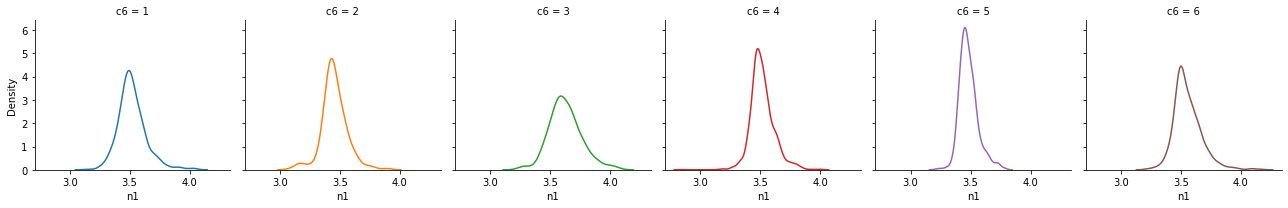

n2


<Figure size 864x864 with 0 Axes>

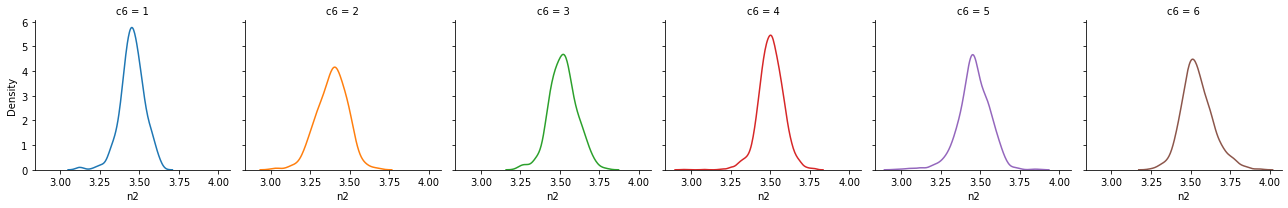

n3


<Figure size 864x864 with 0 Axes>

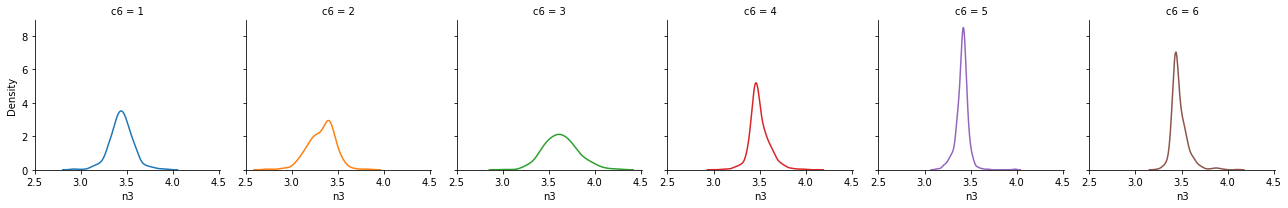

n4


<Figure size 864x864 with 0 Axes>

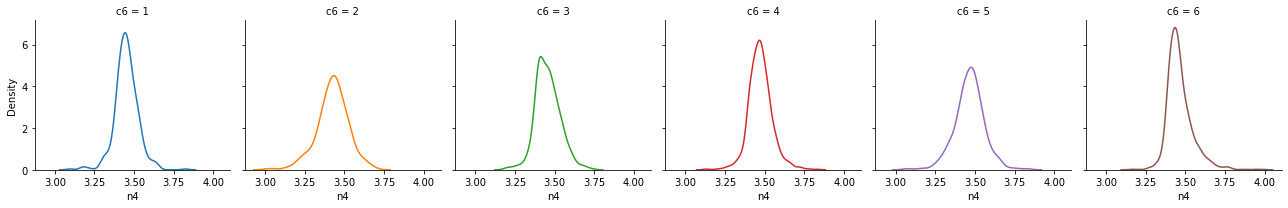

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for col in cl.columns[3:14]:
    plt.figure(figsize = (12, 12))
    print(col)
    grid = sns.FacetGrid(data = cl, col = "c6", hue = "c6")
    grid.map(sns.distplot, col, hist = False)
    plt.show()

In [ ]:
import pandas as pd
cl = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/cluster_/final_cluster.csv')

ax1 = fig.add_subplot(rows, cols, 1)

for col in cl.columns[3:14]:
    plt.figure(figsize = (10, 10))
    for clus in cl["c6"].unique():
        sns.distplot(cl.query("c6 == @clus")[col], hist = False, label = clus)
    plt.legend()
    plt.show()

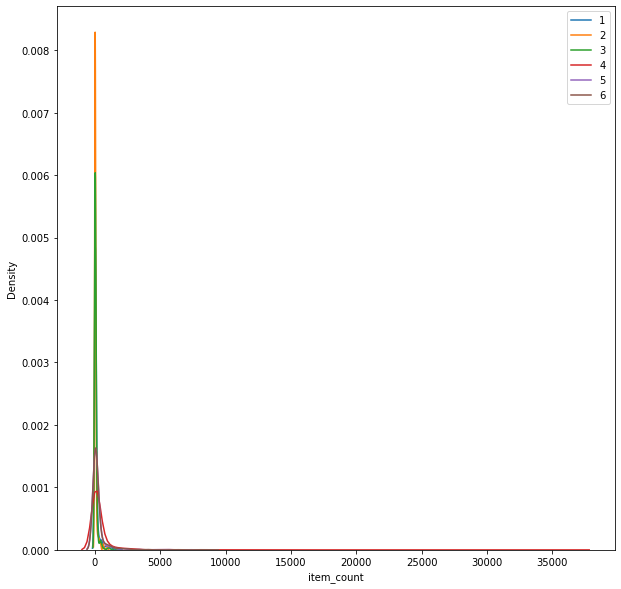

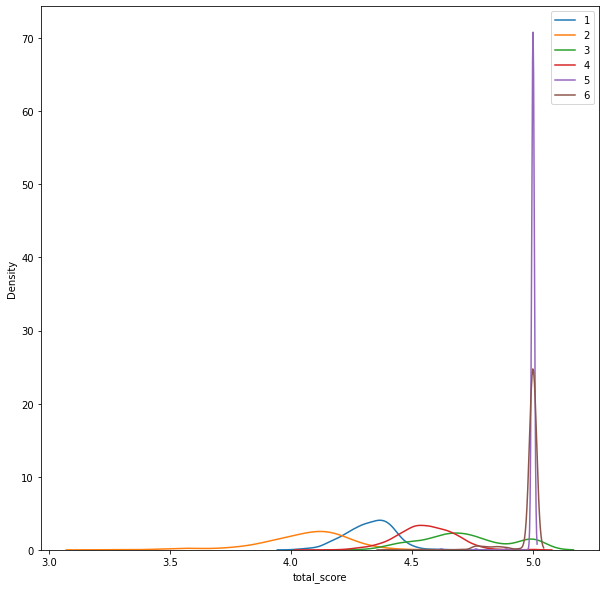

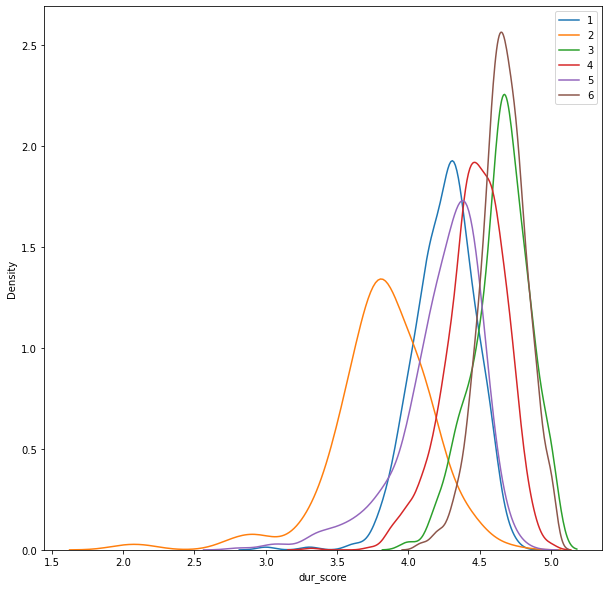

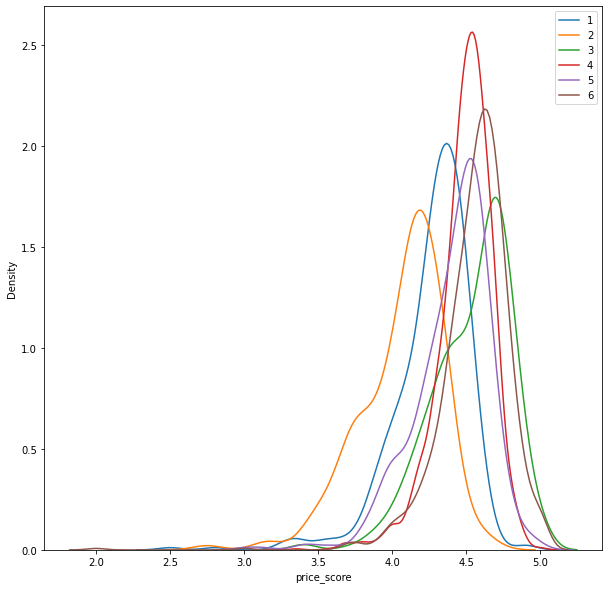

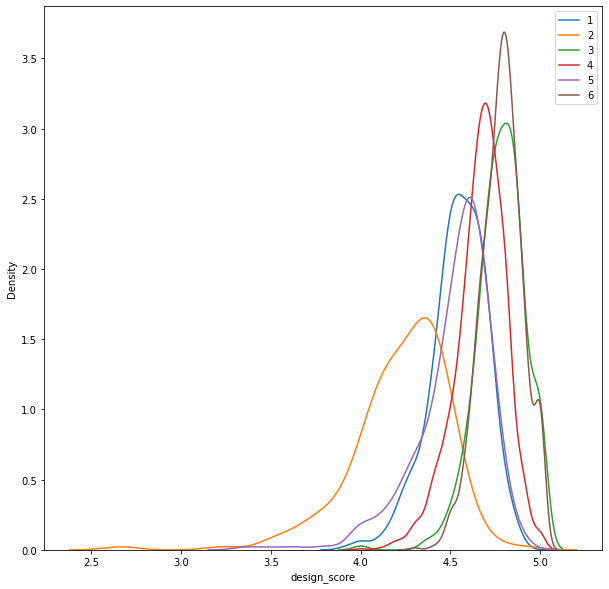

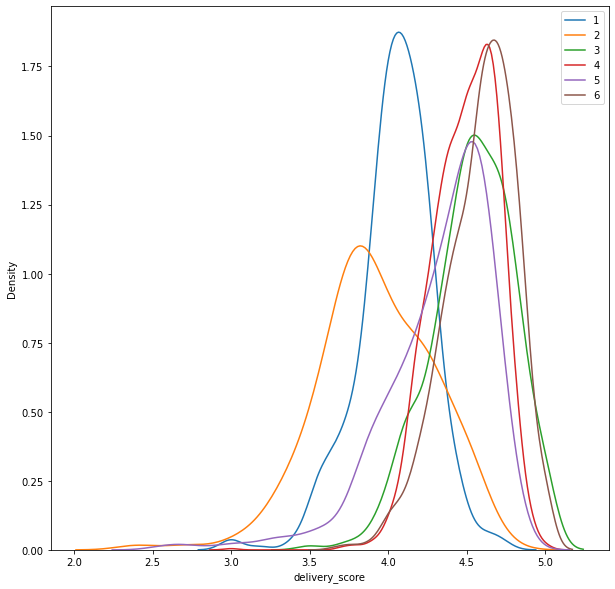

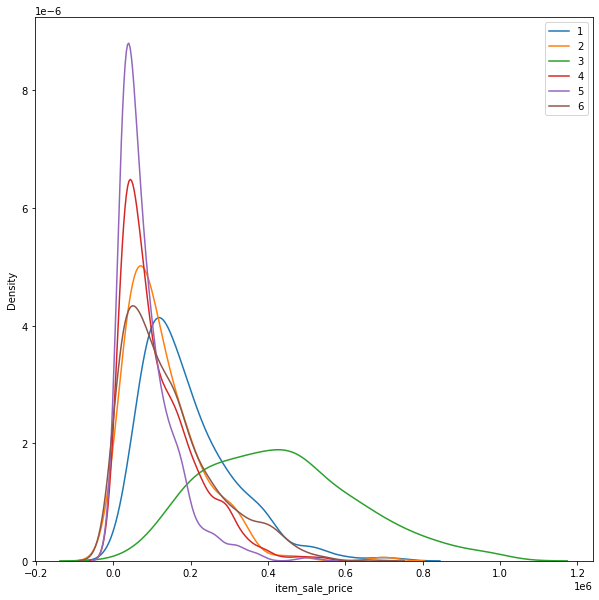

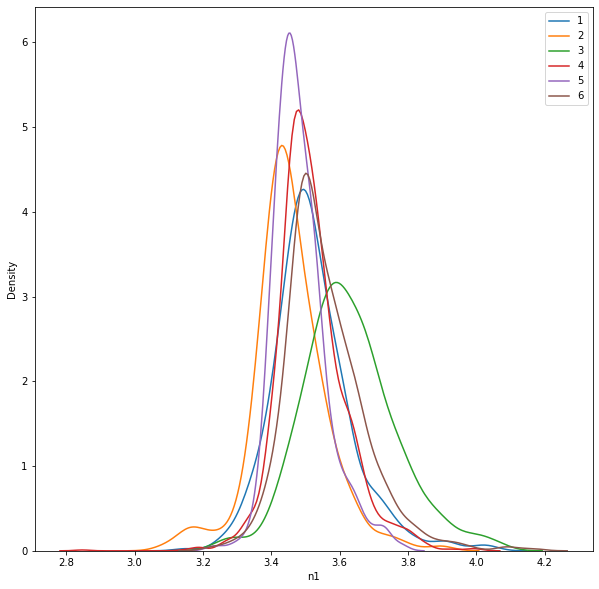

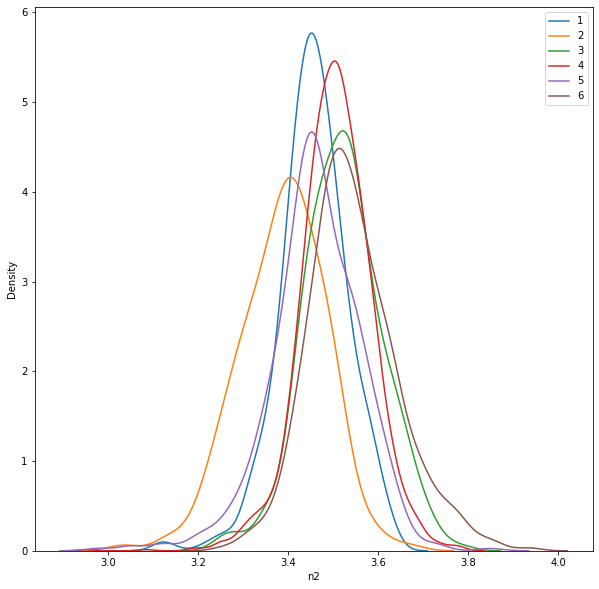

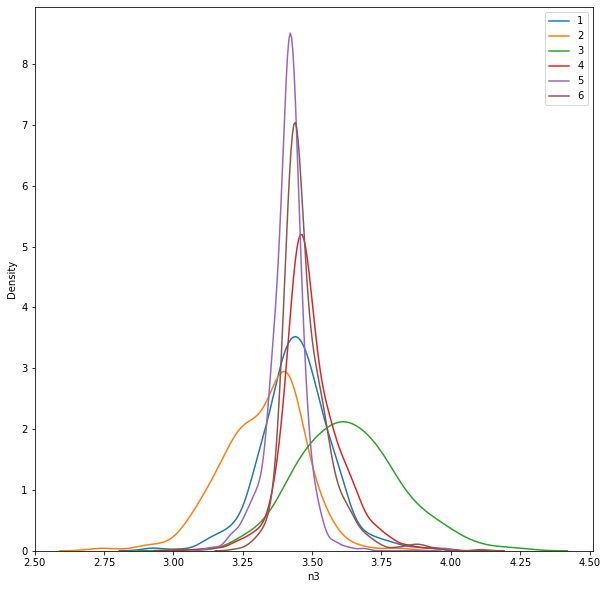

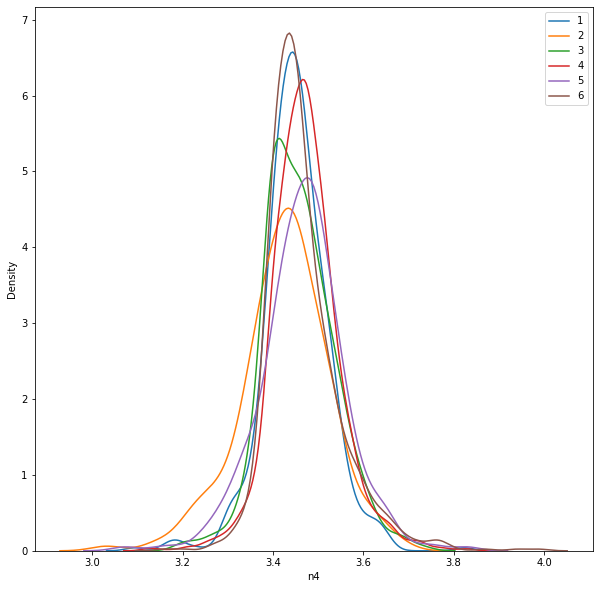

In [ ]:
for col in cl.columns[3:14]:
    plt.figure(figsize = (10, 10))
    for clus in cl["c6"].unique():
        sns.distplot(cl.query("c6 == @clus")[col], hist = False, label = clus)
    plt.legend()
    plt.show()

## 7 Clusters

In [ ]:
for c in cl["c7"].unique():
    print(c, "th cluster")
    df = cl.query("c7 == @c").reset_index(drop = True)
    display(df)
    print(df["item_category1"].value_counts())
    print(df["item_brand"].value_counts())
    print("")

1 th cluster


item_name item_category1  ... c9  c10
0                              BERGEN 데이베드 침대             침대  ...  1    1
1                            ISABELLA 데이베드 침대             침대  ...  1    1
2               (리뷰이벤트) 바오 틈새수납장 스탠딩 화장대(콘센트)         화장대/콘솔  ...  1    1
3    (리뷰이벤트) 하이 LED조명 통서랍 수납침대 프레임 SS/Q (콘센트)             침대  ...  1    1
4             1+1 폴리 바체어 홈바의자 3colors (절삭서비스)             의자  ...  1    1
..                                        ...            ...  ... ..  ...
469                        헤이미쉬 리빙다이닝 1인 원목벤치             의자  ...  1    1
470                   헤이츠 모던 1200 렌지대 2colors         서랍/수납장  ...  1    1
471                            헤일리 라탄가구 케인수납장         서랍/수납장  ...  1    1
472                             헬리아 LED조명 화장대         화장대/콘솔  ...  1    1
473   힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)             침대  ...  1    1

[474 rows x 21 columns]

침대        184
서랍/수납장    156
화장대/콘솔     57
의자         44
소파         33
Name: item_category1, dtype: int64
잉글랜더        26
삼익가구        18
레이디가구       17
동서가구(dF)    16
동서가구        13
            ..
우디크          1
듀오백          1
아피나 모블러      1
아인스홈         1
번드           1
Name: item_brand, Length: 158, dtype: int64

2 th cluster


item_name item_category1  ... c9  c10
0                      CHAMBER 벙커침대 3size             침대  ...  2    2
1                         MAKONIS 침대 SS/Q             침대  ...  2    2
2     MARINO 분리형 이층침대 트윈싱글 3colors 100200             침대  ...  2    2
3          VELLO 이층침대 싱글/더블 100200/140200             침대  ...  2    2
4           1+1 이튼 고무나무 원목 디자인 의자 2colors             의자  ...  2    2
..                                    ...            ...  ... ..  ...
187           플로어 LED 저상형침대 2colors(매트포함)             침대  ...  2    2
188            피크체어 원목 인조가죽 화장대의자 3colors             의자  ...  2    2
189          핀 원목침대 매트포함 (슈퍼싱글/퀸) 4colors             침대  ...  2    2
190               해리 고무나무 원목 광폭 수납 5단 서랍장         서랍/수납장  ...  2    2
191        핸디 베이직 3단 서랍형 수납침대 프레임 2colors             침대  ...  2    2

[192 rows x 21 columns]

침대        72
서랍/수납장    46
의자        45
화장대/콘솔    17
소파        12
Name: item_category1, dtype: int64
마켓비         19
리샘          12
레이디가구        9
블루밍홈         8
동서가구(dF)     7
            ..
마티노가구        1
베드리움         1
지니앤퍼니        1
서광퍼니처        1
일루일루         1
Name: item_brand, Length: 83, dtype: int64

3 th cluster


item_name item_category1  ... c9  c10
0                   MILKAM 콘솔수납장 17585 CHM85175         서랍/수납장  ...  3    3
1                   6인 콘센트형 다이닝테이블 의자세트 2colors         테이블/책상  ...  3    3
2              ADEL 철제침대 매트리스 프레임 2colors(SS/Q)             침대  ...  9   10
3                Acne 침대 매트리스 프레임 3colors(SS/Q)             침대  ...  9   10
4                           Asusa 원목 콘솔화장대 거울포함         화장대/콘솔  ...  9   10
..                                          ...            ...  ... ..  ...
346                     헤이즐 무헤드 평상형 퀸 침대 프레임(Q)             침대  ...  9   10
347        헤이즐 침대(Q,K,KK 공용)(매트리스 미포함)(조명형,평상형)             침대  ...  3    3
348  헨트데이베드 고무나무 3인 패브릭 소파베드/원목소파 2type 6colors             소파  ...  3    3
349           확장형 세라믹 인출식 식탁 1600~2300 (2color)         테이블/책상  ...  3    3
350         히노 편백 원목 LED헤드 멀티수납형 침대 SS/Q (매트제외)             침대  ...  9   10

[351 rows x 21 columns]

침대        234
테이블/책상     59
서랍/수납장     24
화장대/콘솔     21
소파          8
의자          5
Name: item_category1, dtype: int64
한샘        22
리바트       21
삼익가구      21
에몬스       10
일룸        10
          ..
엘라비아       1
버즈가구       1
가구앤하우스     1
리센트        1
세진침대       1
Name: item_brand, Length: 124, dtype: int64

4 th cluster


item_name item_category1  ... c9  c10
0                                   RELLY 침대 시리즈             침대  ...  4    4
1                           (1+1) 내츄럴모노 윈저 의자 세트             의자  ...  4    4
2                  (국내생산) 학생/사무용 책상 의자 S10 (헤드형)             의자  ...  4    4
3     (당일발송) 라인 원형 벨벳 수납 스툴 의자 2colors (+사은품 증정)             의자  ...  4    4
4                (리뷰이벤트) 그루브 LED조명 수납침대 프레임 SS/Q             침대  ...  4    4
...                                          ...            ...  ... ..  ...
1329                       화이트우드 4단 전자렌지대 / 4단선반         서랍/수납장  ...  4    4
1330              휴 LED 3서랍수납형 침대(매트 미포함) SS/Q/K             침대  ...  8    8
1331                    휴 조이 좌식 리클라이너 의자 2colors             의자  ...  4    4
1332                                    히포 원목 체어             의자  ...  4    4
1333                        힙스터 수납형 드럼스툴 8colors             의자  ...  4    4

[1334 rows x 21 columns]

침대        421
의자        373
서랍/수납장    319
화장대/콘솔    123
소파         97
테이블/책상      1
Name: item_category1, dtype: int64
마켓비      76
블루밍홈     40
삼익가구     31
에보니아     25
리샘       22
         ..
디엘로       1
에코상사      1
씨에스리빙     1
키모        1
이데컴퍼니     1
Name: item_brand, Length: 313, dtype: int64

5 th cluster


item_name item_category1  ... c9  c10
0              (국내생산) 학생/사무용 책상 의자 S10 (기본형)             의자  ...  5    5
1            (국내생산) 학생/사무용 책상 의자 STC10 (기본형)             의자  ...  5    5
2            (국내생산) 학생/사무용 책상 의자 STC18 (기본형)             의자  ...  5    5
3    (당일발송) 원형 벨벳 수납 스툴 의자 4colors (+사은품 증정)             의자  ...  5    5
4                (당일발송) 카페 인테리어 식탁 의자 4color             의자  ...  5    5
..                                       ...            ...  ... ..  ...
554                           협탁겸 원목스툴 2종 택1             의자  ...  5    5
555                 호라이즌 싱글 슈퍼싱글 철제침대 (S/SS)             침대  ...  5    5
556         호텔패브릭원단 SILLY 좌식의자 4colors(당일발송)             의자  ...  5    5
557              화이트 폭좁은 슬림 5단 서랍장 500 (화이트)         서랍/수납장  ...  5    5
558                             휘게체어 5colors             의자  ...  5    5

[559 rows x 21 columns]

의자        328
서랍/수납장    123
침대         47
화장대/콘솔     33
소파         22
테이블/책상      6
Name: item_category1, dtype: int64
이케아         20
블루밍홈        16
에코상사        15
한샘          15
리바트         14
            ..
사이즈오브        1
리빙디자인연구소     1
트리니퍼니처       1
골든스트릿        1
가구로드         1
Name: item_brand, Length: 219, dtype: int64

6 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0               (당일발송) 가로 높이조절 사이드테이블         테이블/책상         키모  ...   6   6    6
1                   (당일발송) 다용도 좌식 테이블         테이블/책상         키모  ...   6   6    6
2    (당일발송) 다용도 카페 식탁 테이블 800 2colors         테이블/책상         키모  ...   6   6    6
3              (당일발송) 스틸 책상 겸 테이블 800         테이블/책상         키모  ...   6   6    6
4                 (당일발송) 스틸 테이블 2size         테이블/책상         키모  ...   6   6    6
..                                ...            ...        ...  ...  ..  ..  ...
536                   화이트 마틴 H형 좌식 책상         테이블/책상       일루일루  ...   6   6    6
537              화이트 마틴 기본형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
538             화이트 마틴 스퀘어형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
539       화이트식탁 800 원목 원형 테이블 GLS165C         테이블/책상        나무뜰  ...   6   6    6
540                    히토 대리석 사이드 테이블         테이블/책상      플레르가구  ...   6   6    6

[541 rows x 21 columns]

테이블/책상    538
침대          3
Name: item_category1, dtype: int64
블루밍홈       35
앳홈         21
베스트리빙      19
마켓비        17
프리메이드      16
           ..
아이데뉴        1
심포니디자인      1
라이크하우스      1
장인가구        1
아이리스코리아     1
Name: item_brand, Length: 170, dtype: int64

7 th cluster


item_name item_category1  ... c9  c10
0                         (당일발송) 스틸 좌식 데스크 확장형         테이블/책상  ...  7    7
1                       (본사직영) 앤디 거실테이블 6types         테이블/책상  ...  7    9
2                1+1 CH9930 루체 카페 식탁의자 6colors             의자  ...  7    7
3              1+1 더쉼 포켓스프링 리클라이너 좌식의자 2colors             소파  ...  7    7
4           1+1 폴리 쿠션 바체어 홈바의자 3colors (절삭서비스)             의자  ...  7    7
..                                         ...            ...  ... ..  ...
904  화이트 타원 좌식 소파 접이식 화이트 다리 거실 테이블 1200 x 600         테이블/책상  ...  7    7
905         화이트 호마이카 HPL HPM 라미네이트 라운드 2인 원목식탁         테이블/책상  ...  7    7
906               화이트식탁 1000 원목 원형 테이블 GLS166C         테이블/책상  ...  7    7
907                           확장형 티테이블 2colors         테이블/책상  ...  7    7
908                                  히알린 좌식테이블         테이블/책상  ...  7    7

[909 rows x 21 columns]

테이블/책상    824
의자         35
침대         28
화장대/콘솔      9
서랍/수납장      9
소파          4
Name: item_category1, dtype: int64
오홀리브      53
소프시스      21
로포텐       21
보니애가구     19
한샘        18
          ..
상일리베가구     1
잉글랜더       1
일루일루       1
마티노가구      1
참갤러리       1
Name: item_brand, Length: 261, dtype: int64



item_count


<Figure size 864x864 with 0 Axes>

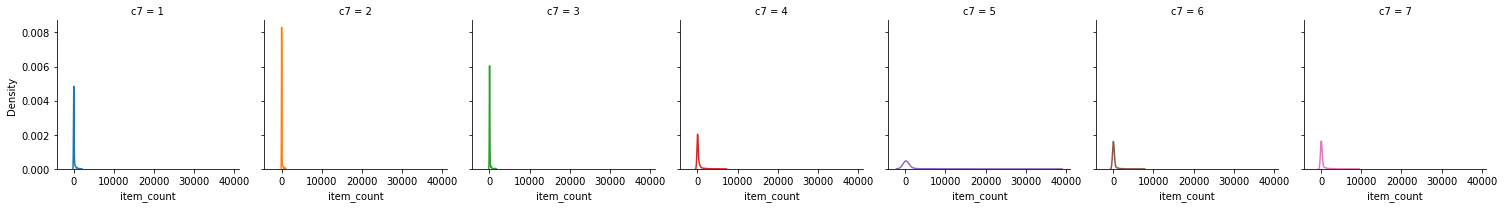

total_score


<Figure size 864x864 with 0 Axes>

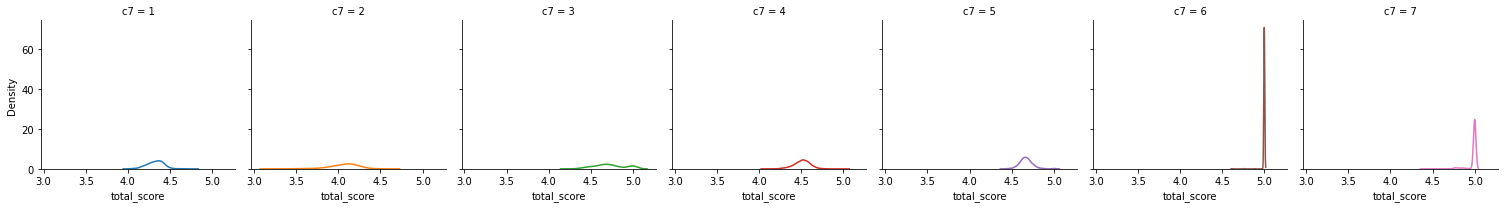

dur_score


<Figure size 864x864 with 0 Axes>

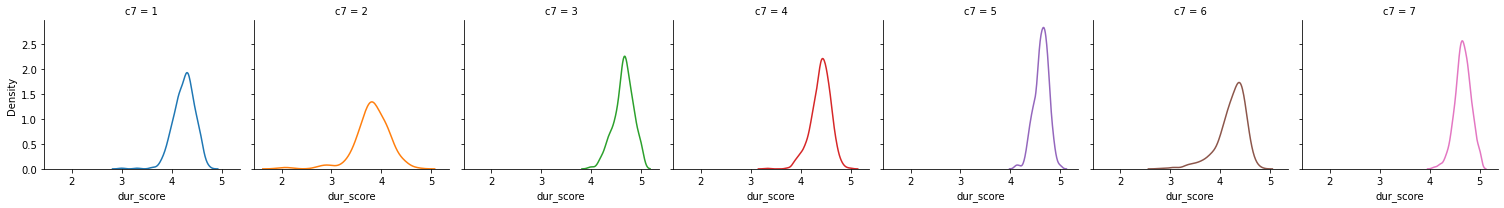

price_score


<Figure size 864x864 with 0 Axes>

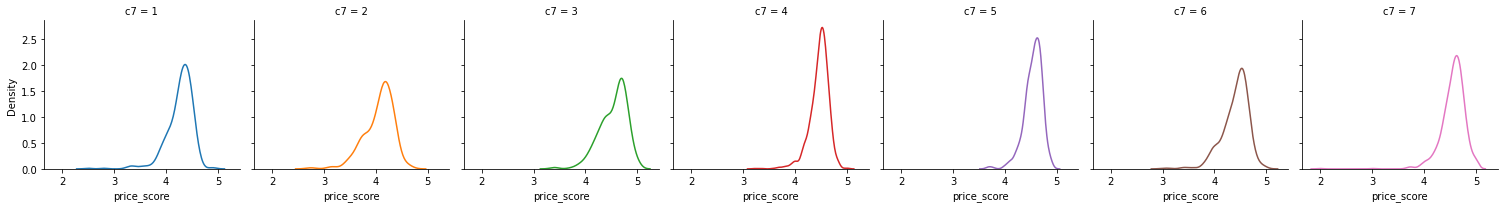

design_score


<Figure size 864x864 with 0 Axes>

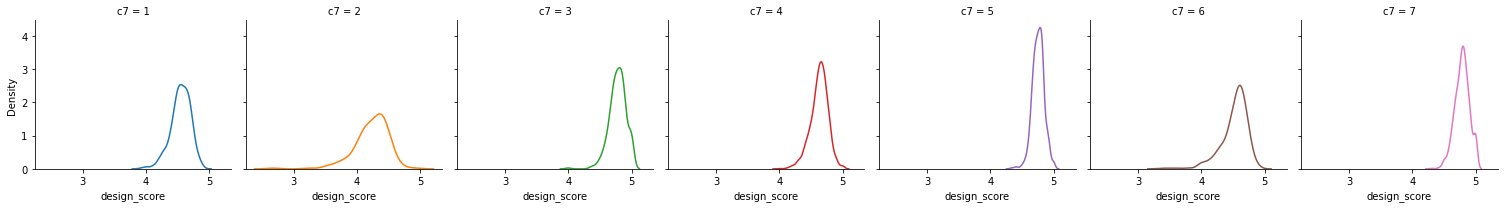

delivery_score


<Figure size 864x864 with 0 Axes>

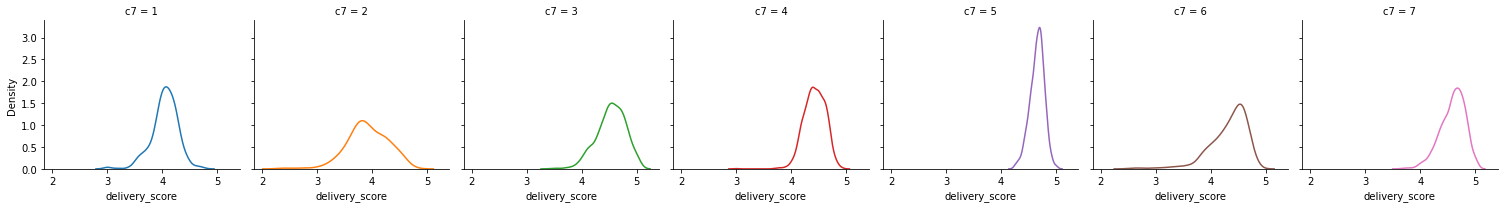

item_sale_price


<Figure size 864x864 with 0 Axes>

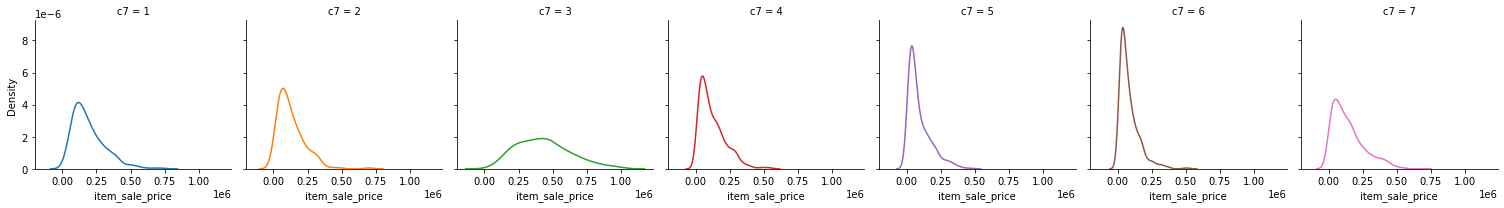

n1


<Figure size 864x864 with 0 Axes>

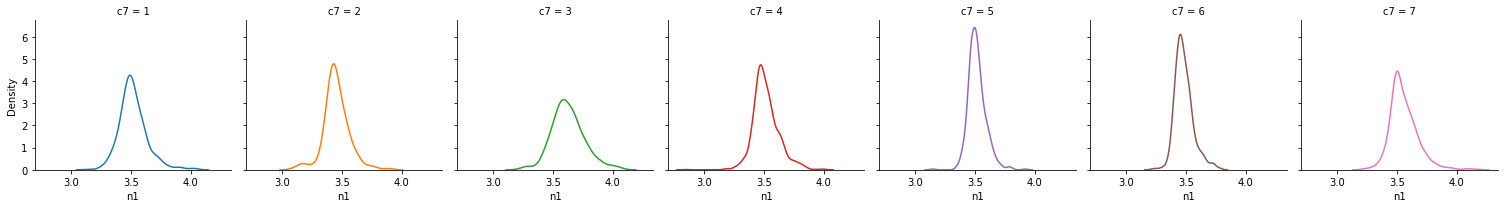

n2


<Figure size 864x864 with 0 Axes>

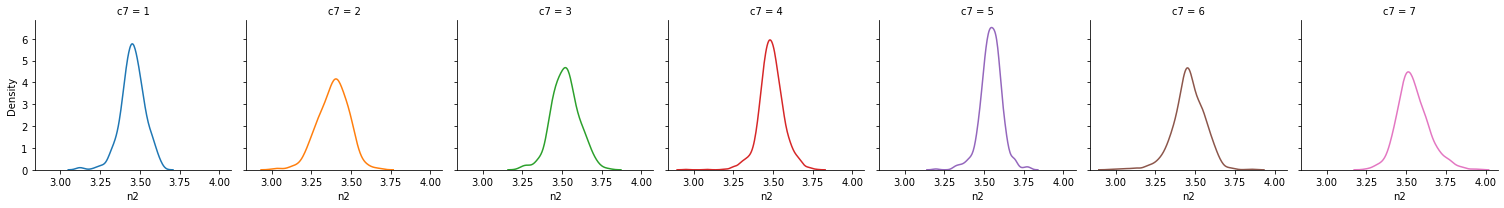

n3


<Figure size 864x864 with 0 Axes>

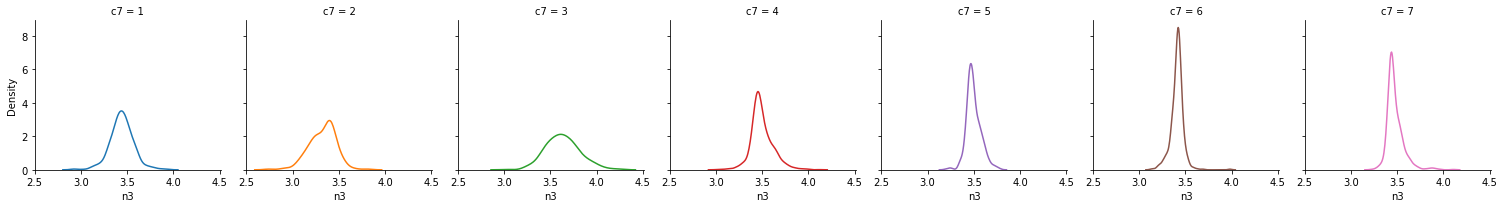

n4


<Figure size 864x864 with 0 Axes>

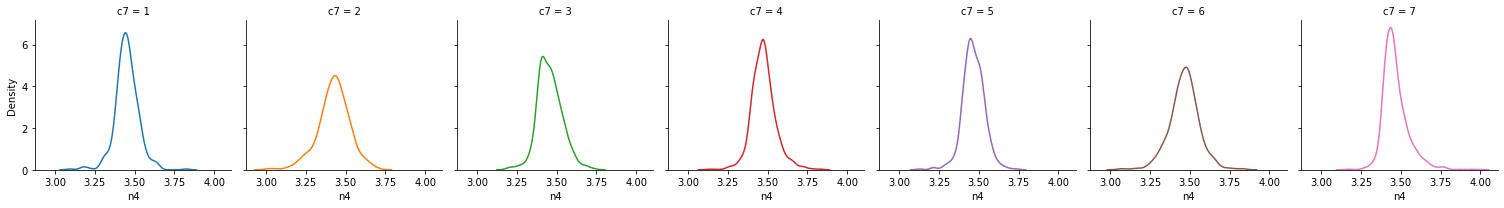

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for col in cl.columns[3:14]:
    plt.figure(figsize = (12, 12))
    print(col)
    grid = sns.FacetGrid(data = cl, col = "c7", hue = "c7")
    grid.map(sns.distplot, col, hist = False)
    plt.show()

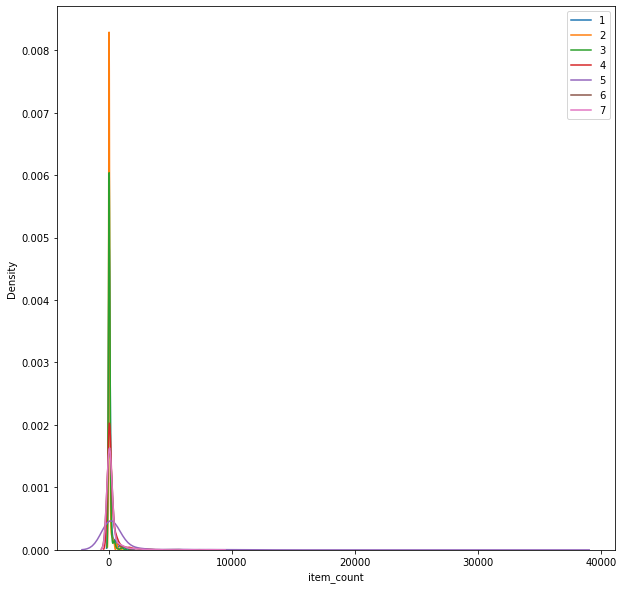

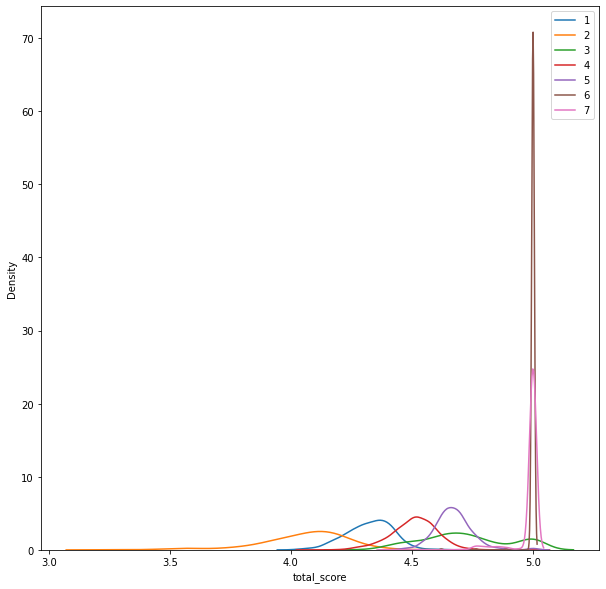

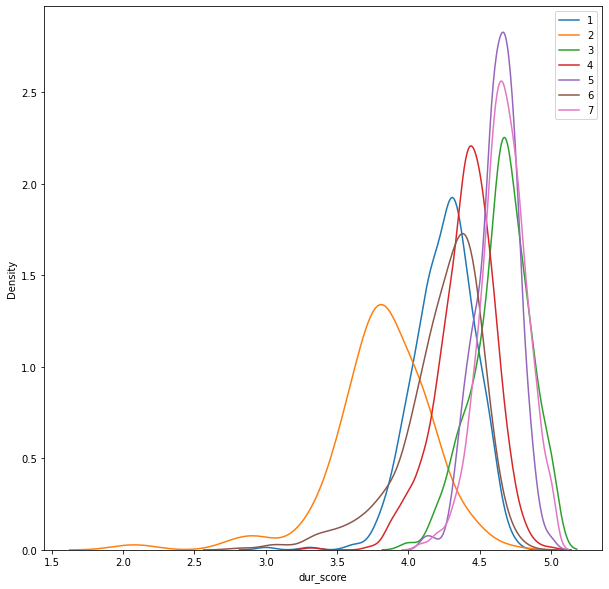

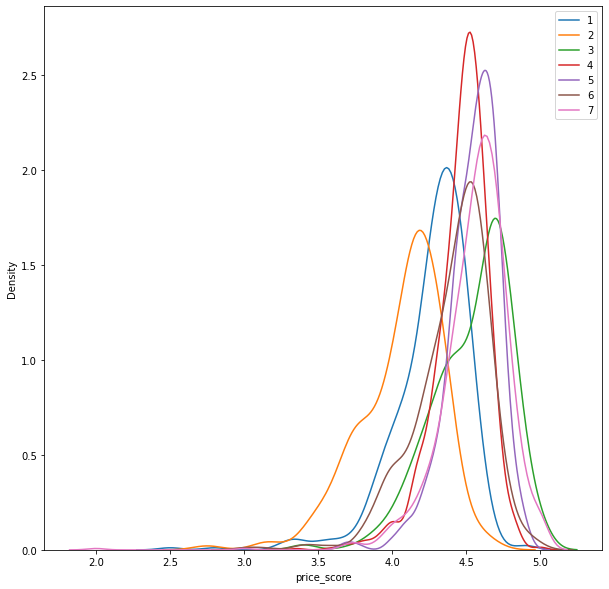

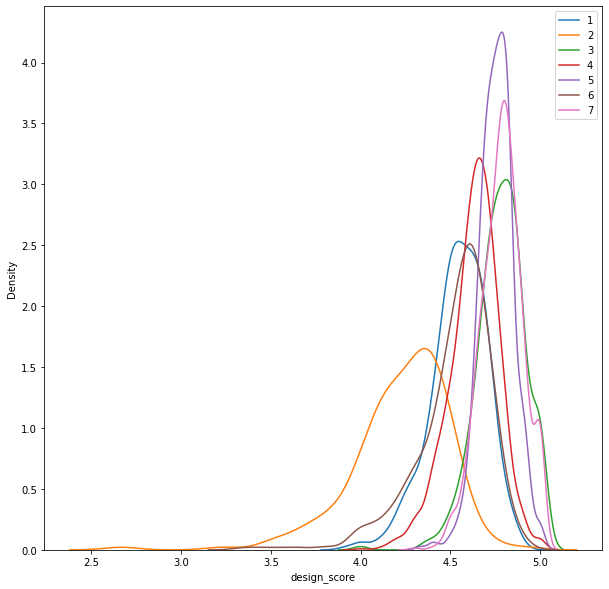

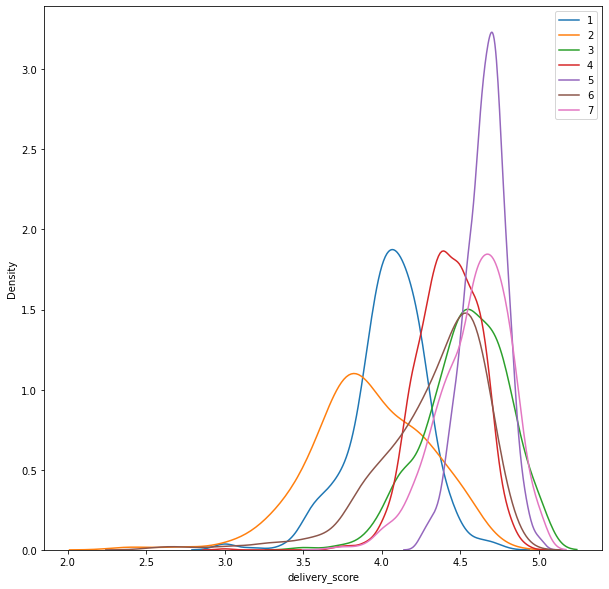

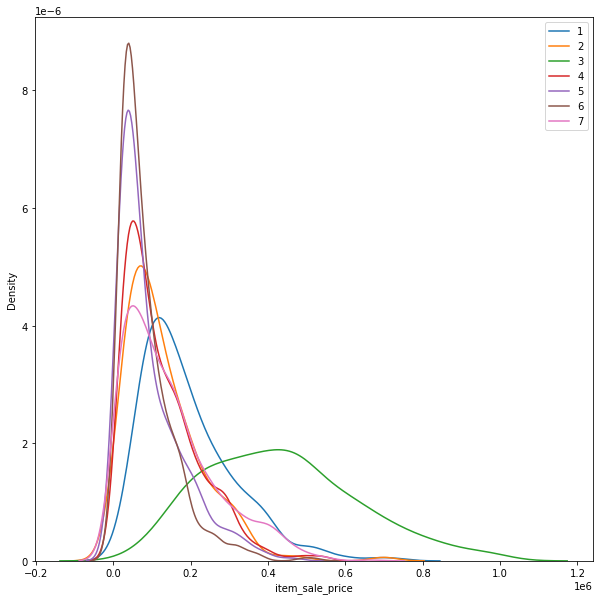

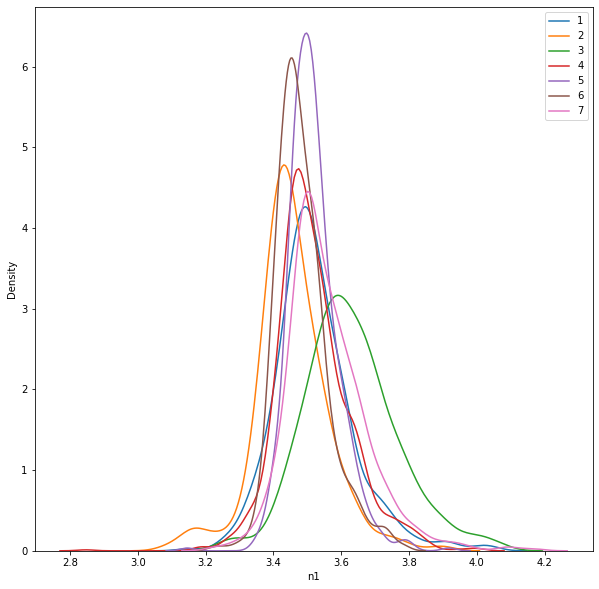

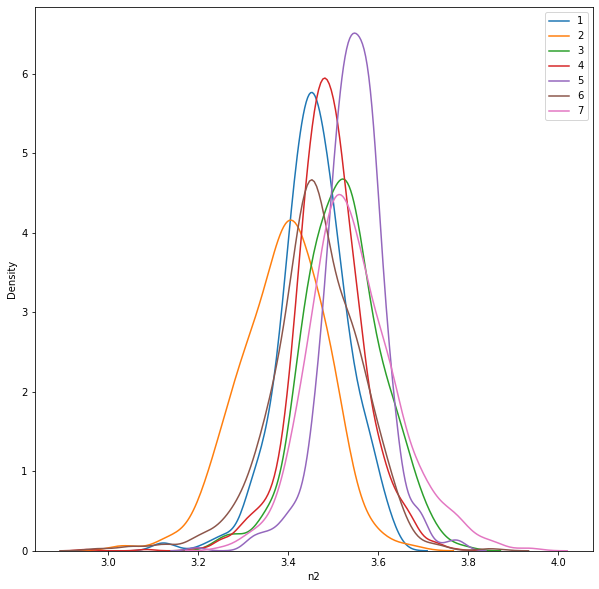

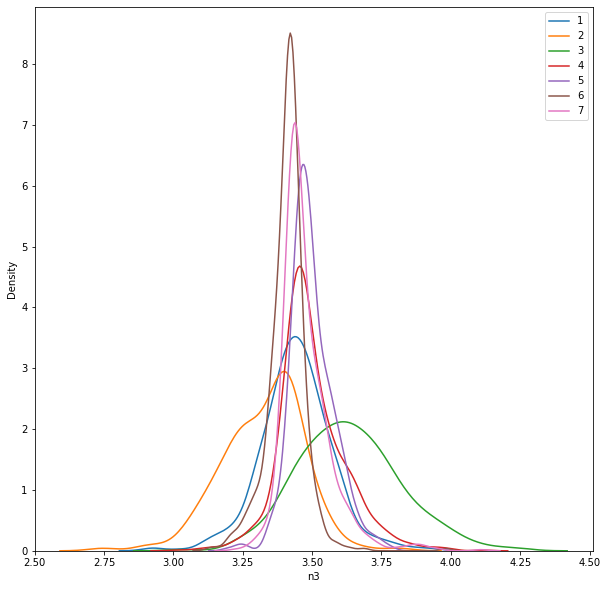

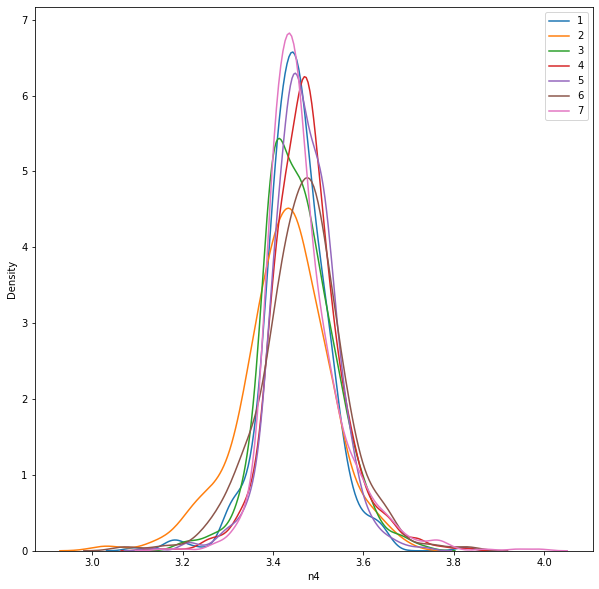

In [ ]:
for col in cl.columns[3:14]:
    plt.figure(figsize = (10, 10))
    for clus in cl["c7"].unique():
        sns.distplot(cl.query("c7 == @clus")[col], hist = False, label = clus)
    plt.legend()
    plt.show()

## 8 Clusters

In [ ]:
for c in cl["c8"].unique():
    print(c, "th cluster")
    df = cl.query("c8 == @c").reset_index(drop = True)
    display(df)
    print(df["item_category1"].value_counts())
    print(df["item_brand"].value_counts())
    print("")

1 th cluster


item_name item_category1  ... c9  c10
0                              BERGEN 데이베드 침대             침대  ...  1    1
1                            ISABELLA 데이베드 침대             침대  ...  1    1
2               (리뷰이벤트) 바오 틈새수납장 스탠딩 화장대(콘센트)         화장대/콘솔  ...  1    1
3    (리뷰이벤트) 하이 LED조명 통서랍 수납침대 프레임 SS/Q (콘센트)             침대  ...  1    1
4             1+1 폴리 바체어 홈바의자 3colors (절삭서비스)             의자  ...  1    1
..                                        ...            ...  ... ..  ...
469                        헤이미쉬 리빙다이닝 1인 원목벤치             의자  ...  1    1
470                   헤이츠 모던 1200 렌지대 2colors         서랍/수납장  ...  1    1
471                            헤일리 라탄가구 케인수납장         서랍/수납장  ...  1    1
472                             헬리아 LED조명 화장대         화장대/콘솔  ...  1    1
473   힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)             침대  ...  1    1

[474 rows x 21 columns]

침대        184
서랍/수납장    156
화장대/콘솔     57
의자         44
소파         33
Name: item_category1, dtype: int64
잉글랜더        26
삼익가구        18
레이디가구       17
동서가구(dF)    16
동서가구        13
            ..
우디크          1
듀오백          1
아피나 모블러      1
아인스홈         1
번드           1
Name: item_brand, Length: 158, dtype: int64

2 th cluster


item_name item_category1  ... c9  c10
0                      CHAMBER 벙커침대 3size             침대  ...  2    2
1                         MAKONIS 침대 SS/Q             침대  ...  2    2
2     MARINO 분리형 이층침대 트윈싱글 3colors 100200             침대  ...  2    2
3          VELLO 이층침대 싱글/더블 100200/140200             침대  ...  2    2
4           1+1 이튼 고무나무 원목 디자인 의자 2colors             의자  ...  2    2
..                                    ...            ...  ... ..  ...
187           플로어 LED 저상형침대 2colors(매트포함)             침대  ...  2    2
188            피크체어 원목 인조가죽 화장대의자 3colors             의자  ...  2    2
189          핀 원목침대 매트포함 (슈퍼싱글/퀸) 4colors             침대  ...  2    2
190               해리 고무나무 원목 광폭 수납 5단 서랍장         서랍/수납장  ...  2    2
191        핸디 베이직 3단 서랍형 수납침대 프레임 2colors             침대  ...  2    2

[192 rows x 21 columns]

침대        72
서랍/수납장    46
의자        45
화장대/콘솔    17
소파        12
Name: item_category1, dtype: int64
마켓비         19
리샘          12
레이디가구        9
블루밍홈         8
동서가구(dF)     7
            ..
마티노가구        1
베드리움         1
지니앤퍼니        1
서광퍼니처        1
일루일루         1
Name: item_brand, Length: 83, dtype: int64

3 th cluster


item_name item_category1  ... c9  c10
0                   MILKAM 콘솔수납장 17585 CHM85175         서랍/수납장  ...  3    3
1                   6인 콘센트형 다이닝테이블 의자세트 2colors         테이블/책상  ...  3    3
2              ADEL 철제침대 매트리스 프레임 2colors(SS/Q)             침대  ...  9   10
3                Acne 침대 매트리스 프레임 3colors(SS/Q)             침대  ...  9   10
4                           Asusa 원목 콘솔화장대 거울포함         화장대/콘솔  ...  9   10
..                                          ...            ...  ... ..  ...
346                     헤이즐 무헤드 평상형 퀸 침대 프레임(Q)             침대  ...  9   10
347        헤이즐 침대(Q,K,KK 공용)(매트리스 미포함)(조명형,평상형)             침대  ...  3    3
348  헨트데이베드 고무나무 3인 패브릭 소파베드/원목소파 2type 6colors             소파  ...  3    3
349           확장형 세라믹 인출식 식탁 1600~2300 (2color)         테이블/책상  ...  3    3
350         히노 편백 원목 LED헤드 멀티수납형 침대 SS/Q (매트제외)             침대  ...  9   10

[351 rows x 21 columns]

침대        234
테이블/책상     59
서랍/수납장     24
화장대/콘솔     21
소파          8
의자          5
Name: item_category1, dtype: int64
한샘        22
리바트       21
삼익가구      21
에몬스       10
일룸        10
          ..
엘라비아       1
버즈가구       1
가구앤하우스     1
리센트        1
세진침대       1
Name: item_brand, Length: 124, dtype: int64

4 th cluster


item_name item_category1  ... c9  c10
0                                  RELLY 침대 시리즈             침대  ...  4    4
1                          (1+1) 내츄럴모노 윈저 의자 세트             의자  ...  4    4
2                 (국내생산) 학생/사무용 책상 의자 S10 (헤드형)             의자  ...  4    4
3    (당일발송) 라인 원형 벨벳 수납 스툴 의자 2colors (+사은품 증정)             의자  ...  4    4
4               (리뷰이벤트) 그루브 LED조명 수납침대 프레임 SS/Q             침대  ...  4    4
..                                          ...            ...  ... ..  ...
886                       화이트우드 3단 전자렌지대 / 3단선반         서랍/수납장  ...  4    4
887                       화이트우드 4단 전자렌지대 / 4단선반         서랍/수납장  ...  4    4
888                    휴 조이 좌식 리클라이너 의자 2colors             의자  ...  4    4
889                                    히포 원목 체어             의자  ...  4    4
890                        힙스터 수납형 드럼스툴 8colors             의자  ...  4    4

[891 rows x 21 columns]

의자        352
서랍/수납장    270
침대        113
화장대/콘솔    100
소파         56
Name: item_category1, dtype: int64
마켓비       74
블루밍홈      36
두닷모노      21
가구느낌      18
베스트리빙     17
          ..
에인하우스      1
에이픽스       1
미즌하임       1
체인지하우스     1
이데컴퍼니      1
Name: item_brand, Length: 265, dtype: int64

5 th cluster


item_name item_category1  ... c9  c10
0              (국내생산) 학생/사무용 책상 의자 S10 (기본형)             의자  ...  5    5
1            (국내생산) 학생/사무용 책상 의자 STC10 (기본형)             의자  ...  5    5
2            (국내생산) 학생/사무용 책상 의자 STC18 (기본형)             의자  ...  5    5
3    (당일발송) 원형 벨벳 수납 스툴 의자 4colors (+사은품 증정)             의자  ...  5    5
4                (당일발송) 카페 인테리어 식탁 의자 4color             의자  ...  5    5
..                                       ...            ...  ... ..  ...
554                           협탁겸 원목스툴 2종 택1             의자  ...  5    5
555                 호라이즌 싱글 슈퍼싱글 철제침대 (S/SS)             침대  ...  5    5
556         호텔패브릭원단 SILLY 좌식의자 4colors(당일발송)             의자  ...  5    5
557              화이트 폭좁은 슬림 5단 서랍장 500 (화이트)         서랍/수납장  ...  5    5
558                             휘게체어 5colors             의자  ...  5    5

[559 rows x 21 columns]

의자        328
서랍/수납장    123
침대         47
화장대/콘솔     33
소파         22
테이블/책상      6
Name: item_category1, dtype: int64
이케아         20
블루밍홈        16
에코상사        15
한샘          15
리바트         14
            ..
사이즈오브        1
리빙디자인연구소     1
트리니퍼니처       1
골든스트릿        1
가구로드         1
Name: item_brand, Length: 219, dtype: int64

6 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0               (당일발송) 가로 높이조절 사이드테이블         테이블/책상         키모  ...   6   6    6
1                   (당일발송) 다용도 좌식 테이블         테이블/책상         키모  ...   6   6    6
2    (당일발송) 다용도 카페 식탁 테이블 800 2colors         테이블/책상         키모  ...   6   6    6
3              (당일발송) 스틸 책상 겸 테이블 800         테이블/책상         키모  ...   6   6    6
4                 (당일발송) 스틸 테이블 2size         테이블/책상         키모  ...   6   6    6
..                                ...            ...        ...  ...  ..  ..  ...
536                   화이트 마틴 H형 좌식 책상         테이블/책상       일루일루  ...   6   6    6
537              화이트 마틴 기본형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
538             화이트 마틴 스퀘어형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
539       화이트식탁 800 원목 원형 테이블 GLS165C         테이블/책상        나무뜰  ...   6   6    6
540                    히토 대리석 사이드 테이블         테이블/책상      플레르가구  ...   6   6    6

[541 rows x 21 columns]

테이블/책상    538
침대          3
Name: item_category1, dtype: int64
블루밍홈       35
앳홈         21
베스트리빙      19
마켓비        17
프리메이드      16
           ..
아이데뉴        1
심포니디자인      1
라이크하우스      1
장인가구        1
아이리스코리아     1
Name: item_brand, Length: 170, dtype: int64

7 th cluster


item_name item_category1  ... c9  c10
0                         (당일발송) 스틸 좌식 데스크 확장형         테이블/책상  ...  7    7
1                       (본사직영) 앤디 거실테이블 6types         테이블/책상  ...  7    9
2                1+1 CH9930 루체 카페 식탁의자 6colors             의자  ...  7    7
3              1+1 더쉼 포켓스프링 리클라이너 좌식의자 2colors             소파  ...  7    7
4           1+1 폴리 쿠션 바체어 홈바의자 3colors (절삭서비스)             의자  ...  7    7
..                                         ...            ...  ... ..  ...
904  화이트 타원 좌식 소파 접이식 화이트 다리 거실 테이블 1200 x 600         테이블/책상  ...  7    7
905         화이트 호마이카 HPL HPM 라미네이트 라운드 2인 원목식탁         테이블/책상  ...  7    7
906               화이트식탁 1000 원목 원형 테이블 GLS166C         테이블/책상  ...  7    7
907                           확장형 티테이블 2colors         테이블/책상  ...  7    7
908                                  히알린 좌식테이블         테이블/책상  ...  7    7

[909 rows x 21 columns]

테이블/책상    824
의자         35
침대         28
화장대/콘솔      9
서랍/수납장      9
소파          4
Name: item_category1, dtype: int64
오홀리브      53
소프시스      21
로포텐       21
보니애가구     19
한샘        18
          ..
상일리베가구     1
잉글랜더       1
일루일루       1
마티노가구      1
참갤러리       1
Name: item_brand, Length: 261, dtype: int64

8 th cluster


item_name item_category1  ... c9  c10
0    (리뷰이벤트) 밀리 LED조명 확장형 화장대포함 수납침대 프레임 SS/Q             침대  ...  8    8
1          (리뷰이벤트) 플랫 무헤드 3단 수납침대 (매트포함) SS/Q             침대  ...  8    8
2                  (사은품증정) 튜브 철제 벙커침대 3colors             침대  ...  8    8
3                      1+1 하프 원목 식탁의자 2colors             의자  ...  8    8
4                3017 브로몰딩 접이식 의자 1+1 3colors             의자  ...  8    8
..                                        ...            ...  ... ..  ...
438          헤일리 LED 조명 3단 수납침대 프레임 SS (매트제외)             침대  ...  8    8
439   호텔 메리미 LED 수납 침대 SS/Q/K세트(매트선택) 3colors             침대  ...  8    8
440            호텔방수원단 접이식 NIS 2인 소파베드 3colors             소파  ...  8    8
441            호텔방수원단 접이식 NIS 3인 소파베드 3colors             소파  ...  8    8
442            휴 LED 3서랍수납형 침대(매트 미포함) SS/Q/K             침대  ...  8    8

[443 rows x 21 columns]

침대        308
서랍/수납장     49
소파         41
화장대/콘솔     23
의자         21
테이블/책상      1
Name: item_category1, dtype: int64
삼익가구      24
에보니아      16
잉글랜더      15
레이디가구     14
딜라이트      13
          ..
썸앤데코       1
오키멧        1
지엠퍼니처      1
글로리가구      1
아이디얼리빙     1
Name: item_brand, Length: 153, dtype: int64



item_count


<Figure size 864x864 with 0 Axes>

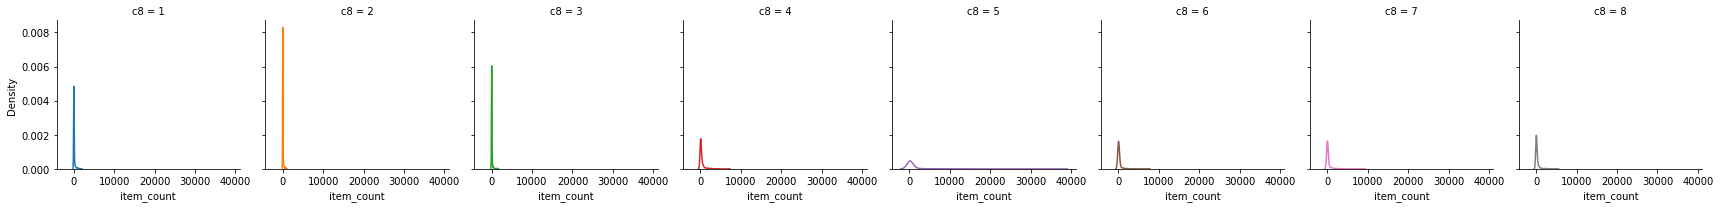

total_score


<Figure size 864x864 with 0 Axes>

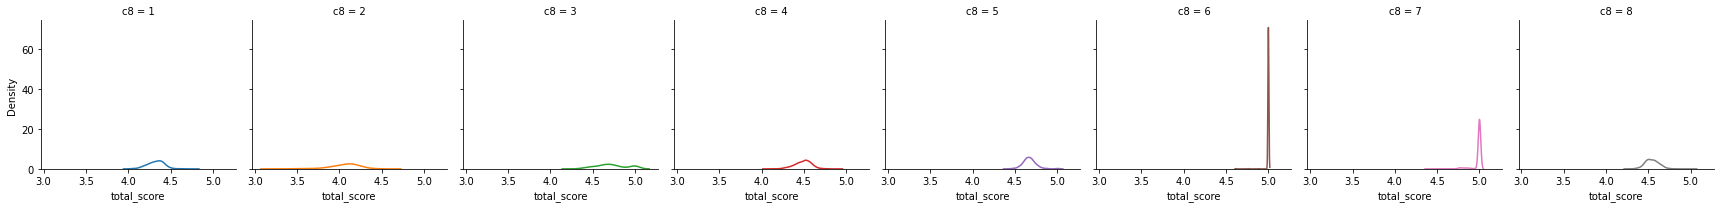

dur_score


<Figure size 864x864 with 0 Axes>

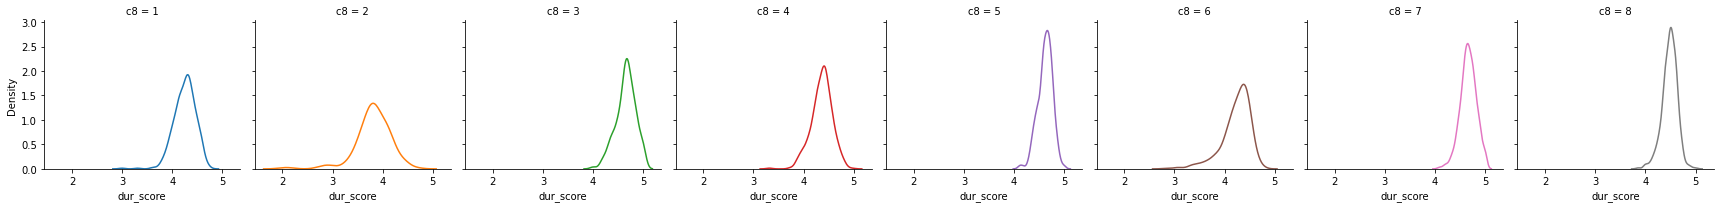

price_score


<Figure size 864x864 with 0 Axes>

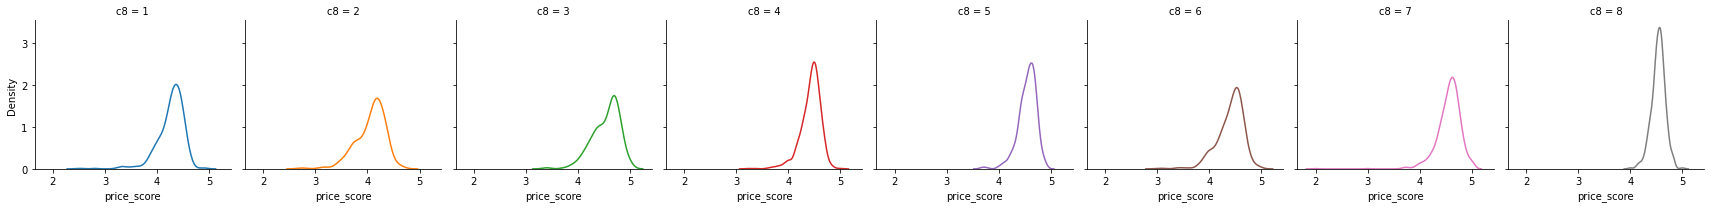

design_score


<Figure size 864x864 with 0 Axes>

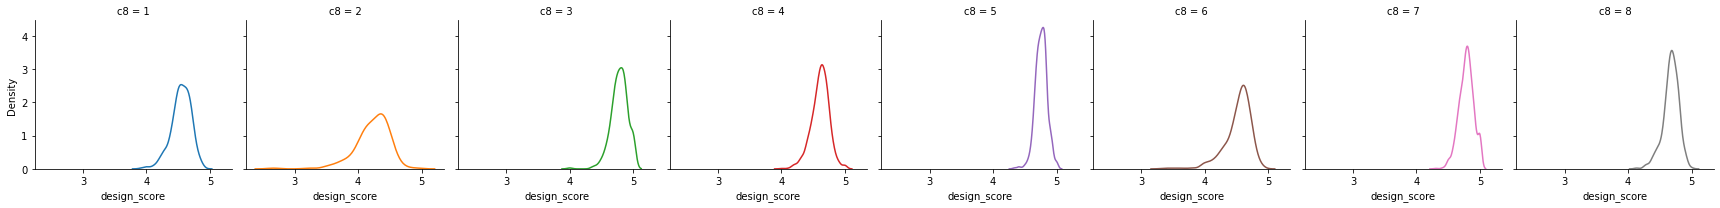

delivery_score


<Figure size 864x864 with 0 Axes>

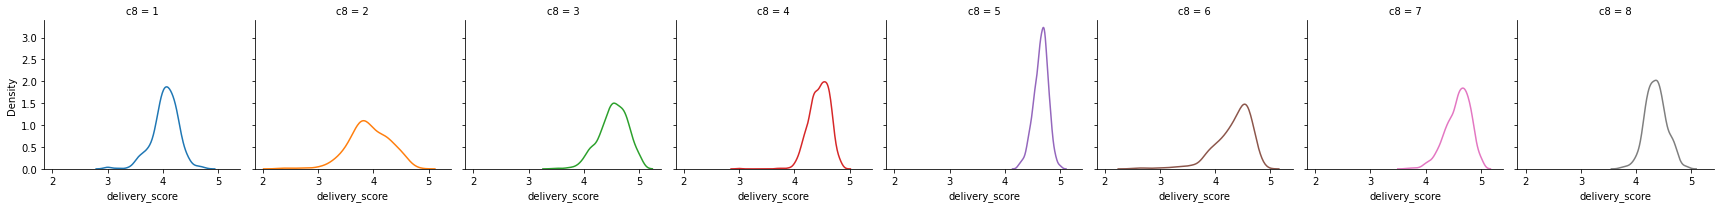

item_sale_price


<Figure size 864x864 with 0 Axes>

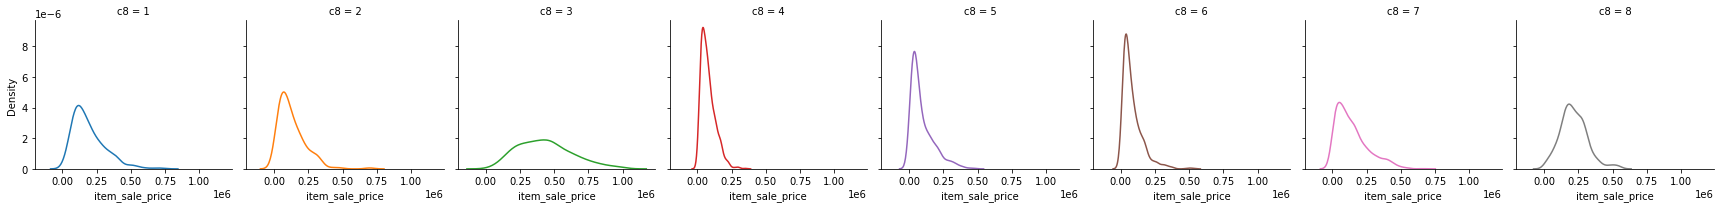

n1


<Figure size 864x864 with 0 Axes>

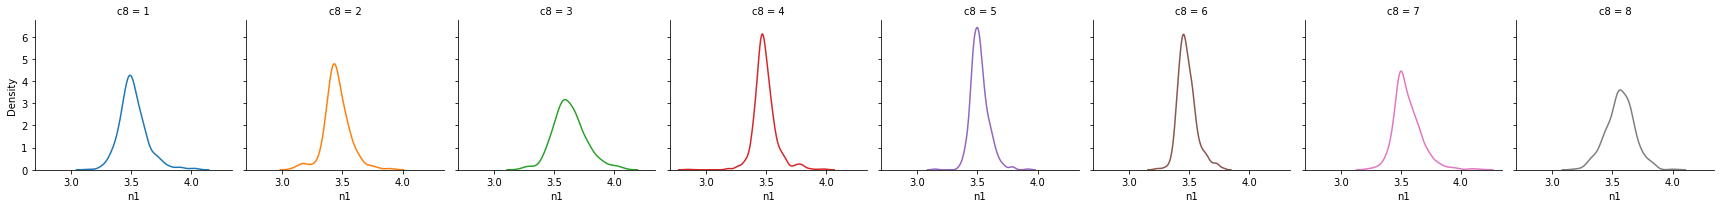

n2


<Figure size 864x864 with 0 Axes>

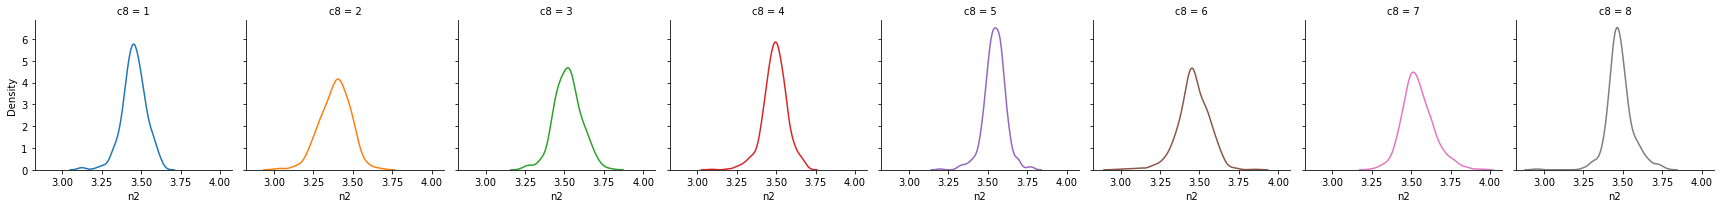

n3


<Figure size 864x864 with 0 Axes>

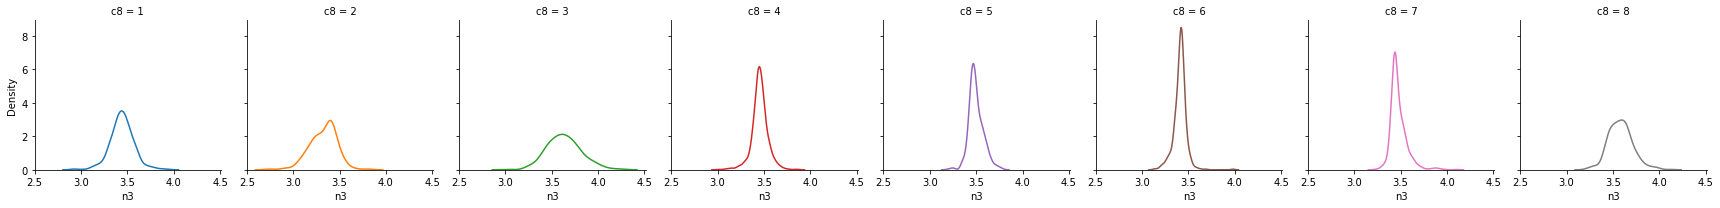

n4


<Figure size 864x864 with 0 Axes>

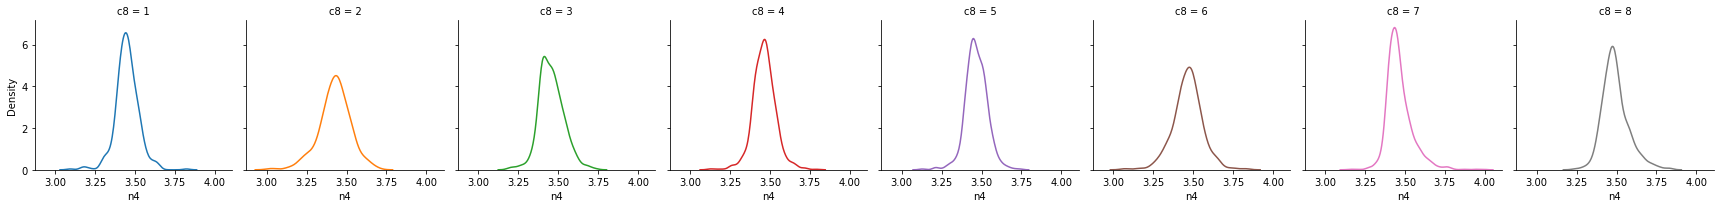

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for col in cl.columns[3:14]:
    plt.figure(figsize = (12, 12))
    print(col)
    grid = sns.FacetGrid(data = cl, col = "c8", hue = "c8")
    grid.map(sns.distplot, col, hist = False)
    plt.show()

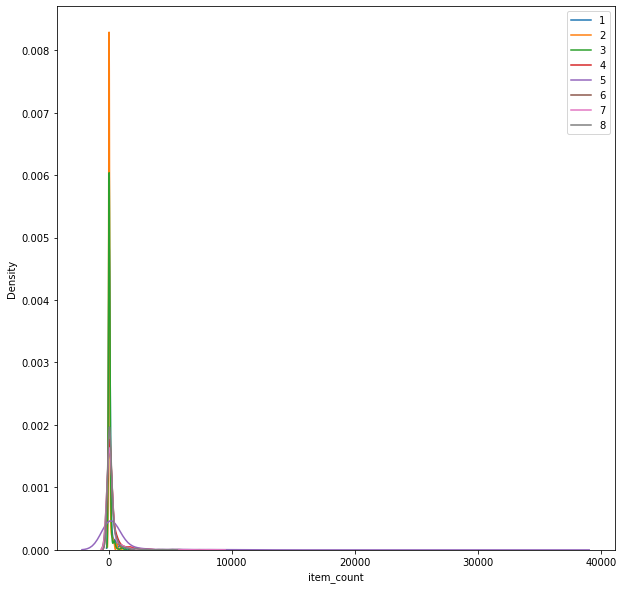

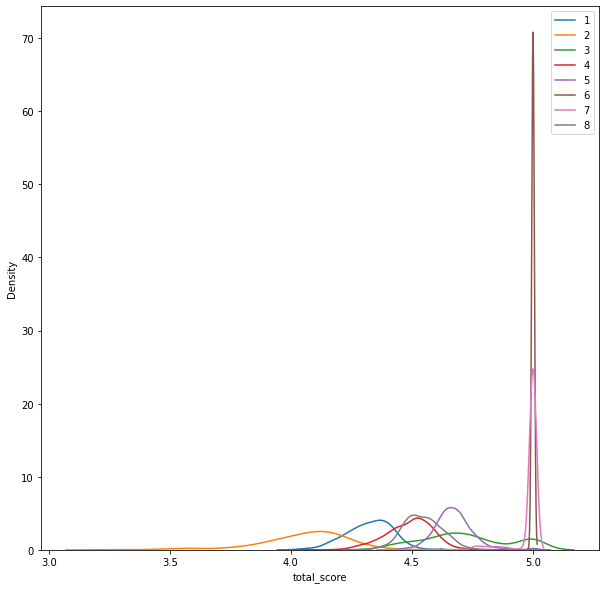

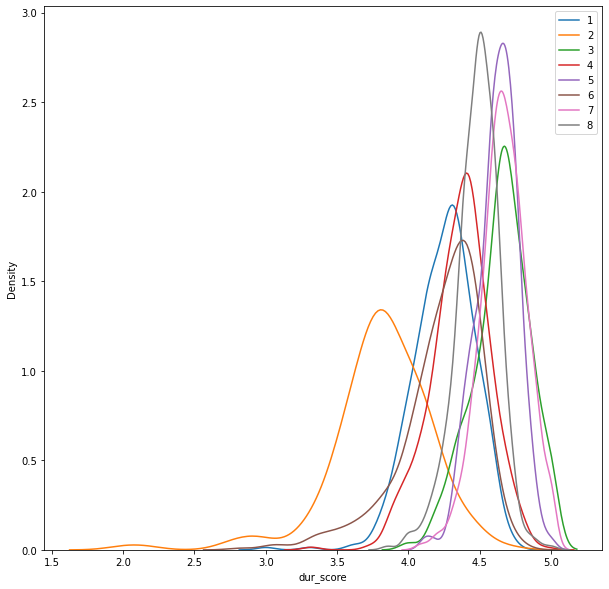

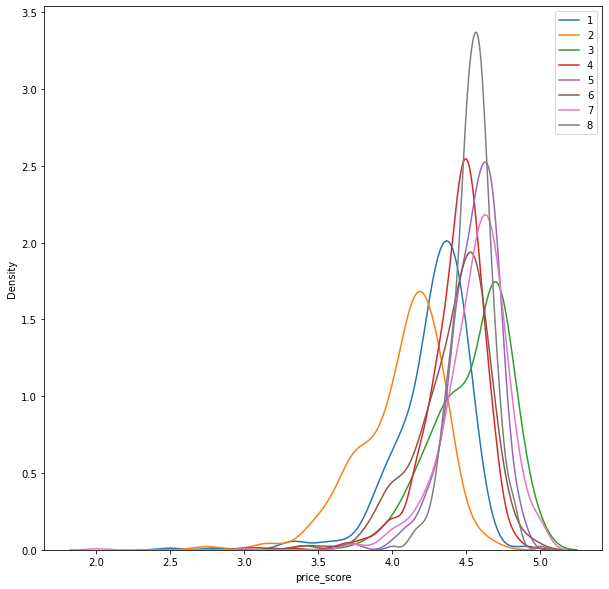

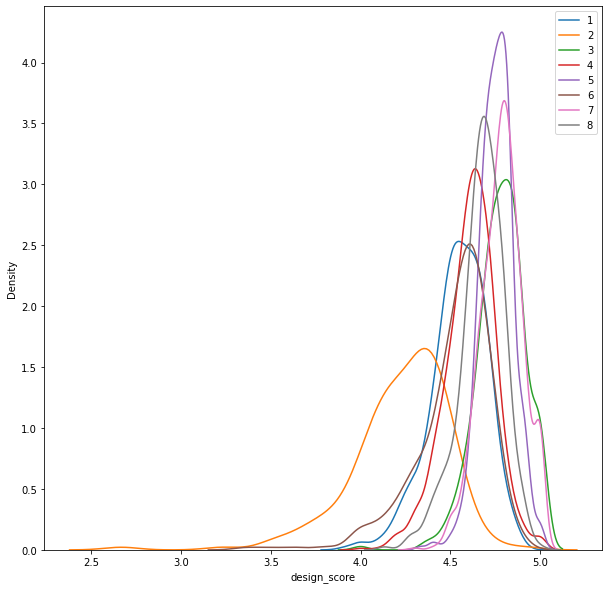

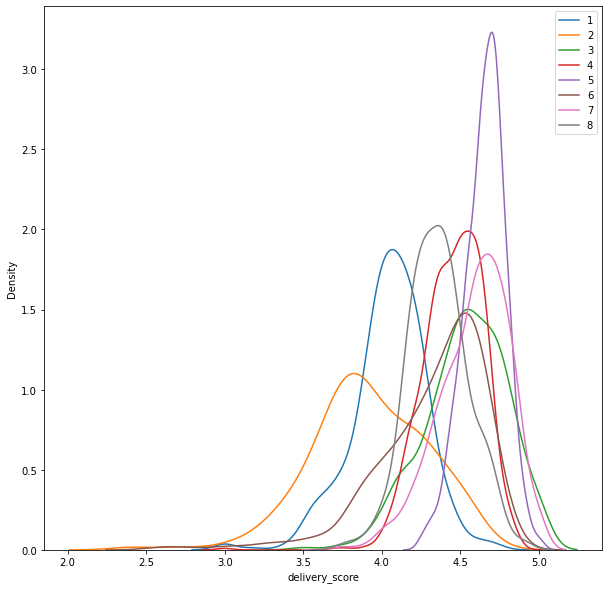

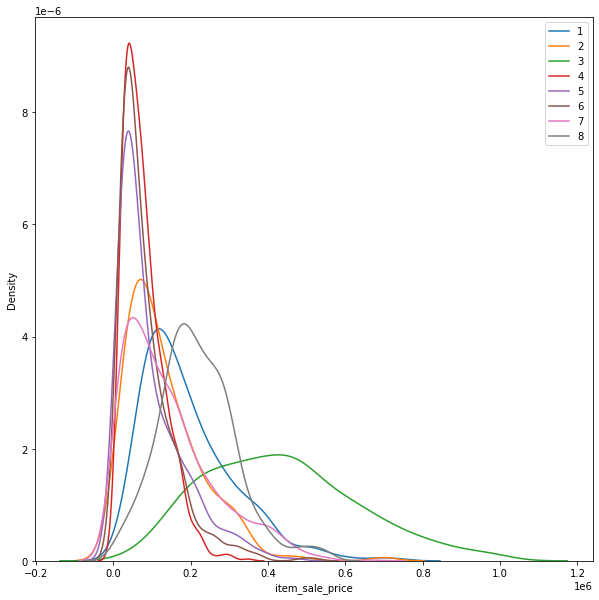

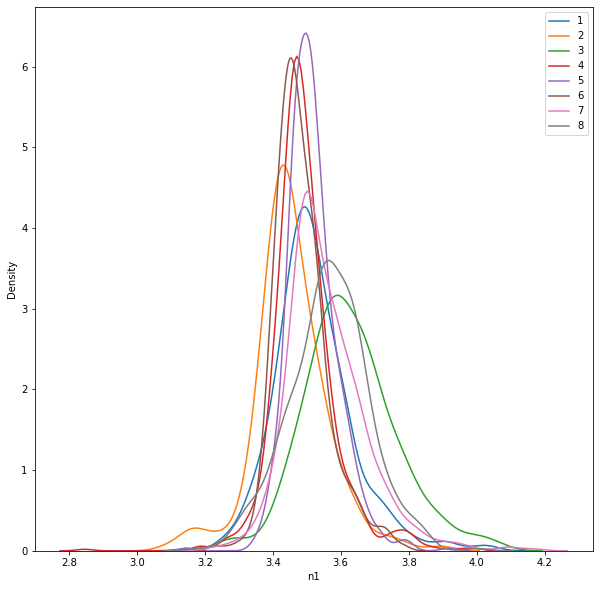

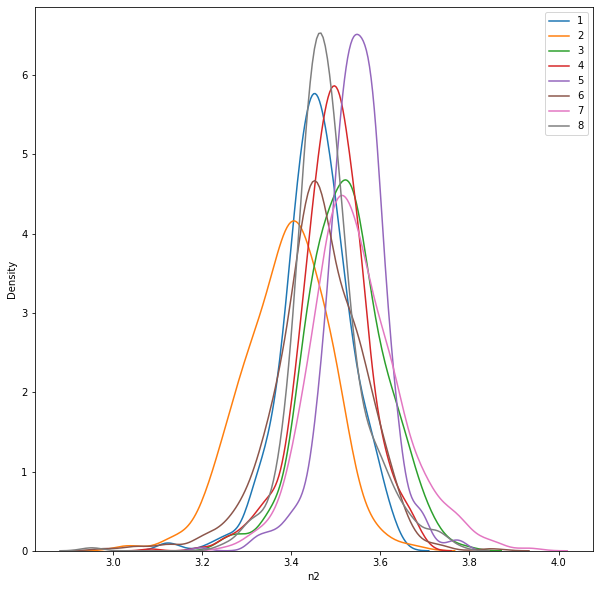

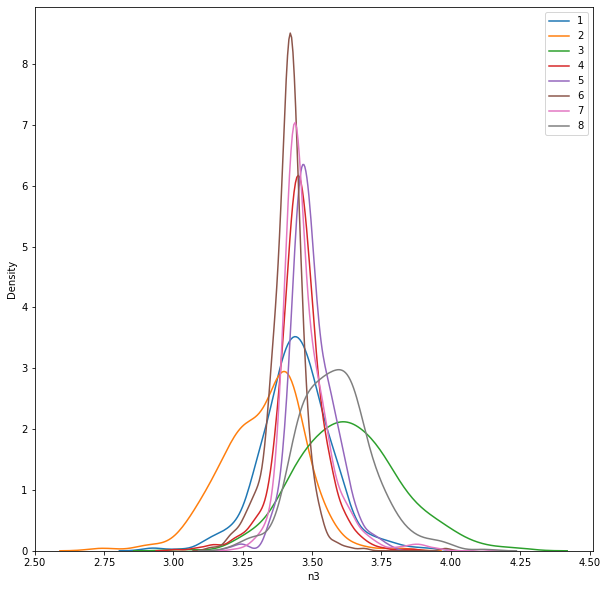

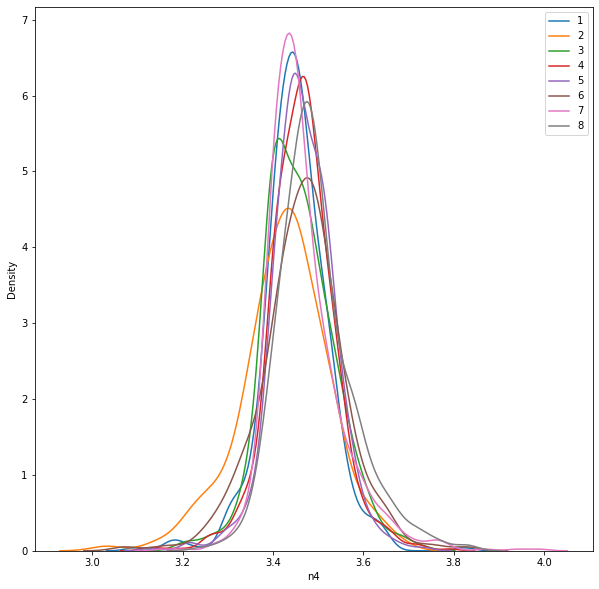

In [ ]:
for col in cl.columns[3:14]:
    plt.figure(figsize = (10, 10))
    for clus in cl["c8"].unique():
        sns.distplot(cl.query("c8 == @clus")[col], hist = False, label = clus)
    plt.legend()
    plt.show()

## 9 Clusters

In [ ]:
for c in cl["c9"].unique():
    print(c, "th cluster")
    df = cl.query("c9 == @c").reset_index(drop = True)
    display(df)
    print(df["item_category1"].value_counts())
    print(df["item_brand"].value_counts())
    print("")

1 th cluster


item_name item_category1  ... c9  c10
0                              BERGEN 데이베드 침대             침대  ...  1    1
1                            ISABELLA 데이베드 침대             침대  ...  1    1
2               (리뷰이벤트) 바오 틈새수납장 스탠딩 화장대(콘센트)         화장대/콘솔  ...  1    1
3    (리뷰이벤트) 하이 LED조명 통서랍 수납침대 프레임 SS/Q (콘센트)             침대  ...  1    1
4             1+1 폴리 바체어 홈바의자 3colors (절삭서비스)             의자  ...  1    1
..                                        ...            ...  ... ..  ...
469                        헤이미쉬 리빙다이닝 1인 원목벤치             의자  ...  1    1
470                   헤이츠 모던 1200 렌지대 2colors         서랍/수납장  ...  1    1
471                            헤일리 라탄가구 케인수납장         서랍/수납장  ...  1    1
472                             헬리아 LED조명 화장대         화장대/콘솔  ...  1    1
473   힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)             침대  ...  1    1

[474 rows x 21 columns]

침대        184
서랍/수납장    156
화장대/콘솔     57
의자         44
소파         33
Name: item_category1, dtype: int64
잉글랜더        26
삼익가구        18
레이디가구       17
동서가구(dF)    16
동서가구        13
            ..
우디크          1
듀오백          1
아피나 모블러      1
아인스홈         1
번드           1
Name: item_brand, Length: 158, dtype: int64

2 th cluster


item_name item_category1  ... c9  c10
0                      CHAMBER 벙커침대 3size             침대  ...  2    2
1                         MAKONIS 침대 SS/Q             침대  ...  2    2
2     MARINO 분리형 이층침대 트윈싱글 3colors 100200             침대  ...  2    2
3          VELLO 이층침대 싱글/더블 100200/140200             침대  ...  2    2
4           1+1 이튼 고무나무 원목 디자인 의자 2colors             의자  ...  2    2
..                                    ...            ...  ... ..  ...
187           플로어 LED 저상형침대 2colors(매트포함)             침대  ...  2    2
188            피크체어 원목 인조가죽 화장대의자 3colors             의자  ...  2    2
189          핀 원목침대 매트포함 (슈퍼싱글/퀸) 4colors             침대  ...  2    2
190               해리 고무나무 원목 광폭 수납 5단 서랍장         서랍/수납장  ...  2    2
191        핸디 베이직 3단 서랍형 수납침대 프레임 2colors             침대  ...  2    2

[192 rows x 21 columns]

침대        72
서랍/수납장    46
의자        45
화장대/콘솔    17
소파        12
Name: item_category1, dtype: int64
마켓비         19
리샘          12
레이디가구        9
블루밍홈         8
동서가구(dF)     7
            ..
마티노가구        1
베드리움         1
지니앤퍼니        1
서광퍼니처        1
일루일루         1
Name: item_brand, Length: 83, dtype: int64

3 th cluster


item_name item_category1  ... c9  c10
0                   MILKAM 콘솔수납장 17585 CHM85175         서랍/수납장  ...  3    3
1                   6인 콘센트형 다이닝테이블 의자세트 2colors         테이블/책상  ...  3    3
2                     BMA 1139-E CA등급 / DD (더블)             침대  ...  3    3
3                   BMA 1139-E CA등급/SS(슈퍼싱글사이즈)             침대  ...  3    3
4          C4. 올리버 스미스 유로탑 일체형 단면매트리스_그레이(적당푹신)             침대  ...  3    3
..                                          ...            ...  ... ..  ...
150                       헤이미쉬 리빙다이닝 4인 원목 식탁세트         테이블/책상  ...  3    3
151                   헤이미쉬 리빙다이닝 4인 코너형 테이블쇼파세트         테이블/책상  ...  3    3
152        헤이즐 침대(Q,K,KK 공용)(매트리스 미포함)(조명형,평상형)             침대  ...  3    3
153  헨트데이베드 고무나무 3인 패브릭 소파베드/원목소파 2type 6colors             소파  ...  3    3
154           확장형 세라믹 인출식 식탁 1600~2300 (2color)         테이블/책상  ...  3    3

[155 rows x 21 columns]

침대        93
테이블/책상    33
서랍/수납장    14
화장대/콘솔     9
소파         5
의자         1
Name: item_category1, dtype: int64
삼익가구     11
리바트       9
에몬스       9
일룸        7
레이디가구     6
         ..
쉐우드가구     1
핀란디아      1
세진침대      1
까르엠가구     1
데스커       1
Name: item_brand, Length: 70, dtype: int64

4 th cluster


item_name item_category1  ... c9  c10
0                                  RELLY 침대 시리즈             침대  ...  4    4
1                          (1+1) 내츄럴모노 윈저 의자 세트             의자  ...  4    4
2                 (국내생산) 학생/사무용 책상 의자 S10 (헤드형)             의자  ...  4    4
3    (당일발송) 라인 원형 벨벳 수납 스툴 의자 2colors (+사은품 증정)             의자  ...  4    4
4               (리뷰이벤트) 그루브 LED조명 수납침대 프레임 SS/Q             침대  ...  4    4
..                                          ...            ...  ... ..  ...
886                       화이트우드 3단 전자렌지대 / 3단선반         서랍/수납장  ...  4    4
887                       화이트우드 4단 전자렌지대 / 4단선반         서랍/수납장  ...  4    4
888                    휴 조이 좌식 리클라이너 의자 2colors             의자  ...  4    4
889                                    히포 원목 체어             의자  ...  4    4
890                        힙스터 수납형 드럼스툴 8colors             의자  ...  4    4

[891 rows x 21 columns]

의자        352
서랍/수납장    270
침대        113
화장대/콘솔    100
소파         56
Name: item_category1, dtype: int64
마켓비       74
블루밍홈      36
두닷모노      21
가구느낌      18
베스트리빙     17
          ..
에인하우스      1
에이픽스       1
미즌하임       1
체인지하우스     1
이데컴퍼니      1
Name: item_brand, Length: 265, dtype: int64

5 th cluster


item_name item_category1  ... c9  c10
0              (국내생산) 학생/사무용 책상 의자 S10 (기본형)             의자  ...  5    5
1            (국내생산) 학생/사무용 책상 의자 STC10 (기본형)             의자  ...  5    5
2            (국내생산) 학생/사무용 책상 의자 STC18 (기본형)             의자  ...  5    5
3    (당일발송) 원형 벨벳 수납 스툴 의자 4colors (+사은품 증정)             의자  ...  5    5
4                (당일발송) 카페 인테리어 식탁 의자 4color             의자  ...  5    5
..                                       ...            ...  ... ..  ...
554                           협탁겸 원목스툴 2종 택1             의자  ...  5    5
555                 호라이즌 싱글 슈퍼싱글 철제침대 (S/SS)             침대  ...  5    5
556         호텔패브릭원단 SILLY 좌식의자 4colors(당일발송)             의자  ...  5    5
557              화이트 폭좁은 슬림 5단 서랍장 500 (화이트)         서랍/수납장  ...  5    5
558                             휘게체어 5colors             의자  ...  5    5

[559 rows x 21 columns]

의자        328
서랍/수납장    123
침대         47
화장대/콘솔     33
소파         22
테이블/책상      6
Name: item_category1, dtype: int64
이케아         20
블루밍홈        16
에코상사        15
한샘          15
리바트         14
            ..
사이즈오브        1
리빙디자인연구소     1
트리니퍼니처       1
골든스트릿        1
가구로드         1
Name: item_brand, Length: 219, dtype: int64

6 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0               (당일발송) 가로 높이조절 사이드테이블         테이블/책상         키모  ...   6   6    6
1                   (당일발송) 다용도 좌식 테이블         테이블/책상         키모  ...   6   6    6
2    (당일발송) 다용도 카페 식탁 테이블 800 2colors         테이블/책상         키모  ...   6   6    6
3              (당일발송) 스틸 책상 겸 테이블 800         테이블/책상         키모  ...   6   6    6
4                 (당일발송) 스틸 테이블 2size         테이블/책상         키모  ...   6   6    6
..                                ...            ...        ...  ...  ..  ..  ...
536                   화이트 마틴 H형 좌식 책상         테이블/책상       일루일루  ...   6   6    6
537              화이트 마틴 기본형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
538             화이트 마틴 스퀘어형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
539       화이트식탁 800 원목 원형 테이블 GLS165C         테이블/책상        나무뜰  ...   6   6    6
540                    히토 대리석 사이드 테이블         테이블/책상      플레르가구  ...   6   6    6

[541 rows x 21 columns]

테이블/책상    538
침대          3
Name: item_category1, dtype: int64
블루밍홈       35
앳홈         21
베스트리빙      19
마켓비        17
프리메이드      16
           ..
아이데뉴        1
심포니디자인      1
라이크하우스      1
장인가구        1
아이리스코리아     1
Name: item_brand, Length: 170, dtype: int64

7 th cluster


item_name item_category1  ... c9  c10
0                         (당일발송) 스틸 좌식 데스크 확장형         테이블/책상  ...  7    7
1                       (본사직영) 앤디 거실테이블 6types         테이블/책상  ...  7    9
2                1+1 CH9930 루체 카페 식탁의자 6colors             의자  ...  7    7
3              1+1 더쉼 포켓스프링 리클라이너 좌식의자 2colors             소파  ...  7    7
4           1+1 폴리 쿠션 바체어 홈바의자 3colors (절삭서비스)             의자  ...  7    7
..                                         ...            ...  ... ..  ...
904  화이트 타원 좌식 소파 접이식 화이트 다리 거실 테이블 1200 x 600         테이블/책상  ...  7    7
905         화이트 호마이카 HPL HPM 라미네이트 라운드 2인 원목식탁         테이블/책상  ...  7    7
906               화이트식탁 1000 원목 원형 테이블 GLS166C         테이블/책상  ...  7    7
907                           확장형 티테이블 2colors         테이블/책상  ...  7    7
908                                  히알린 좌식테이블         테이블/책상  ...  7    7

[909 rows x 21 columns]

테이블/책상    824
의자         35
침대         28
화장대/콘솔      9
서랍/수납장      9
소파          4
Name: item_category1, dtype: int64
오홀리브      53
소프시스      21
로포텐       21
보니애가구     19
한샘        18
          ..
상일리베가구     1
잉글랜더       1
일루일루       1
마티노가구      1
참갤러리       1
Name: item_brand, Length: 261, dtype: int64

8 th cluster


item_name item_category1  ... c9  c10
0    (리뷰이벤트) 밀리 LED조명 확장형 화장대포함 수납침대 프레임 SS/Q             침대  ...  8    8
1          (리뷰이벤트) 플랫 무헤드 3단 수납침대 (매트포함) SS/Q             침대  ...  8    8
2                  (사은품증정) 튜브 철제 벙커침대 3colors             침대  ...  8    8
3                      1+1 하프 원목 식탁의자 2colors             의자  ...  8    8
4                3017 브로몰딩 접이식 의자 1+1 3colors             의자  ...  8    8
..                                        ...            ...  ... ..  ...
438          헤일리 LED 조명 3단 수납침대 프레임 SS (매트제외)             침대  ...  8    8
439   호텔 메리미 LED 수납 침대 SS/Q/K세트(매트선택) 3colors             침대  ...  8    8
440            호텔방수원단 접이식 NIS 2인 소파베드 3colors             소파  ...  8    8
441            호텔방수원단 접이식 NIS 3인 소파베드 3colors             소파  ...  8    8
442            휴 LED 3서랍수납형 침대(매트 미포함) SS/Q/K             침대  ...  8    8

[443 rows x 21 columns]

침대        308
서랍/수납장     49
소파         41
화장대/콘솔     23
의자         21
테이블/책상      1
Name: item_category1, dtype: int64
삼익가구      24
에보니아      16
잉글랜더      15
레이디가구     14
딜라이트      13
          ..
썸앤데코       1
오키멧        1
지엠퍼니처      1
글로리가구      1
아이디얼리빙     1
Name: item_brand, Length: 153, dtype: int64

9 th cluster


item_name item_category1  ... c9  c10
0            ADEL 철제침대 매트리스 프레임 2colors(SS/Q)             침대  ...  9   10
1              Acne 침대 매트리스 프레임 3colors(SS/Q)             침대  ...  9   10
2                         Asusa 원목 콘솔화장대 거울포함         화장대/콘솔  ...  9   10
3                       DH 필로우탑 9존더블매트리스 SS/Q             침대  ...  9   10
4                         HD 205 황토볼 흙침대(S/Q)             침대  ...  9   10
..                                        ...            ...  ... ..  ...
191              헤니 헤드틸팅 가죽침대 Q (매트포함) 2color             침대  ...  9   10
192  헤리티지 리클라이너 저상형 패밀리침대 (매트포함) 3size/2color             침대  ...  9   10
193                헤이즐 무헤드 평상형 슈퍼킹 침대 프레임(KK)             침대  ...  9   10
194                   헤이즐 무헤드 평상형 퀸 침대 프레임(Q)             침대  ...  9   10
195       히노 편백 원목 LED헤드 멀티수납형 침대 SS/Q (매트제외)             침대  ...  9   10

[196 rows x 21 columns]

침대        141
테이블/책상     26
화장대/콘솔     12
서랍/수납장     10
의자          4
소파          3
Name: item_category1, dtype: int64
한샘       19
리바트      12
삼익가구     10
까르엠가구     8
로포텐       7
         ..
마티노가구     1
웰퍼니쳐      1
리센트       1
스스디       1
데스커       1
Name: item_brand, Length: 87, dtype: int64



item_count


<Figure size 864x864 with 0 Axes>

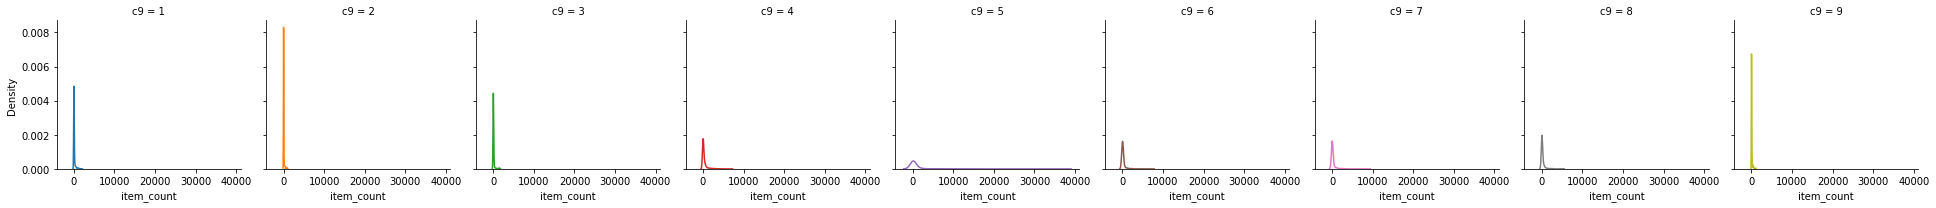

total_score


<Figure size 864x864 with 0 Axes>

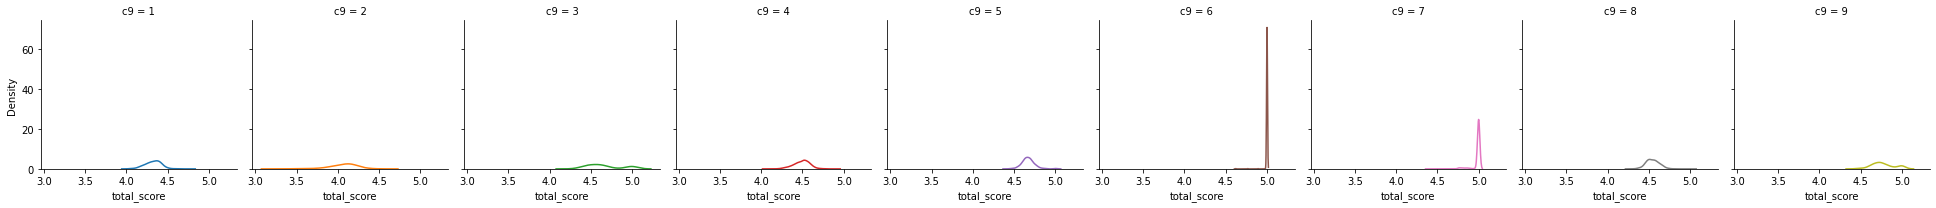

dur_score


<Figure size 864x864 with 0 Axes>

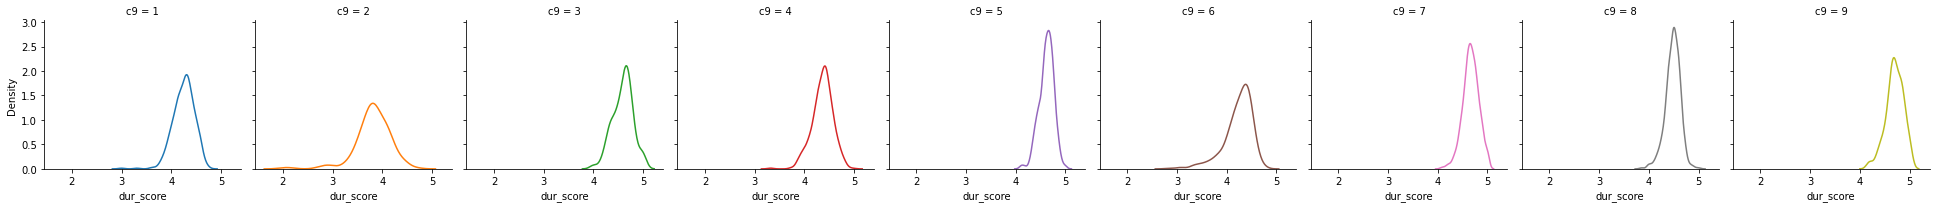

price_score


<Figure size 864x864 with 0 Axes>

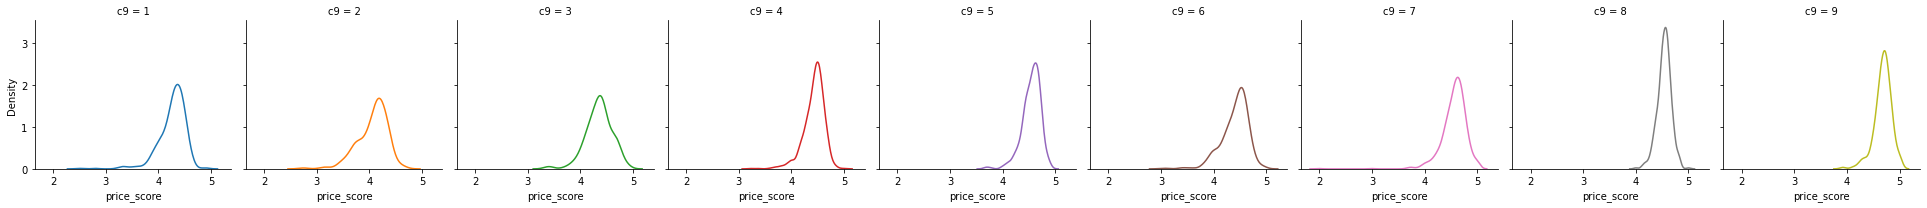

design_score


<Figure size 864x864 with 0 Axes>

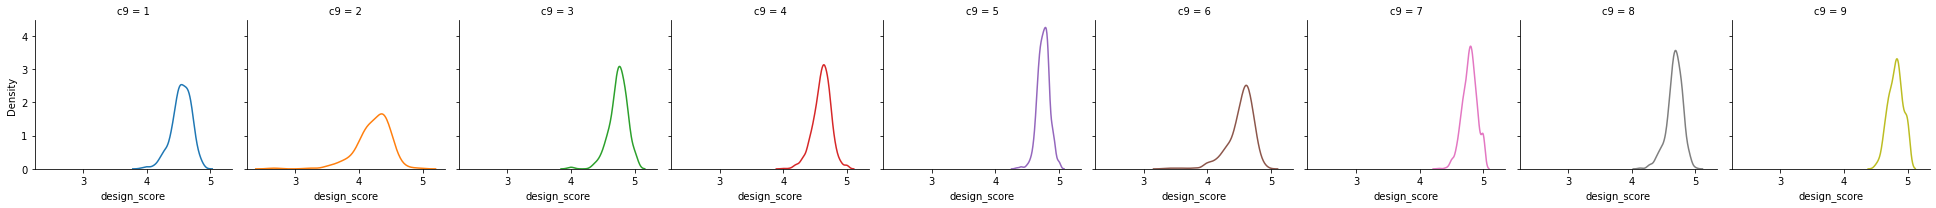

delivery_score


<Figure size 864x864 with 0 Axes>

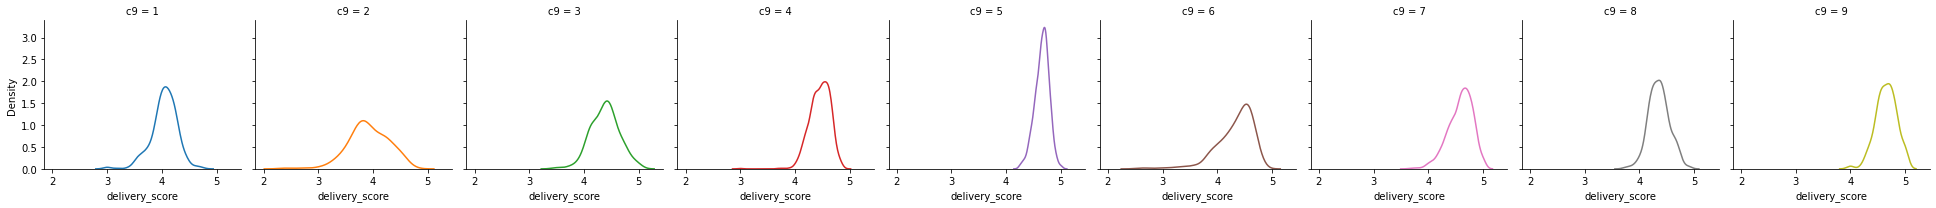

item_sale_price


<Figure size 864x864 with 0 Axes>

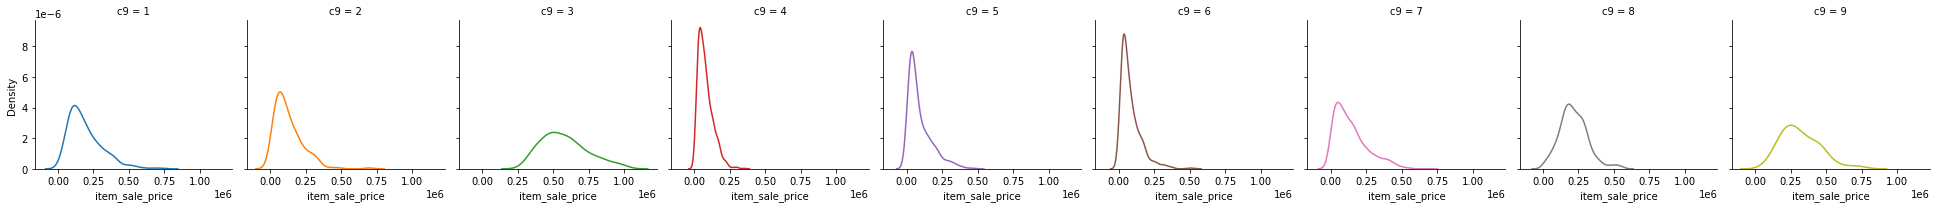

n1


<Figure size 864x864 with 0 Axes>

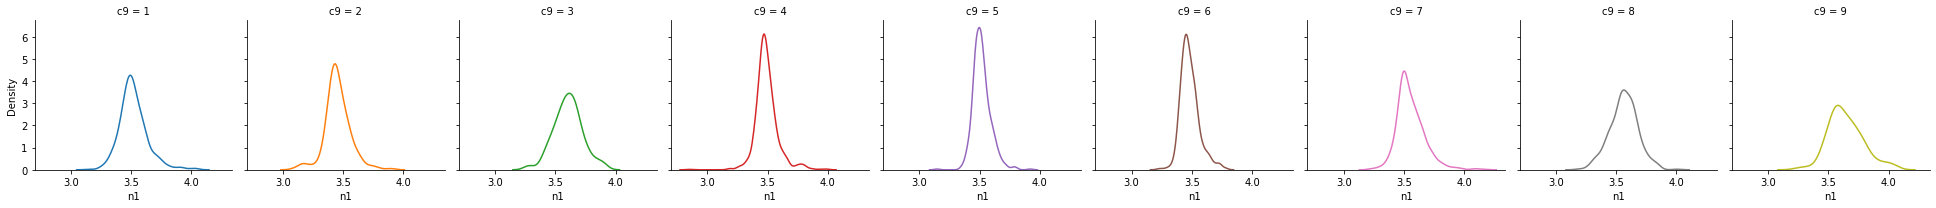

n2


<Figure size 864x864 with 0 Axes>

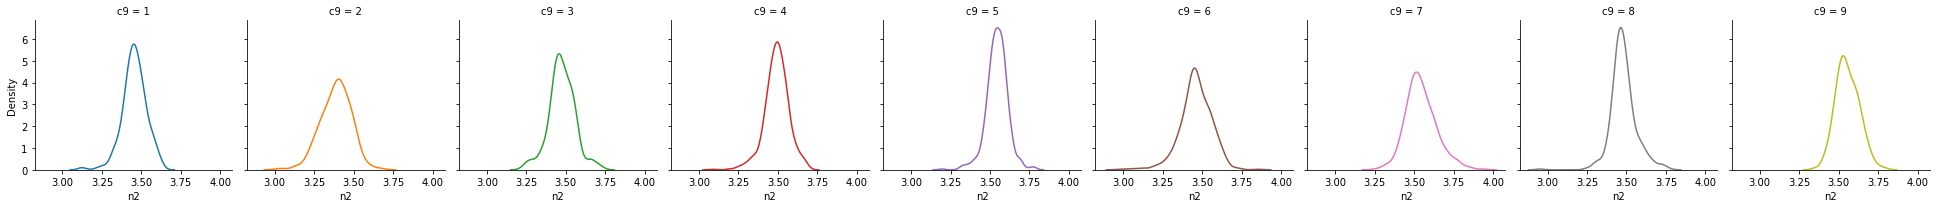

n3


<Figure size 864x864 with 0 Axes>

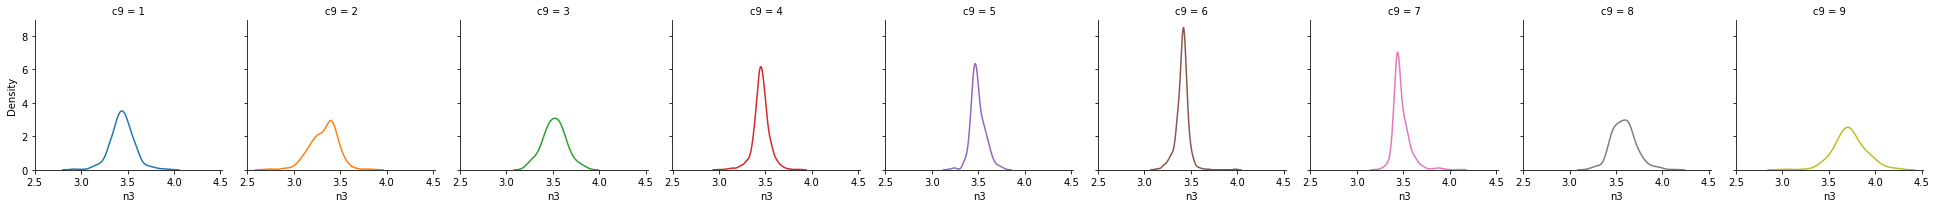

n4


<Figure size 864x864 with 0 Axes>

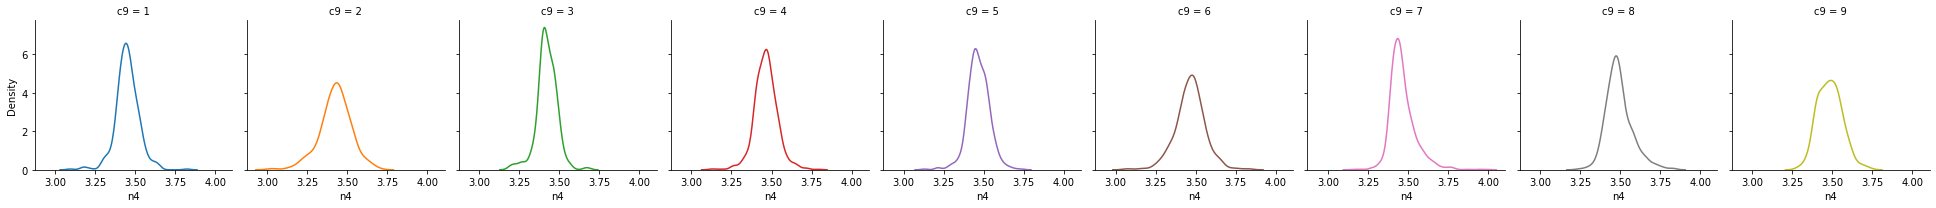

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for col in cl.columns[3:14]:
    plt.figure(figsize = (12, 12))
    print(col)
    grid = sns.FacetGrid(data = cl, col = "c9", hue = "c9")
    grid.map(sns.distplot, col, hist = False)
    plt.show()

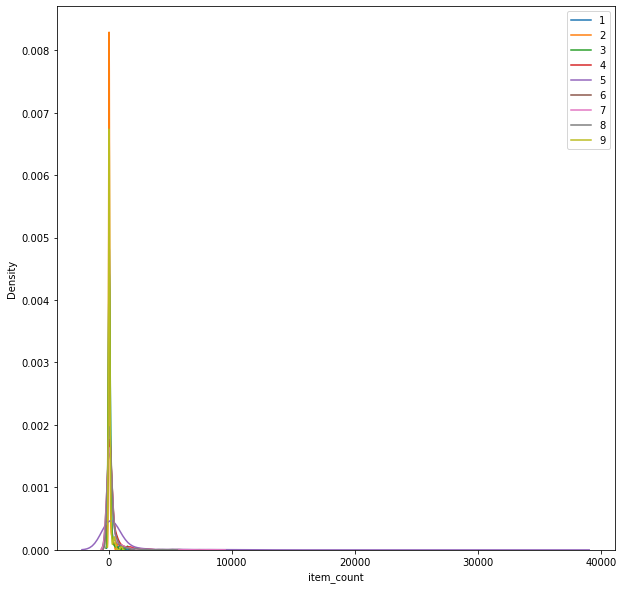

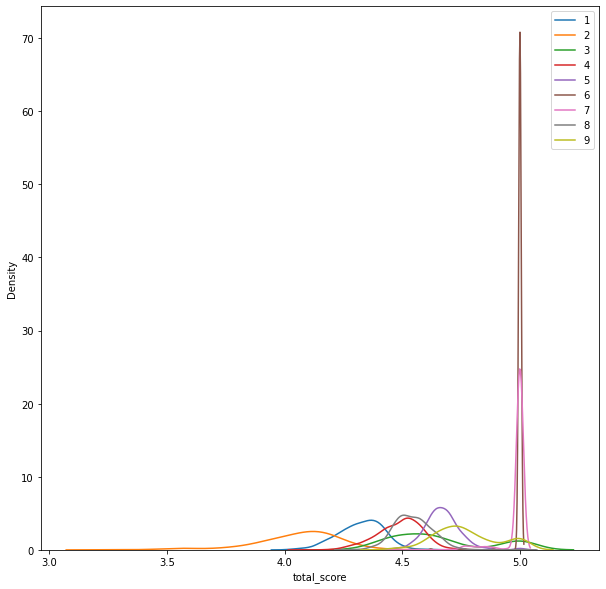

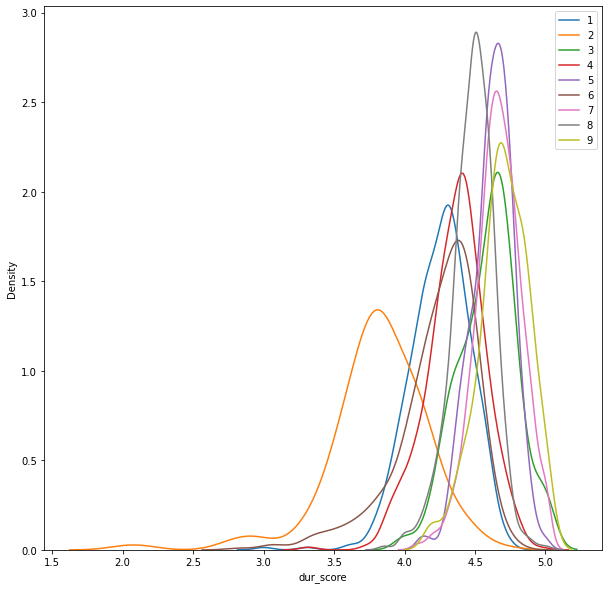

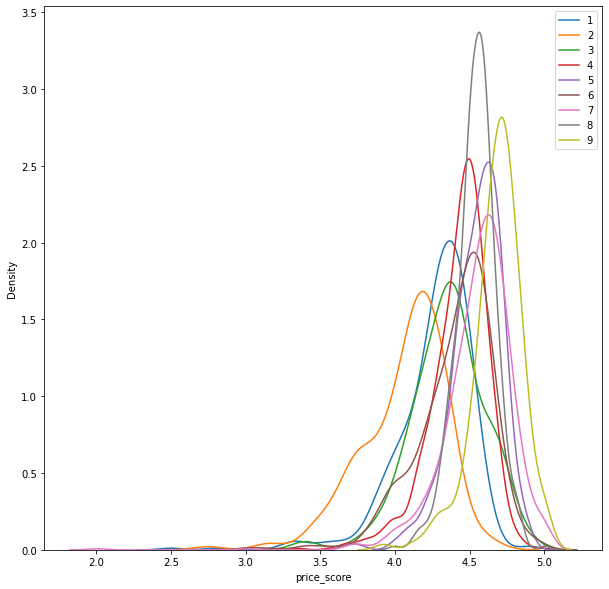

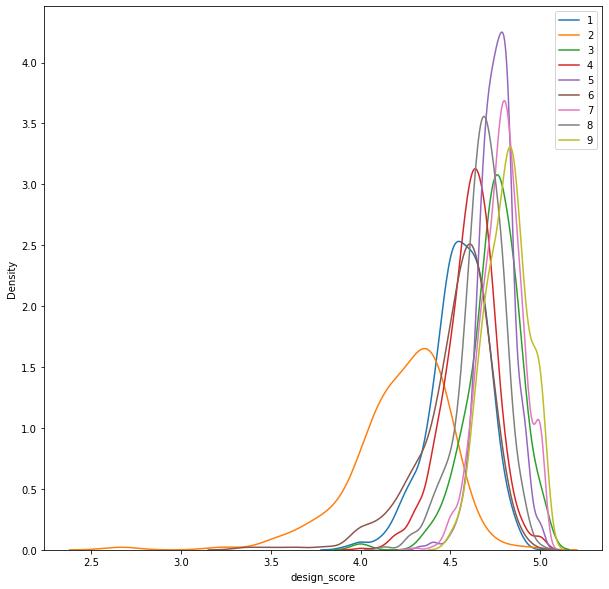

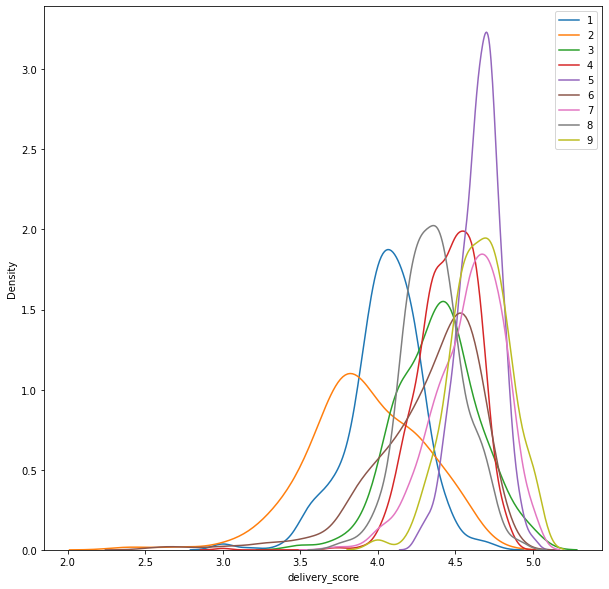

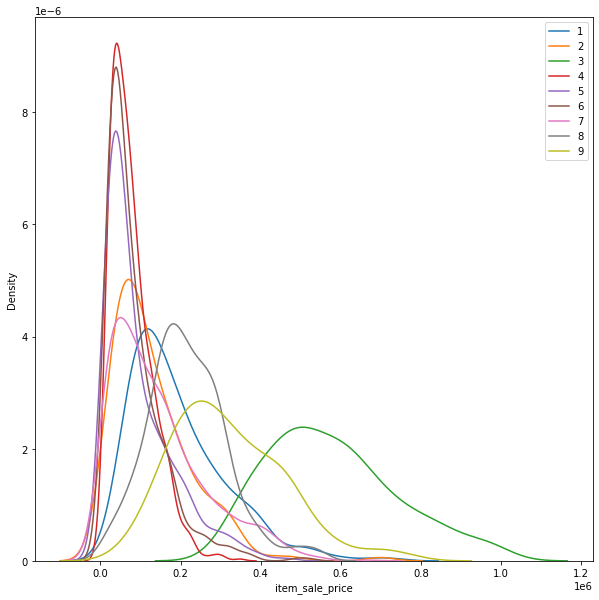

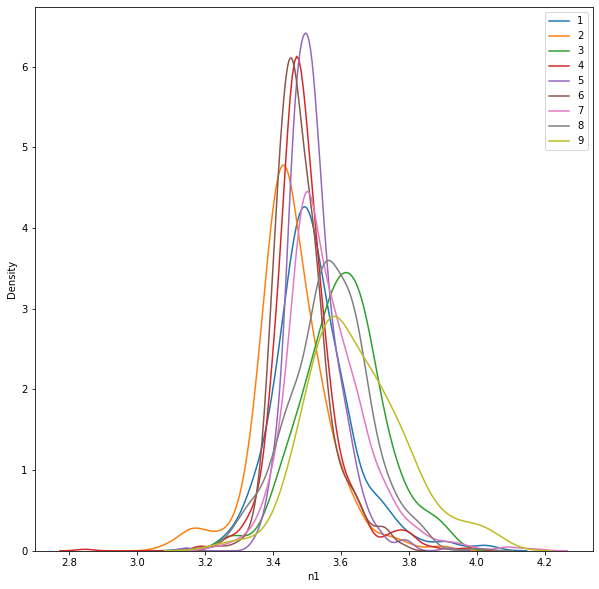

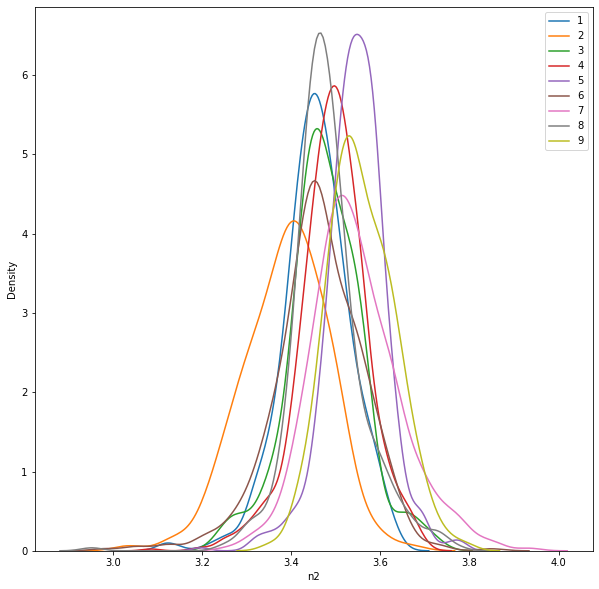

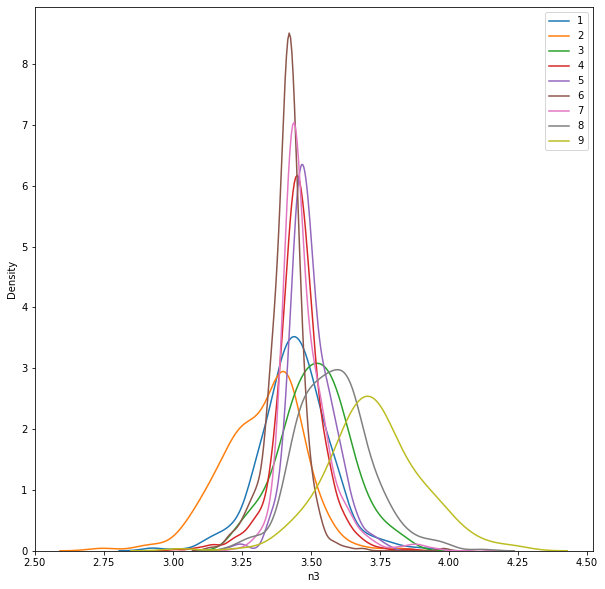

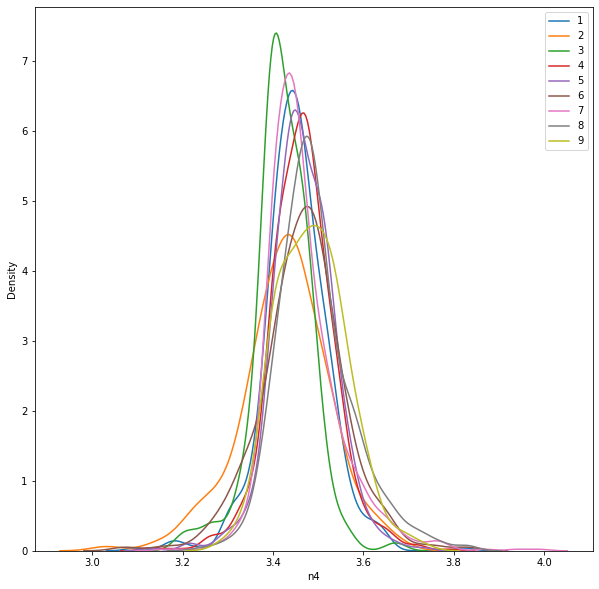

In [ ]:
for col in cl.columns[3:14]:
    plt.figure(figsize = (10, 10))
    for clus in cl["c9"].unique():
        sns.distplot(cl.query("c9 == @clus")[col], hist = False, label = clus)
    plt.legend()
    plt.show()

## 10 Clusters

In [ ]:
for c in cl["c10"].unique():
    print(c, "th cluster")
    df = cl.query("c10 == @c").reset_index(drop = True)
    display(df)
    print(df["item_category1"].value_counts())
    print(df["item_brand"].value_counts())
    print("")

1 th cluster


item_name item_category1  ... c9  c10
0                              BERGEN 데이베드 침대             침대  ...  1    1
1                            ISABELLA 데이베드 침대             침대  ...  1    1
2               (리뷰이벤트) 바오 틈새수납장 스탠딩 화장대(콘센트)         화장대/콘솔  ...  1    1
3    (리뷰이벤트) 하이 LED조명 통서랍 수납침대 프레임 SS/Q (콘센트)             침대  ...  1    1
4             1+1 폴리 바체어 홈바의자 3colors (절삭서비스)             의자  ...  1    1
..                                        ...            ...  ... ..  ...
469                        헤이미쉬 리빙다이닝 1인 원목벤치             의자  ...  1    1
470                   헤이츠 모던 1200 렌지대 2colors         서랍/수납장  ...  1    1
471                            헤일리 라탄가구 케인수납장         서랍/수납장  ...  1    1
472                             헬리아 LED조명 화장대         화장대/콘솔  ...  1    1
473   힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)             침대  ...  1    1

[474 rows x 21 columns]

침대        184
서랍/수납장    156
화장대/콘솔     57
의자         44
소파         33
Name: item_category1, dtype: int64
잉글랜더        26
삼익가구        18
레이디가구       17
동서가구(dF)    16
동서가구        13
            ..
우디크          1
듀오백          1
아피나 모블러      1
아인스홈         1
번드           1
Name: item_brand, Length: 158, dtype: int64

2 th cluster


item_name item_category1  ... c9  c10
0                      CHAMBER 벙커침대 3size             침대  ...  2    2
1                         MAKONIS 침대 SS/Q             침대  ...  2    2
2     MARINO 분리형 이층침대 트윈싱글 3colors 100200             침대  ...  2    2
3          VELLO 이층침대 싱글/더블 100200/140200             침대  ...  2    2
4           1+1 이튼 고무나무 원목 디자인 의자 2colors             의자  ...  2    2
..                                    ...            ...  ... ..  ...
187           플로어 LED 저상형침대 2colors(매트포함)             침대  ...  2    2
188            피크체어 원목 인조가죽 화장대의자 3colors             의자  ...  2    2
189          핀 원목침대 매트포함 (슈퍼싱글/퀸) 4colors             침대  ...  2    2
190               해리 고무나무 원목 광폭 수납 5단 서랍장         서랍/수납장  ...  2    2
191        핸디 베이직 3단 서랍형 수납침대 프레임 2colors             침대  ...  2    2

[192 rows x 21 columns]

침대        72
서랍/수납장    46
의자        45
화장대/콘솔    17
소파        12
Name: item_category1, dtype: int64
마켓비         19
리샘          12
레이디가구        9
블루밍홈         8
동서가구(dF)     7
            ..
마티노가구        1
베드리움         1
지니앤퍼니        1
서광퍼니처        1
일루일루         1
Name: item_brand, Length: 83, dtype: int64

3 th cluster


item_name item_category1  ... c9  c10
0                   MILKAM 콘솔수납장 17585 CHM85175         서랍/수납장  ...  3    3
1                   6인 콘센트형 다이닝테이블 의자세트 2colors         테이블/책상  ...  3    3
2                     BMA 1139-E CA등급 / DD (더블)             침대  ...  3    3
3                   BMA 1139-E CA등급/SS(슈퍼싱글사이즈)             침대  ...  3    3
4          C4. 올리버 스미스 유로탑 일체형 단면매트리스_그레이(적당푹신)             침대  ...  3    3
..                                          ...            ...  ... ..  ...
150                       헤이미쉬 리빙다이닝 4인 원목 식탁세트         테이블/책상  ...  3    3
151                   헤이미쉬 리빙다이닝 4인 코너형 테이블쇼파세트         테이블/책상  ...  3    3
152        헤이즐 침대(Q,K,KK 공용)(매트리스 미포함)(조명형,평상형)             침대  ...  3    3
153  헨트데이베드 고무나무 3인 패브릭 소파베드/원목소파 2type 6colors             소파  ...  3    3
154           확장형 세라믹 인출식 식탁 1600~2300 (2color)         테이블/책상  ...  3    3

[155 rows x 21 columns]

침대        93
테이블/책상    33
서랍/수납장    14
화장대/콘솔     9
소파         5
의자         1
Name: item_category1, dtype: int64
삼익가구     11
리바트       9
에몬스       9
일룸        7
레이디가구     6
         ..
쉐우드가구     1
핀란디아      1
세진침대      1
까르엠가구     1
데스커       1
Name: item_brand, Length: 70, dtype: int64

4 th cluster


item_name item_category1  ... c9  c10
0                                  RELLY 침대 시리즈             침대  ...  4    4
1                          (1+1) 내츄럴모노 윈저 의자 세트             의자  ...  4    4
2                 (국내생산) 학생/사무용 책상 의자 S10 (헤드형)             의자  ...  4    4
3    (당일발송) 라인 원형 벨벳 수납 스툴 의자 2colors (+사은품 증정)             의자  ...  4    4
4               (리뷰이벤트) 그루브 LED조명 수납침대 프레임 SS/Q             침대  ...  4    4
..                                          ...            ...  ... ..  ...
886                       화이트우드 3단 전자렌지대 / 3단선반         서랍/수납장  ...  4    4
887                       화이트우드 4단 전자렌지대 / 4단선반         서랍/수납장  ...  4    4
888                    휴 조이 좌식 리클라이너 의자 2colors             의자  ...  4    4
889                                    히포 원목 체어             의자  ...  4    4
890                        힙스터 수납형 드럼스툴 8colors             의자  ...  4    4

[891 rows x 21 columns]

의자        352
서랍/수납장    270
침대        113
화장대/콘솔    100
소파         56
Name: item_category1, dtype: int64
마켓비       74
블루밍홈      36
두닷모노      21
가구느낌      18
베스트리빙     17
          ..
에인하우스      1
에이픽스       1
미즌하임       1
체인지하우스     1
이데컴퍼니      1
Name: item_brand, Length: 265, dtype: int64

5 th cluster


item_name item_category1  ... c9  c10
0              (국내생산) 학생/사무용 책상 의자 S10 (기본형)             의자  ...  5    5
1            (국내생산) 학생/사무용 책상 의자 STC10 (기본형)             의자  ...  5    5
2            (국내생산) 학생/사무용 책상 의자 STC18 (기본형)             의자  ...  5    5
3    (당일발송) 원형 벨벳 수납 스툴 의자 4colors (+사은품 증정)             의자  ...  5    5
4                (당일발송) 카페 인테리어 식탁 의자 4color             의자  ...  5    5
..                                       ...            ...  ... ..  ...
554                           협탁겸 원목스툴 2종 택1             의자  ...  5    5
555                 호라이즌 싱글 슈퍼싱글 철제침대 (S/SS)             침대  ...  5    5
556         호텔패브릭원단 SILLY 좌식의자 4colors(당일발송)             의자  ...  5    5
557              화이트 폭좁은 슬림 5단 서랍장 500 (화이트)         서랍/수납장  ...  5    5
558                             휘게체어 5colors             의자  ...  5    5

[559 rows x 21 columns]

의자        328
서랍/수납장    123
침대         47
화장대/콘솔     33
소파         22
테이블/책상      6
Name: item_category1, dtype: int64
이케아         20
블루밍홈        16
에코상사        15
한샘          15
리바트         14
            ..
사이즈오브        1
리빙디자인연구소     1
트리니퍼니처       1
골든스트릿        1
가구로드         1
Name: item_brand, Length: 219, dtype: int64

6 th cluster


item_name item_category1 item_brand  ...  c8  c9  c10
0               (당일발송) 가로 높이조절 사이드테이블         테이블/책상         키모  ...   6   6    6
1                   (당일발송) 다용도 좌식 테이블         테이블/책상         키모  ...   6   6    6
2    (당일발송) 다용도 카페 식탁 테이블 800 2colors         테이블/책상         키모  ...   6   6    6
3              (당일발송) 스틸 책상 겸 테이블 800         테이블/책상         키모  ...   6   6    6
4                 (당일발송) 스틸 테이블 2size         테이블/책상         키모  ...   6   6    6
..                                ...            ...        ...  ...  ..  ..  ...
536                   화이트 마틴 H형 좌식 책상         테이블/책상       일루일루  ...   6   6    6
537              화이트 마틴 기본형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
538             화이트 마틴 스퀘어형 책상 1200mm         테이블/책상       일루일루  ...   6   6    6
539       화이트식탁 800 원목 원형 테이블 GLS165C         테이블/책상        나무뜰  ...   6   6    6
540                    히토 대리석 사이드 테이블         테이블/책상      플레르가구  ...   6   6    6

[541 rows x 21 columns]

테이블/책상    538
침대          3
Name: item_category1, dtype: int64
블루밍홈       35
앳홈         21
베스트리빙      19
마켓비        17
프리메이드      16
           ..
아이데뉴        1
심포니디자인      1
라이크하우스      1
장인가구        1
아이리스코리아     1
Name: item_brand, Length: 170, dtype: int64

7 th cluster


item_name item_category1  ... c9  c10
0                         (당일발송) 스틸 좌식 데스크 확장형         테이블/책상  ...  7    7
1                1+1 CH9930 루체 카페 식탁의자 6colors             의자  ...  7    7
2              1+1 더쉼 포켓스프링 리클라이너 좌식의자 2colors             소파  ...  7    7
3           1+1 폴리 쿠션 바체어 홈바의자 3colors (절삭서비스)             의자  ...  7    7
4          1인 게이밍 컴퓨터책상 GD001 1600L (1600x800)         테이블/책상  ...  7    7
..                                         ...            ...  ... ..  ...
529  화이트 타원 좌식 소파 접이식 화이트 다리 거실 테이블 1200 x 600         테이블/책상  ...  7    7
530         화이트 호마이카 HPL HPM 라미네이트 라운드 2인 원목식탁         테이블/책상  ...  7    7
531               화이트식탁 1000 원목 원형 테이블 GLS166C         테이블/책상  ...  7    7
532                           확장형 티테이블 2colors         테이블/책상  ...  7    7
533                                  히알린 좌식테이블         테이블/책상  ...  7    7

[534 rows x 21 columns]

테이블/책상    453
의자         35
침대         25
서랍/수납장      9
화장대/콘솔      8
소파          4
Name: item_category1, dtype: int64
오홀리브     52
소프시스     21
리드오프     16
이반가구     15
리바트      12
         ..
우디홈       1
행운가구      1
지니앤퍼니     1
레이디가구     1
스킬디자인     1
Name: item_brand, Length: 194, dtype: int64

8 th cluster


item_name item_category1  ... c9  c10
0    (리뷰이벤트) 밀리 LED조명 확장형 화장대포함 수납침대 프레임 SS/Q             침대  ...  8    8
1          (리뷰이벤트) 플랫 무헤드 3단 수납침대 (매트포함) SS/Q             침대  ...  8    8
2                  (사은품증정) 튜브 철제 벙커침대 3colors             침대  ...  8    8
3                      1+1 하프 원목 식탁의자 2colors             의자  ...  8    8
4                3017 브로몰딩 접이식 의자 1+1 3colors             의자  ...  8    8
..                                        ...            ...  ... ..  ...
438          헤일리 LED 조명 3단 수납침대 프레임 SS (매트제외)             침대  ...  8    8
439   호텔 메리미 LED 수납 침대 SS/Q/K세트(매트선택) 3colors             침대  ...  8    8
440            호텔방수원단 접이식 NIS 2인 소파베드 3colors             소파  ...  8    8
441            호텔방수원단 접이식 NIS 3인 소파베드 3colors             소파  ...  8    8
442            휴 LED 3서랍수납형 침대(매트 미포함) SS/Q/K             침대  ...  8    8

[443 rows x 21 columns]

침대        308
서랍/수납장     49
소파         41
화장대/콘솔     23
의자         21
테이블/책상      1
Name: item_category1, dtype: int64
삼익가구      24
에보니아      16
잉글랜더      15
레이디가구     14
딜라이트      13
          ..
썸앤데코       1
오키멧        1
지엠퍼니처      1
글로리가구      1
아이디얼리빙     1
Name: item_brand, Length: 153, dtype: int64

9 th cluster


item_name item_category1  ... c9  c10
0                         (본사직영) 앤디 거실테이블 6types         테이블/책상  ...  7    9
1                       1-2인용 원목 식탁+의자 풀세트_CL030         테이블/책상  ...  7    9
2            1200폭 5단 H형 책상 콘센트형 (상부도어형) 3colors         테이블/책상  ...  7    9
3       1200폭 5단 콘센트형 책상세트 3colors + 조명, 도어 추가선택         테이블/책상  ...  7    9
4        1200폭 6단 일반형 책상세트 3colors + 조명, 도어 추가선택         테이블/책상  ...  7    9
..                                           ...            ...  ... ..  ...
370  호히 12T 포세린 통세라믹 4인 식탁세트(아쿠아스웨이드의자4) 2colors         테이블/책상  ...  7    9
371                    홀로그램 거실 테이블 아크릴 협탁+강화유리증정         테이블/책상  ...  7    9
372           홀로그램 레인보우 원형 아크릴테이블 1200X650_SL122         테이블/책상  ...  7    9
373                     홀로그램테이블 350원형 아크릴 사이드 협탁         테이블/책상  ...  7    9
374                     홀로그램테이블 600원형 아크릴 사이드 협탁         테이블/책상  ...  7    9

[375 rows x 21 columns]

테이블/책상    371
침대          3
화장대/콘솔      1
Name: item_category1, dtype: int64
데스커      17
보니애가구    15
로포텐      15
끌레오      13
일룸       13
         ..
소년과나무     1
썸앤데코      1
그레이맨션     1
이르베스      1
라피노       1
Name: item_brand, Length: 138, dtype: int64

10 th cluster


item_name item_category1  ... c9  c10
0            ADEL 철제침대 매트리스 프레임 2colors(SS/Q)             침대  ...  9   10
1              Acne 침대 매트리스 프레임 3colors(SS/Q)             침대  ...  9   10
2                         Asusa 원목 콘솔화장대 거울포함         화장대/콘솔  ...  9   10
3                       DH 필로우탑 9존더블매트리스 SS/Q             침대  ...  9   10
4                         HD 205 황토볼 흙침대(S/Q)             침대  ...  9   10
..                                        ...            ...  ... ..  ...
191              헤니 헤드틸팅 가죽침대 Q (매트포함) 2color             침대  ...  9   10
192  헤리티지 리클라이너 저상형 패밀리침대 (매트포함) 3size/2color             침대  ...  9   10
193                헤이즐 무헤드 평상형 슈퍼킹 침대 프레임(KK)             침대  ...  9   10
194                   헤이즐 무헤드 평상형 퀸 침대 프레임(Q)             침대  ...  9   10
195       히노 편백 원목 LED헤드 멀티수납형 침대 SS/Q (매트제외)             침대  ...  9   10

[196 rows x 21 columns]

침대        141
테이블/책상     26
화장대/콘솔     12
서랍/수납장     10
의자          4
소파          3
Name: item_category1, dtype: int64
한샘       19
리바트      12
삼익가구     10
까르엠가구     8
로포텐       7
         ..
마티노가구     1
웰퍼니쳐      1
리센트       1
스스디       1
데스커       1
Name: item_brand, Length: 87, dtype: int64



item_count


<Figure size 864x864 with 0 Axes>

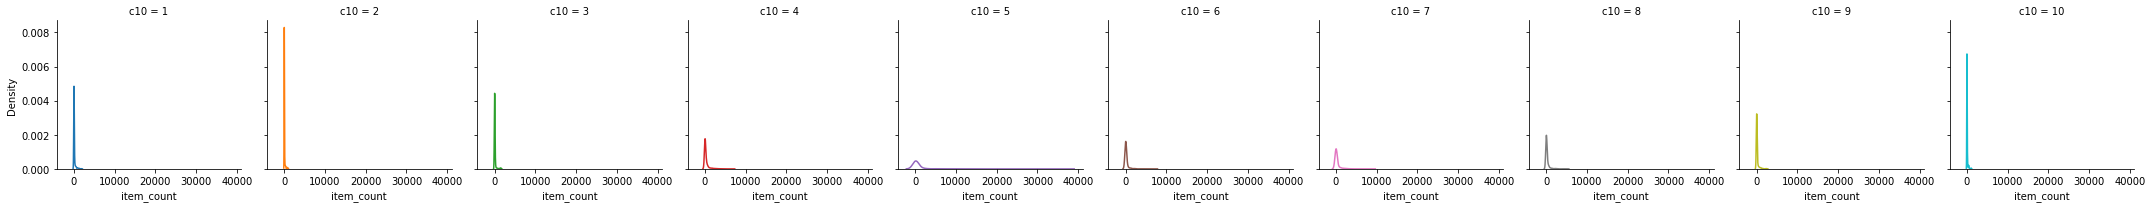

total_score


<Figure size 864x864 with 0 Axes>

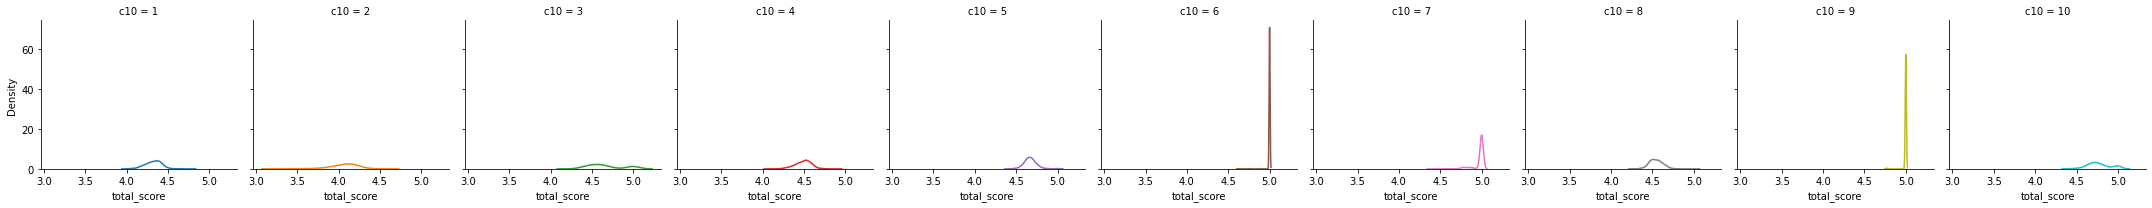

dur_score


<Figure size 864x864 with 0 Axes>

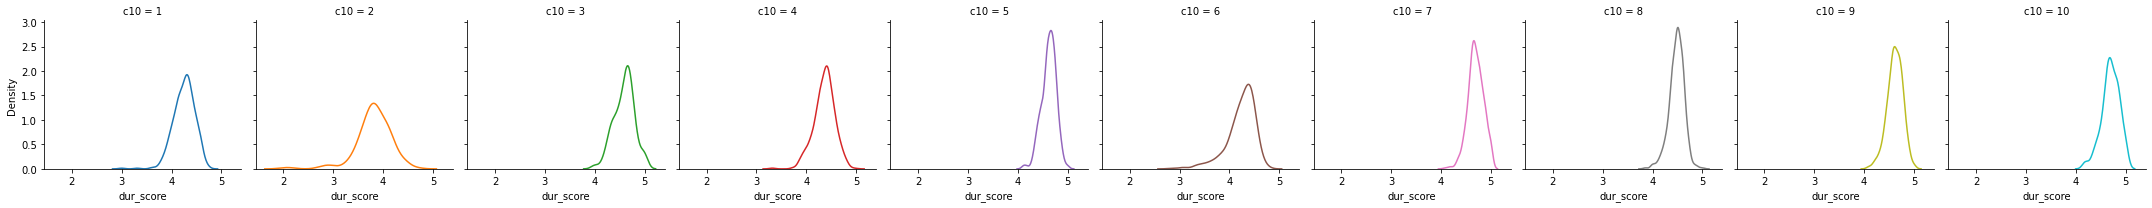

price_score


<Figure size 864x864 with 0 Axes>

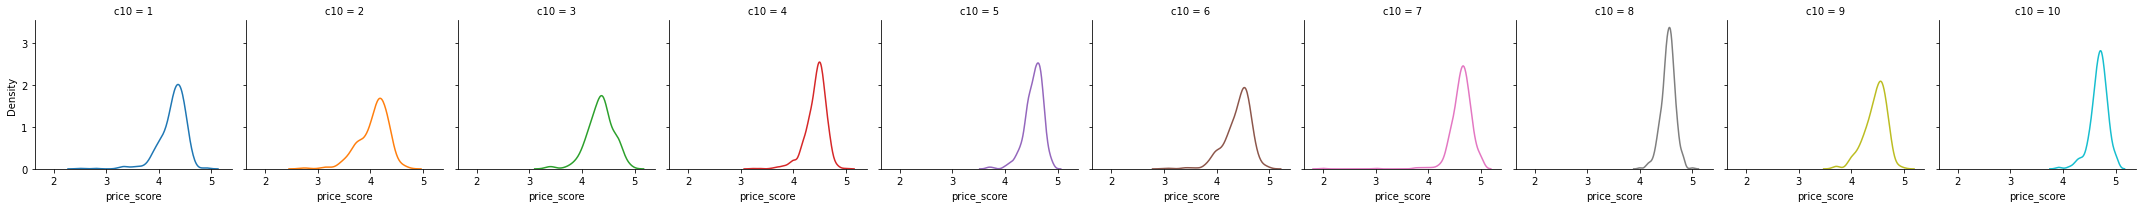

design_score


<Figure size 864x864 with 0 Axes>

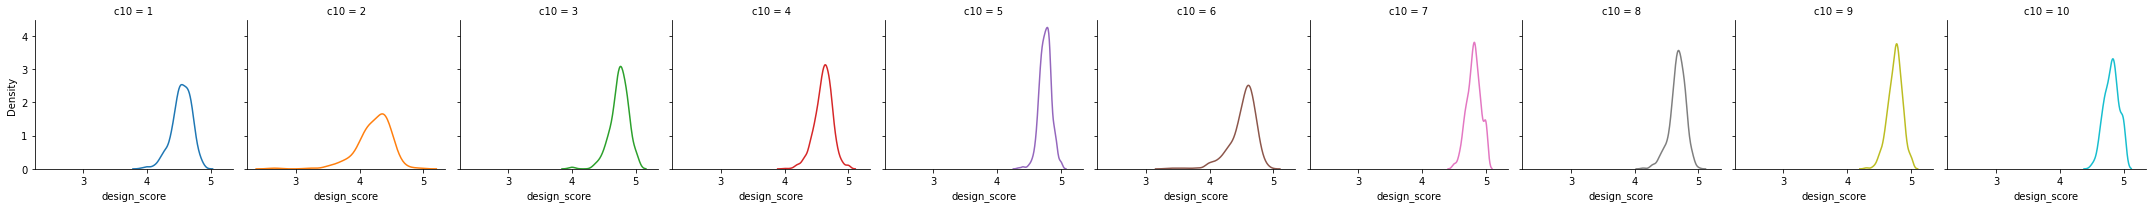

delivery_score


<Figure size 864x864 with 0 Axes>

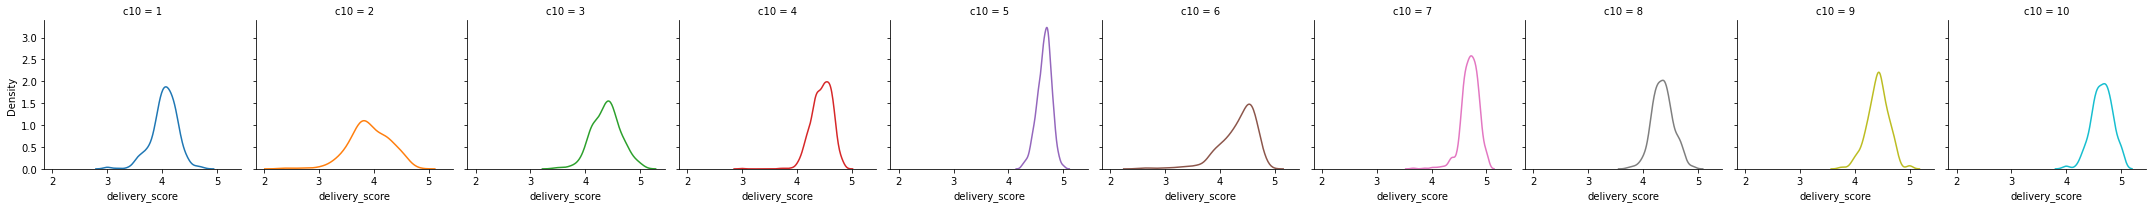

item_sale_price


<Figure size 864x864 with 0 Axes>

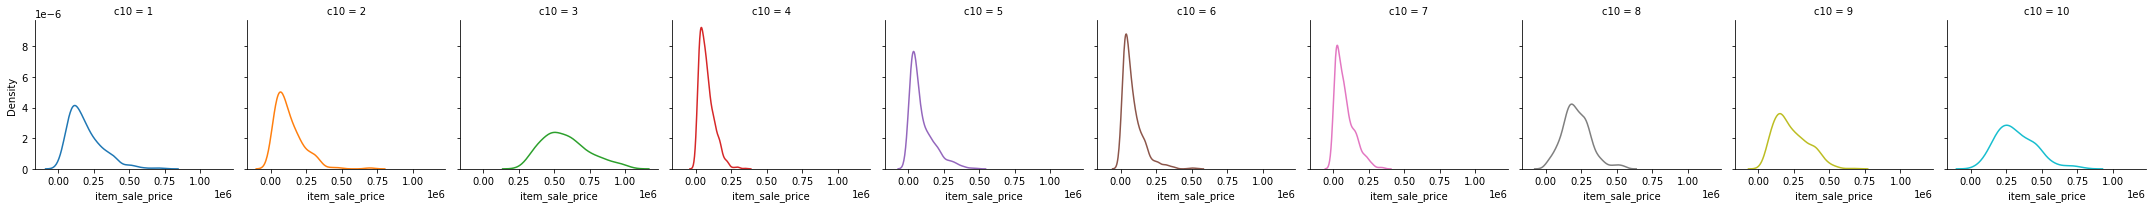

n1


<Figure size 864x864 with 0 Axes>

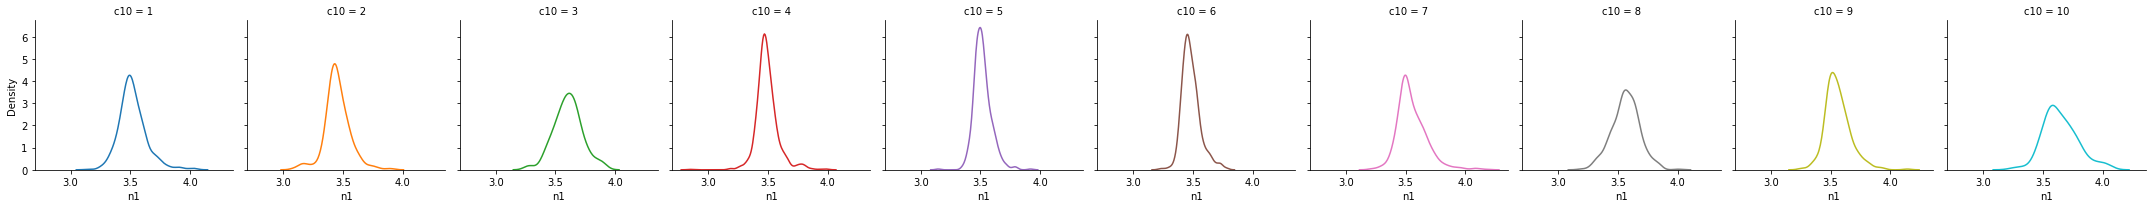

n2


<Figure size 864x864 with 0 Axes>

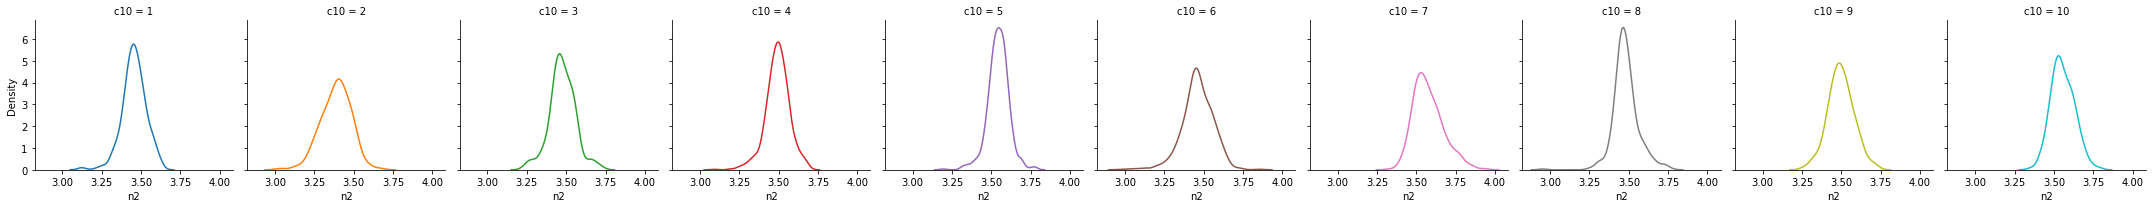

n3


<Figure size 864x864 with 0 Axes>

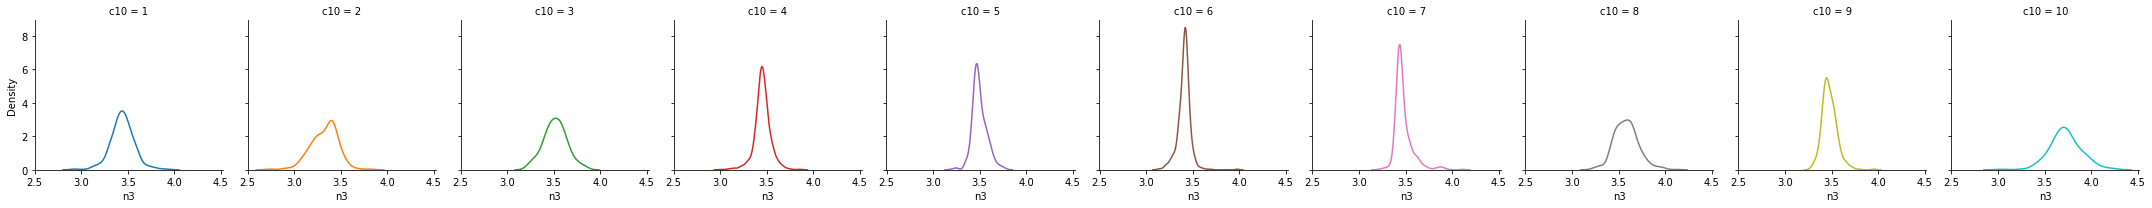

n4


<Figure size 864x864 with 0 Axes>

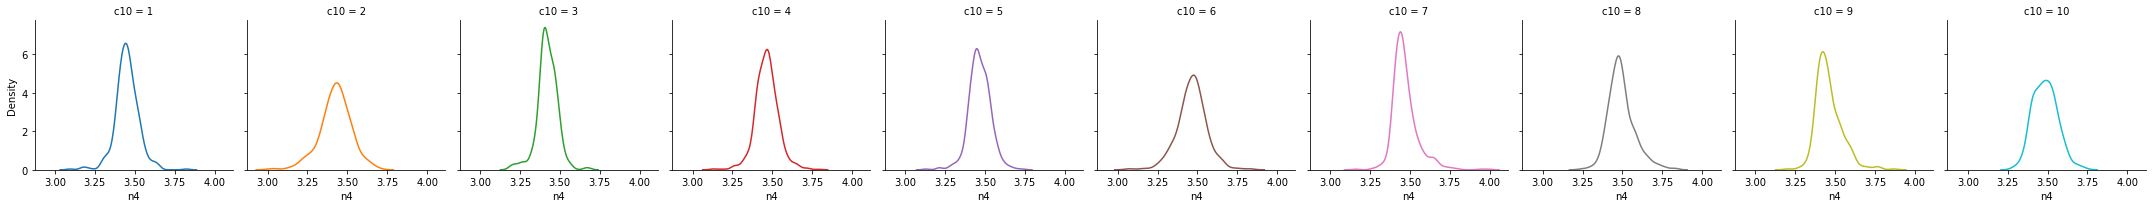

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for col in cl.columns[3:14]:
    plt.figure(figsize = (12, 12))
    print(col)
    grid = sns.FacetGrid(data = cl, col = "c10", hue = "c10")
    grid.map(sns.distplot, col, hist = False)
    plt.show()

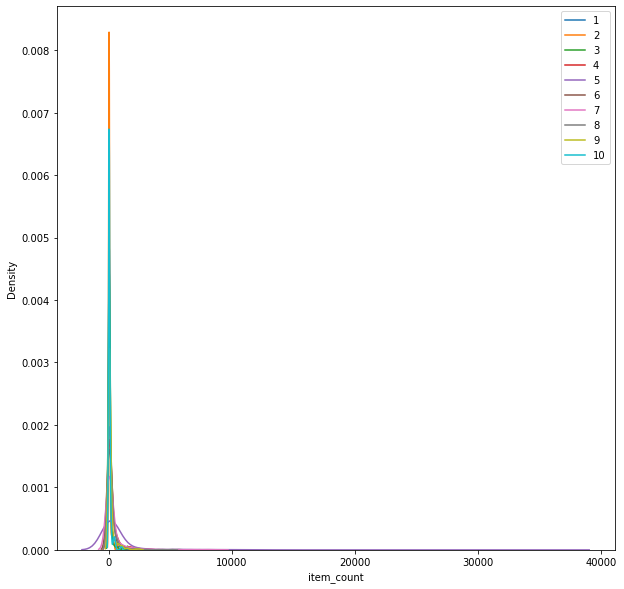

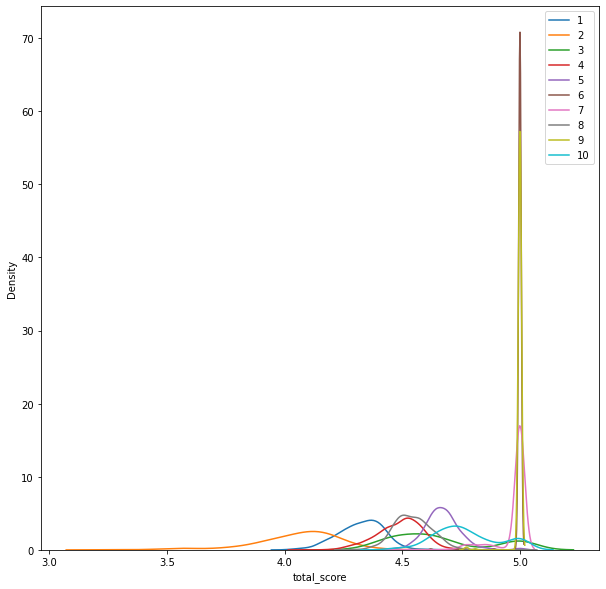

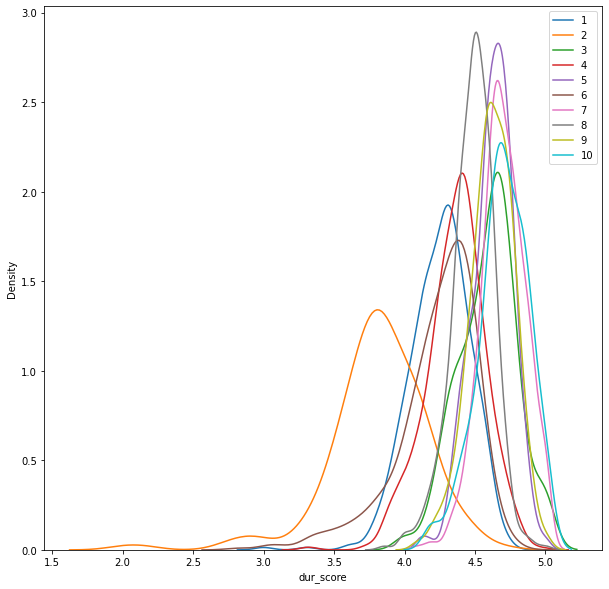

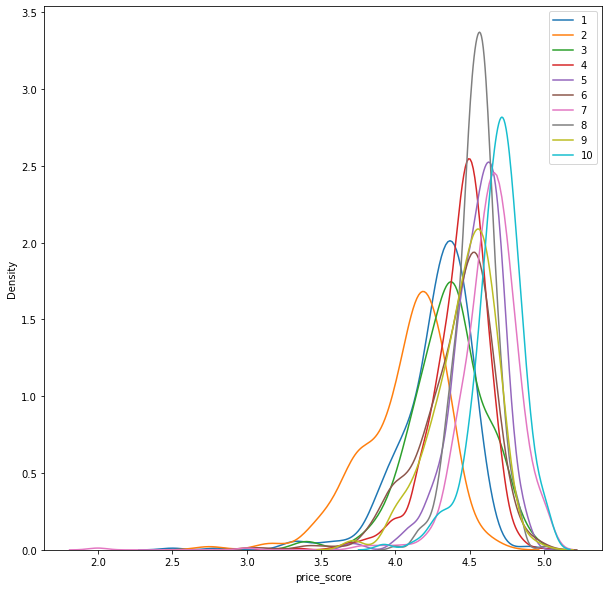

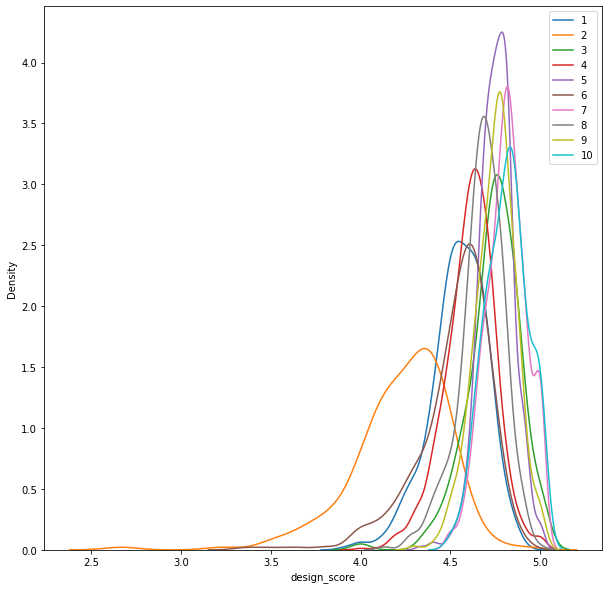

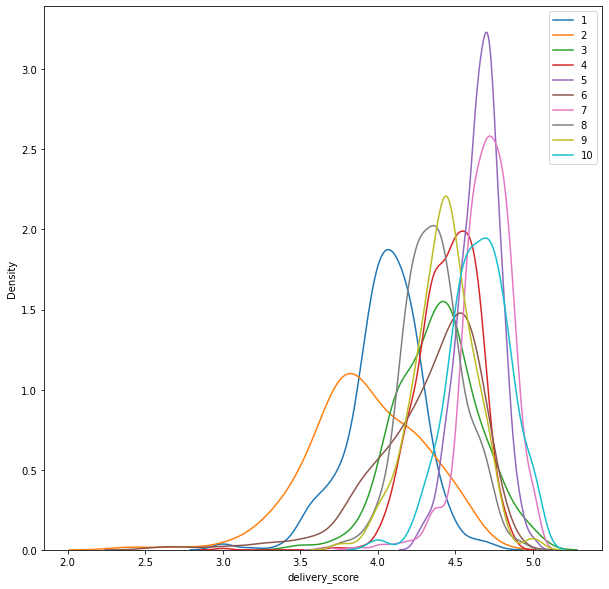

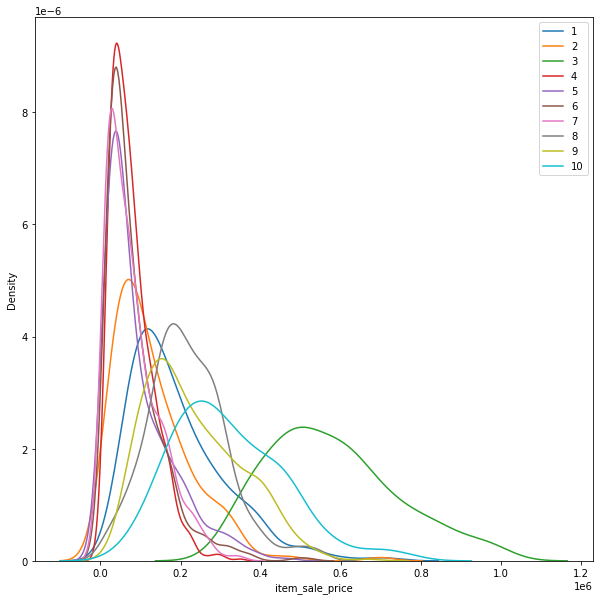

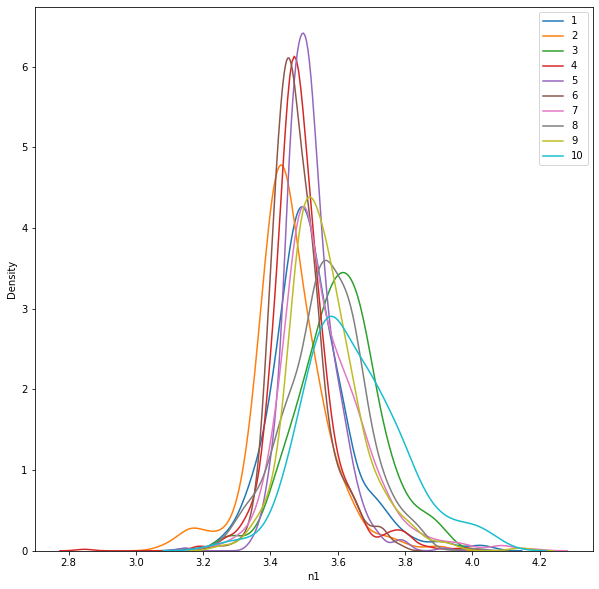

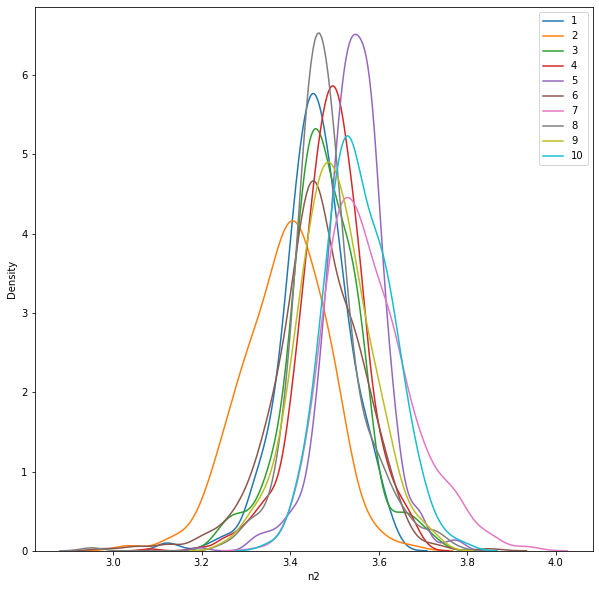

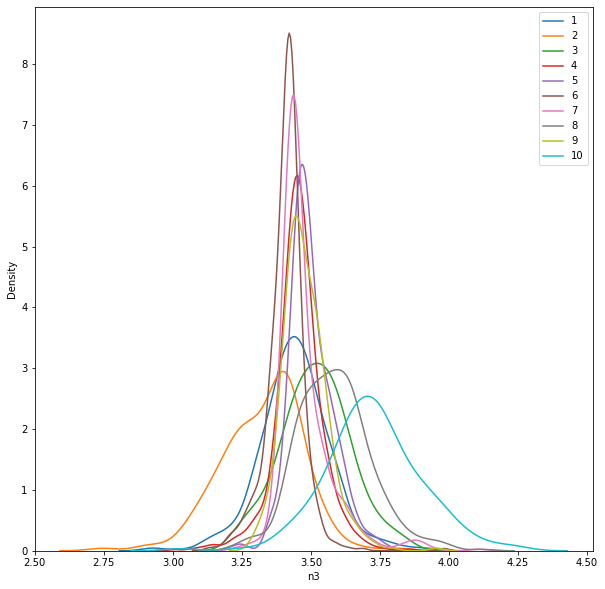

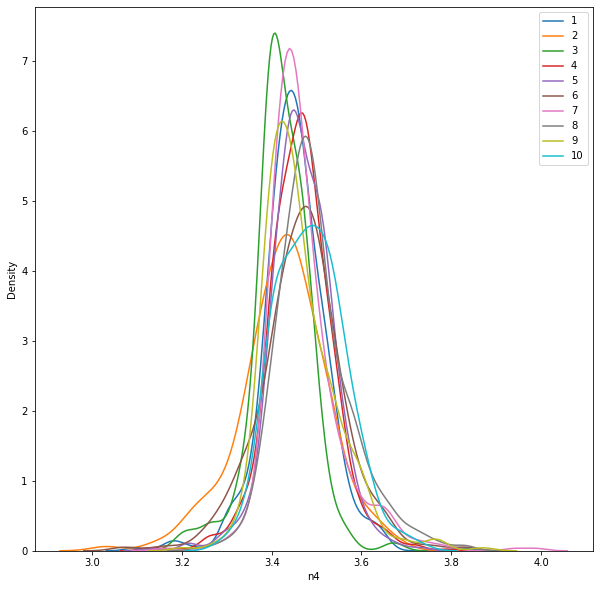

In [ ]:
for col in cl.columns[3:14]:
    plt.figure(figsize = (10, 10))
    for clus in cl["c10"].unique():
        sns.distplot(cl.query("c10 == @clus")[col], hist = False, label = clus)
    plt.legend()
    plt.show()

# Metric

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
?silhouette_samples

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(cl., irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:'.format(average_score))

irisDF.head(3)
